In [ ]:
#install.packages('forecast', dependencies = TRUE)
#install.packages('ggplot2')
#install.packages('astsa')

Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)



In [3]:
library(forecast)
library(astsa)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘astsa’


The following object is masked from ‘package:forecast’:

    gas




# SF Data

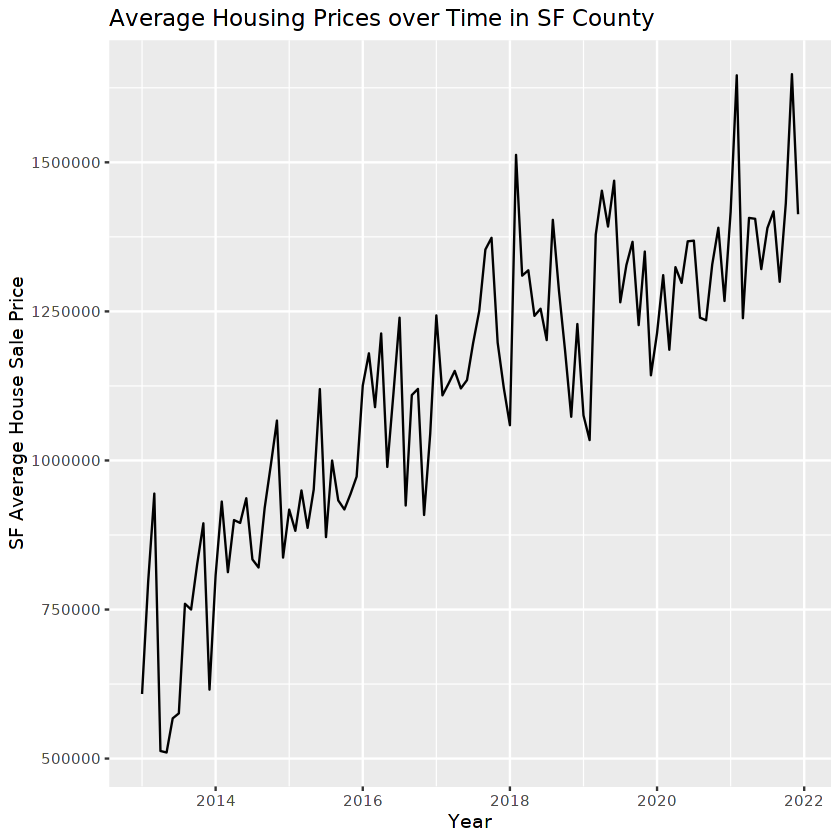

In [4]:
sfhousing = read.csv("SFHousingPrices.csv")
sfhousing.ts = ts(sfhousing$Average.Sale.Price, start = c(2013, 1), frequency = 12)

autoplot(sfhousing.ts, main = "Average Housing Prices over Time in SF County",
        xlab = "Year",
        ylab = "SF Average House Sale Price") 

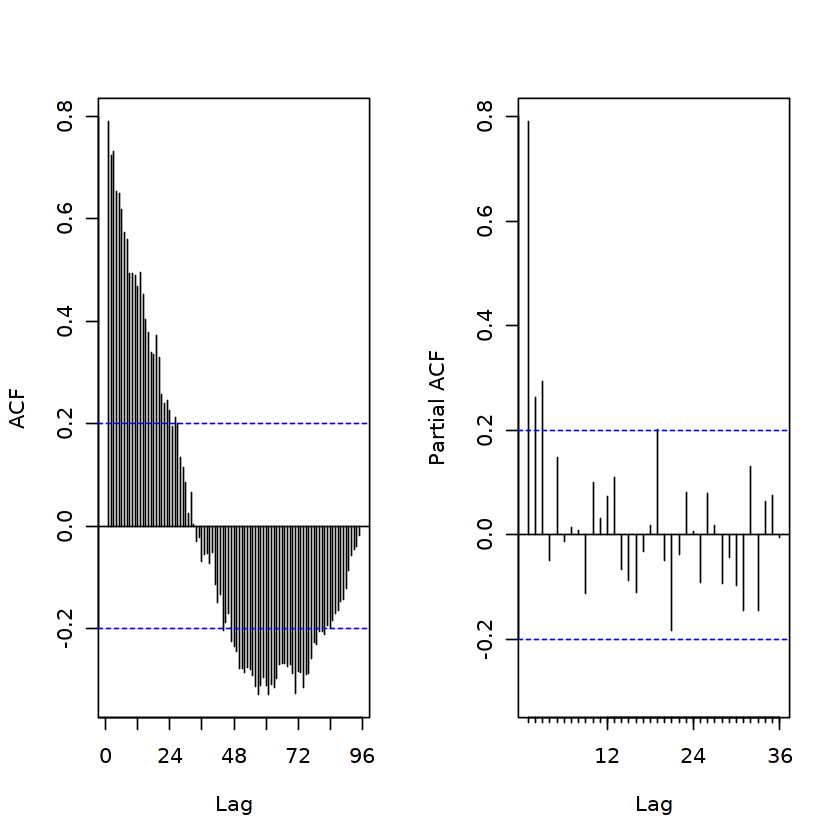

In [5]:
sfhousing.train.ts = window(sfhousing.ts, end = c(2020, 12))
sfhousing.test.ts = window(sfhousing.ts, start = c(2020, 12))

par(mfrow = c(1, 2))
Acf(sfhousing.train.ts, 100, main = "") # lag.max = 36
Pacf(sfhousing.train.ts, 36, main = "")
par(mfrow = c(1, 1))


In [6]:
sfhousing.lag1 <- diff(sfhousing.train.ts, lag = 1)

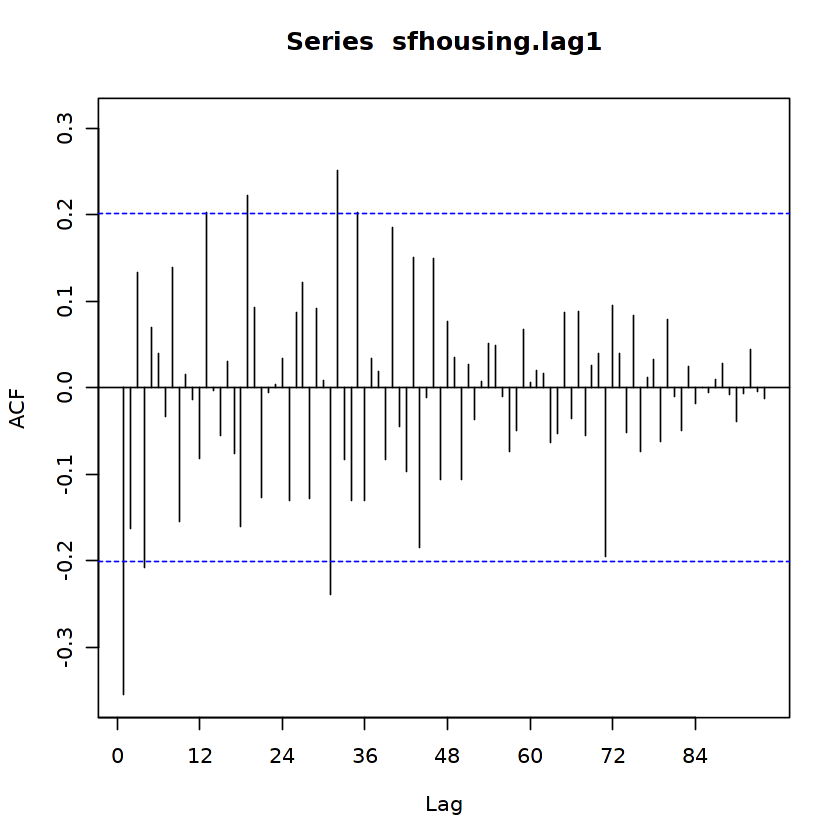

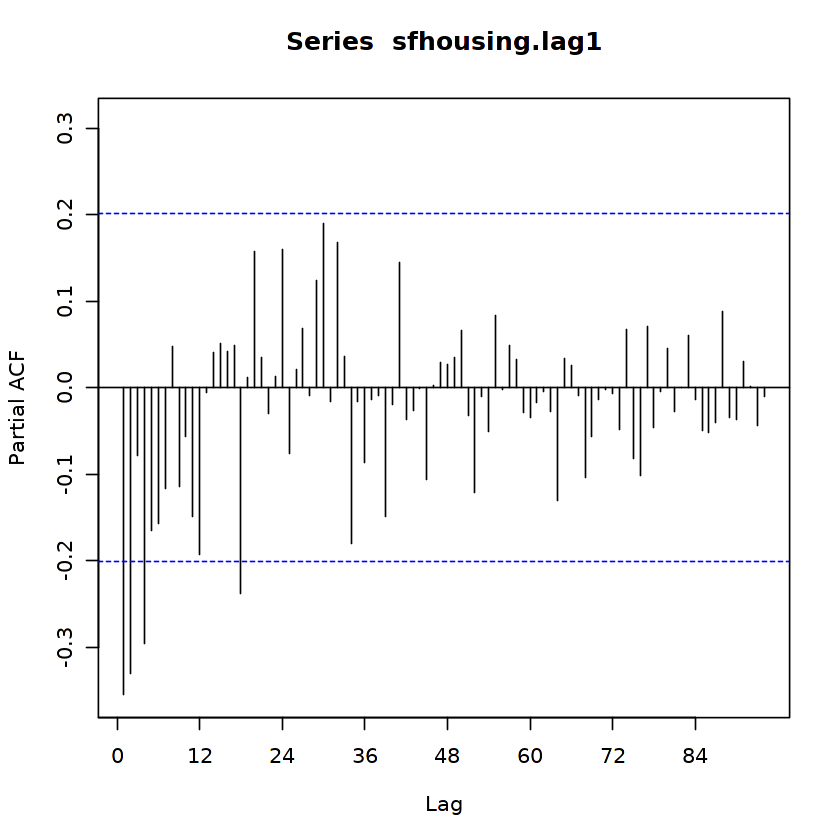

In [7]:
Acf(sfhousing.lag1,100)
Pacf(sfhousing.lag1,100)

## Naive Forecasts

ME         RMSE     MAE      MPE        MAPE     MASE     
Training set   6938.947 139438.2 108285.9 -0.2820602 10.70361 0.7319489
Test set     151938.083 191195.4 156753.9 10.1343677 10.52317 1.0595646
             ACF1       Theil's U
Training set -0.3546867       NA 
Test set     -0.2150415 1.102716

ME        RMSE     MAE      MPE      MAPE      MASE      ACF1     
Training set  85320.87 180380.7 147941.8 7.539684 13.272871 1.0000000 0.1758076
Test set     125336.00 161058.4 133102.2 8.425314  9.013237 0.8996926 0.1484329
             Theil's U
Training set        NA
Test set     0.8786445

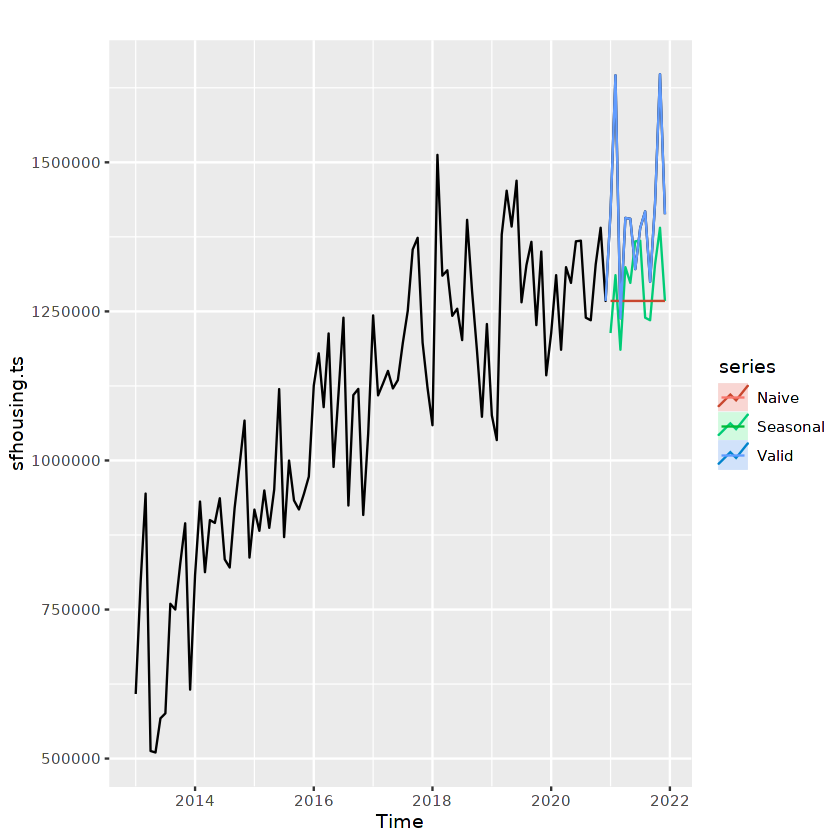


	Ljung-Box test

data:  Residuals from Naive method
Q* = 42.116, df = 19, p-value = 0.00171

Model df: 0.   Total lags used: 19



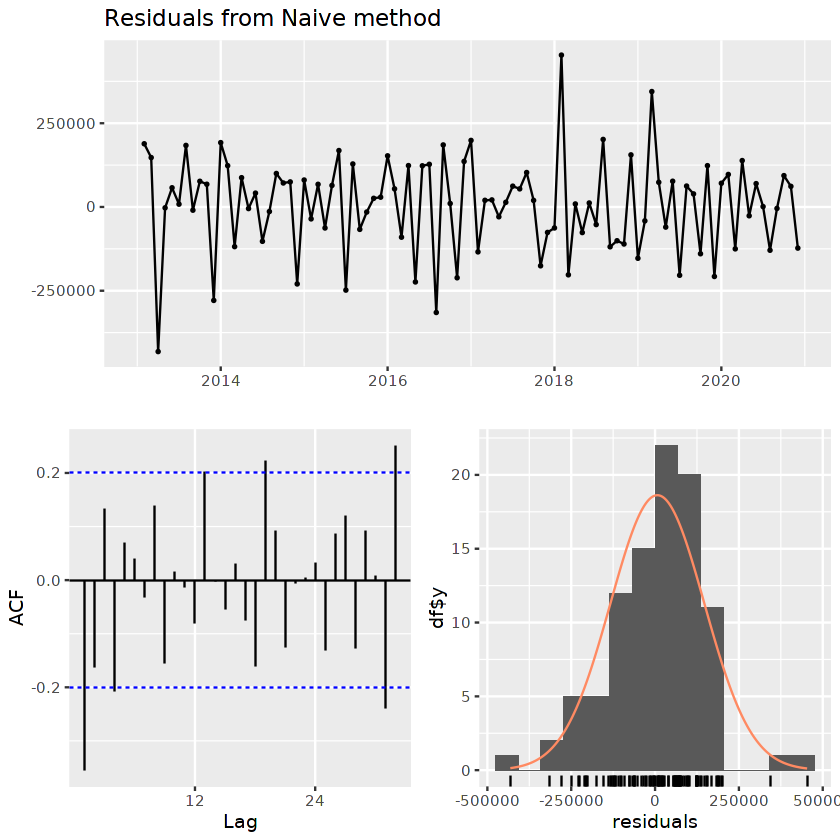


	Ljung-Box test

data:  Residuals from Seasonal naive method
Q* = 46.443, df = 19, p-value = 0.0004289

Model df: 0.   Total lags used: 19



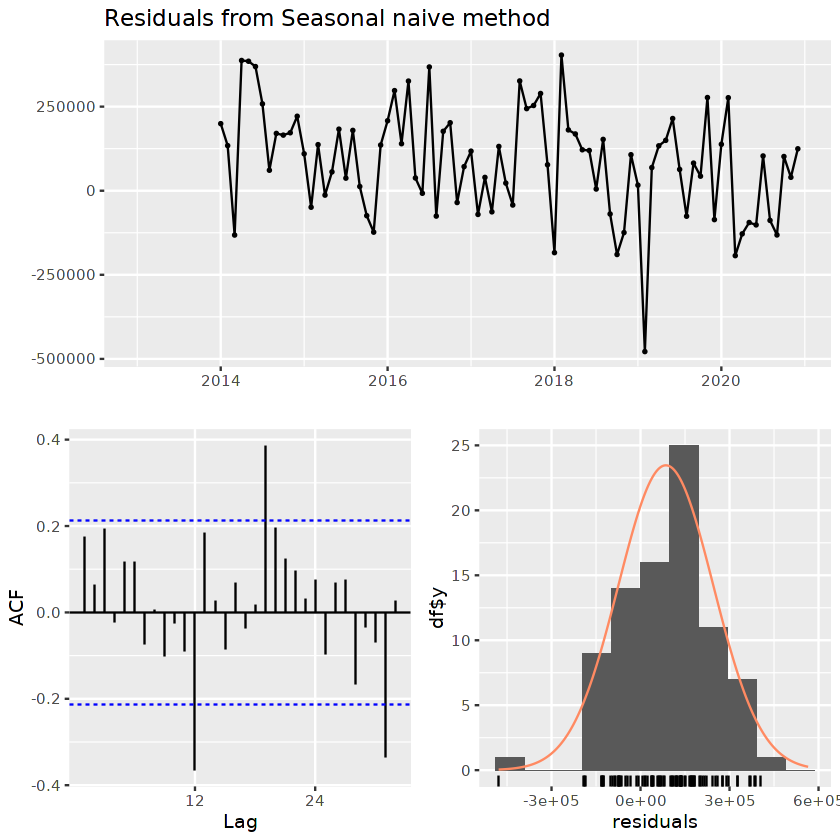

In [8]:
sfnaive = naive(sfhousing.train.ts,
              h = frequency(sfhousing.train.ts))

sfseasonal = snaive(sfhousing.train.ts,
       h = frequency(sfhousing.train.ts))

autoplot(sfhousing.ts) +
  autolayer(sfseasonal, series = "Seasonal", PI = FALSE) +
  autolayer(sfnaive, series = "Naive", PI = FALSE) +
  autolayer(sfhousing.test.ts, series = "Valid")
  
accuracy(sfnaive, sfhousing.test.ts)
accuracy(sfseasonal, sfhousing.test.ts)

checkresiduals(sfnaive)
checkresiduals(sfseasonal)


## Holt's Winter Model with Automatically Selected Components

ME        RMSE     MAE       MPE       MAPE     MASE    
Training set -19466.25 112478.4  89661.32 -2.970916 9.126637 0.606058
Test set     108280.23 159377.7 122637.70  7.034704 8.189840 0.828959
             ACF1       Theil's U
Training set  0.2047727        NA
Test set     -0.1973641 0.9227647

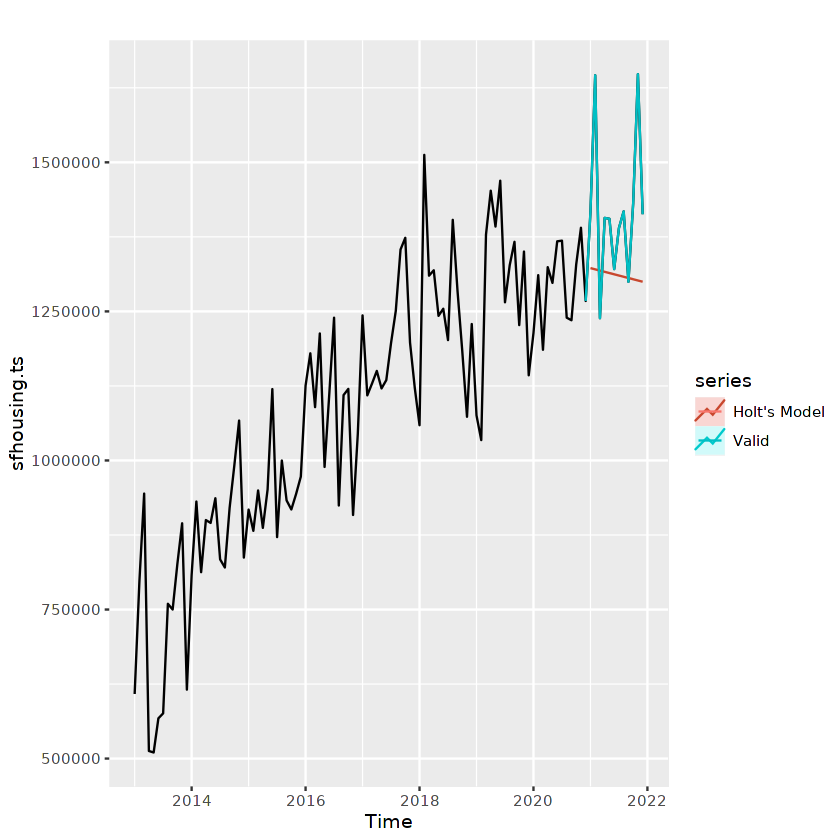


	Ljung-Box test

data:  Residuals from ETS(A,A,N)
Q* = 28.391, df = 15, p-value = 0.01924

Model df: 4.   Total lags used: 19



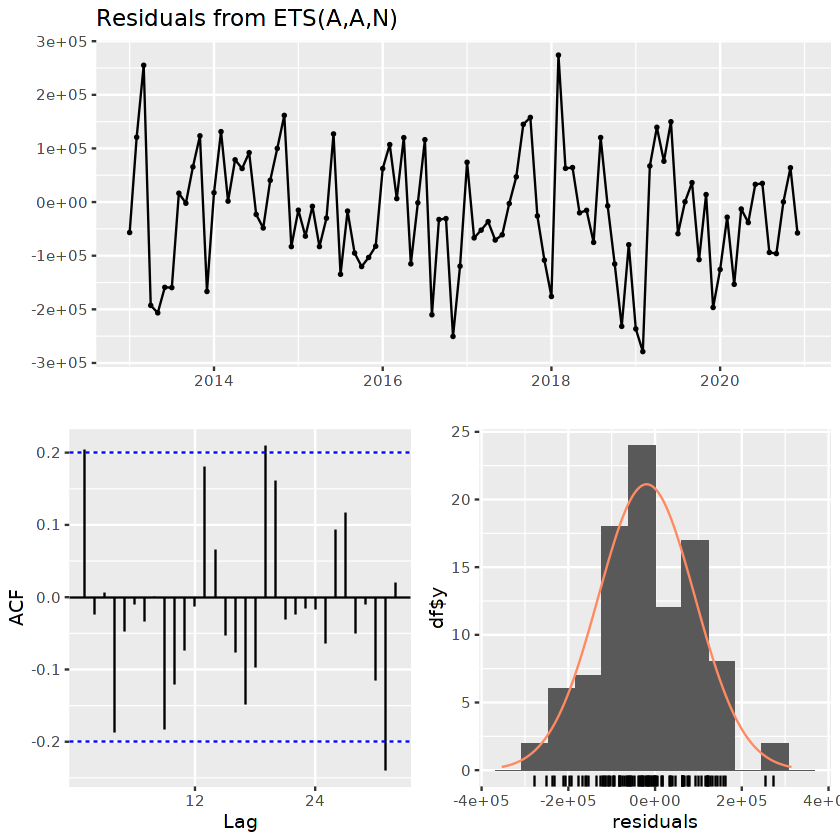

In [9]:
zzz = ets(sfhousing.train.ts, model="ZZZ")
zzz.pred = forecast(zzz, h = 12, level = 0)

autoplot(sfhousing.ts) +
    autolayer(zzz.pred, series = "Holt's Model") +
    autolayer(sfhousing.test.ts, series = "Valid")
    
accuracy(zzz.pred, sfhousing.test.ts)
checkresiduals(zzz)

## ARIMA Model

Differenced for trend and seasonality and did a AR[3] model after looking at the ACF and PACF graphs.

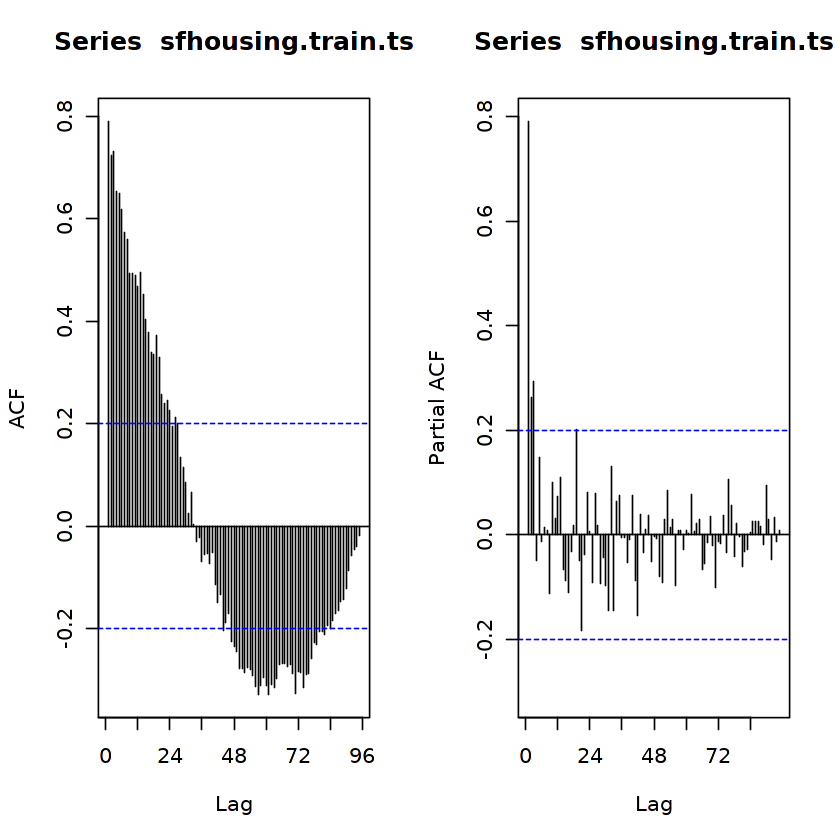

In [10]:
par(mfrow = c(1,2))
Acf(sfhousing.train.ts, lag.max = 100)
Pacf(sfhousing.train.ts, lag.max = 100)
par(mfrow = c(1,1))

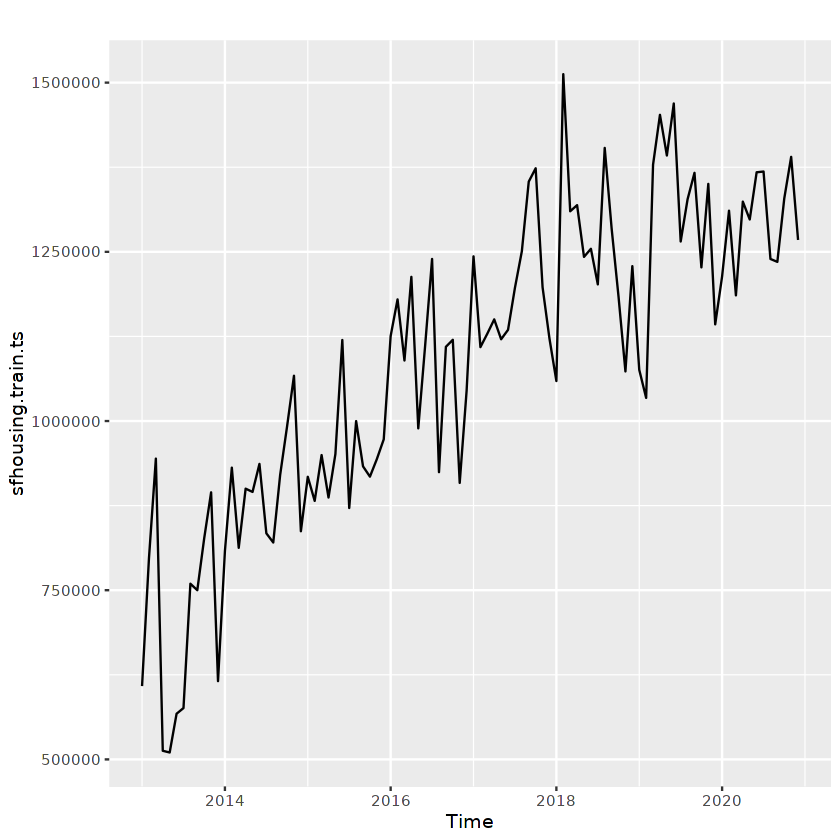

In [ ]:
autoplot(sfhousing.train.ts)

ME        RMSE     MAE       MPE        MAPE      MASE     
Training set -1932.543 156364.2 120680.52 -0.9138204 10.893499 0.8157296
Test set     40364.021 111476.4  84233.14  2.3865274  5.700364 0.5693667
             ACF1        Theil's U
Training set -0.02371127        NA
Test set      0.13922129 0.6201429

Series: sfhousing.train.ts 
ARIMA(3,1,0)(0,1,0)[12] 

Coefficients:
          ar1      ar2      ar3
      -0.6370  -0.4501  -0.0772
s.e.   0.1096   0.1197   0.1133

sigma^2 = 2.934e+10:  log likelihood = -1116.78
AIC=2241.55   AICc=2242.06   BIC=2251.23

Training set error measures:
                    ME     RMSE      MAE        MPE    MAPE      MASE
Training set -1932.543 156364.2 120680.5 -0.9138204 10.8935 0.8157296
                    ACF1
Training set -0.02371127

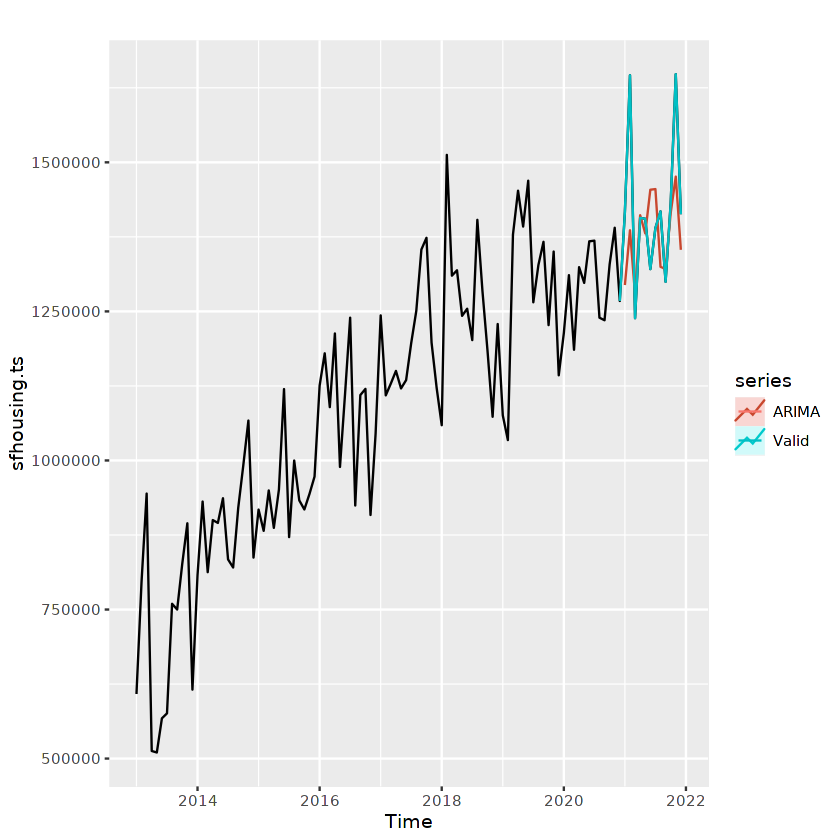


	Ljung-Box test

data:  Residuals from ARIMA(3,1,0)(0,1,0)[12]
Q* = 60.829, df = 16, p-value = 3.792e-07

Model df: 3.   Total lags used: 19



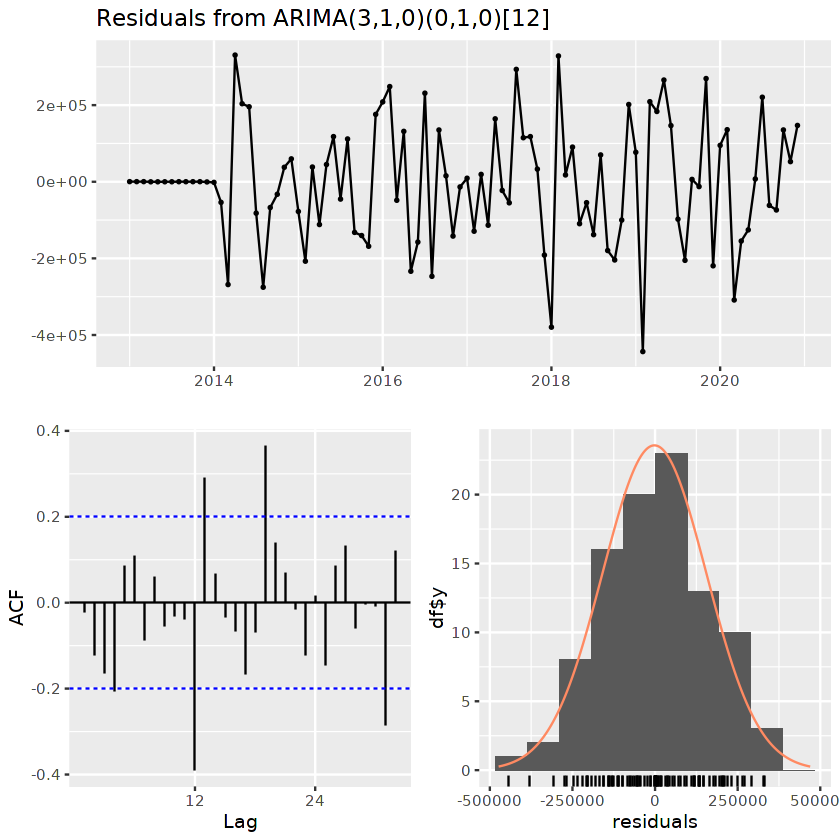

In [11]:
m1 = Arima(sfhousing.train.ts,
           order = c(3, 1, 0),
           seasonal = list(order = c(0, 1, 0), period = 12))

arima.pred = forecast(m1, h = 12, level=0)

autoplot(sfhousing.ts) +
    autolayer(arima.pred, series = "ARIMA") +
    autolayer(sfhousing.test.ts, series = "Valid")

accuracy(arima.pred, sfhousing.test.ts)
summary(m1)

checkresiduals(m1)

ME       RMSE     MAE       MPE       MAPE     MASE     
Training set  13210.0 121506.9  96689.53 0.2302275 9.607477 0.6535645
Test set     107216.7 155806.6 120869.97 6.9799241 8.074506 0.8170101
             ACF1       Theil's U
Training set -0.0157082        NA
Test set     -0.1891804 0.8961696

Warning message in sqrt(diag(x$var.coef)):
“NaNs produced”


Series: sfhousing.train.ts 
ARIMA(3,1,0)(1,0,1)[12] 

Coefficients:
          ar1      ar2      ar3    sar1     sma1
      -0.5054  -0.3726  -0.0524  0.2818  -0.2691
s.e.   0.1024   0.1094   0.1076     NaN      NaN

sigma^2 = 1.575e+10:  log likelihood = -1247.73
AIC=2507.47   AICc=2508.42   BIC=2522.79

Training set error measures:
                ME     RMSE      MAE       MPE     MAPE      MASE       ACF1
Training set 13210 121506.9 96689.53 0.2302275 9.607477 0.6535645 -0.0157082

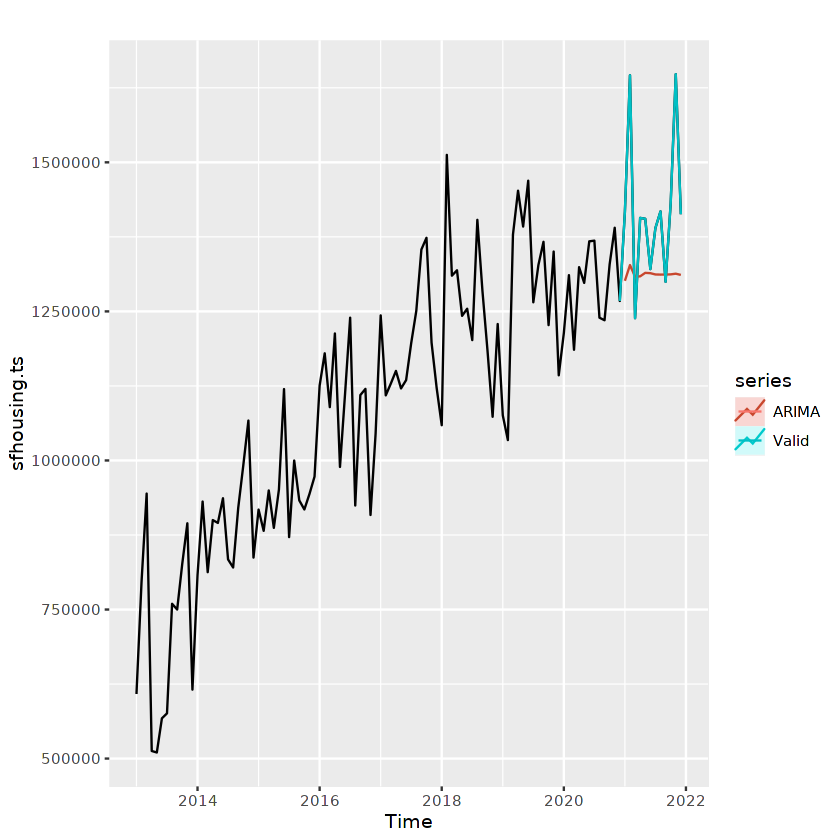


	Ljung-Box test

data:  Residuals from ARIMA(3,1,0)(1,0,1)[12]
Q* = 39.243, df = 14, p-value = 0.0003345

Model df: 5.   Total lags used: 19



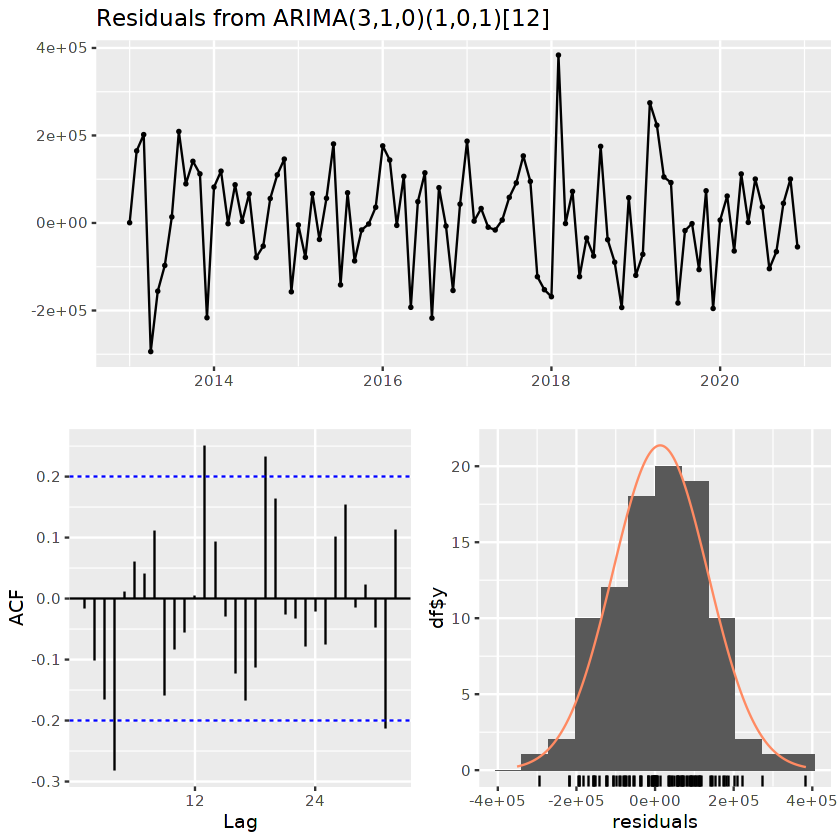

In [12]:
m2 = Arima(sfhousing.train.ts,
           order = c(3, 1, 0),
           seasonal = list(order = c(1, 0, 1), period = 12))

arima.pred1 = forecast(m2, h = 12, level=0)

autoplot(sfhousing.ts) +
    autolayer(arima.pred1, series = "ARIMA") +
    autolayer(sfhousing.test.ts, series = "Valid")

accuracy(arima.pred1, sfhousing.test.ts)
summary(m2)

checkresiduals(m2)

## Neural Network Model

ME          RMSE      MAE       MPE        MAPE     MASE     
Training set    324.6321  85121.12  67258.68 -0.6328288 6.033433 0.4546292
Test set     143232.0080 182793.37 146289.02  9.5347610 9.781565 0.9888280
             ACF1       Theil's U
Training set -0.1697779       NA 
Test set     -0.2216222 1.053862

Warning message:
“Removed 12 rows containing missing values (`geom_line()`).”


ME           RMSE      MAE      MPE       MAPE     MASE     
Training set    -25.66182  90841.26  72476.9 -0.702465 6.418913 0.4899014
Test set     138422.86782 178426.02 143148.2  9.197338 9.578835 0.9675981
             ACF1       Theil's U
Training set  0.0122153       NA 
Test set     -0.1874500 1.025214

Warning message:
“Removed 12 rows containing missing values (`geom_line()`).”


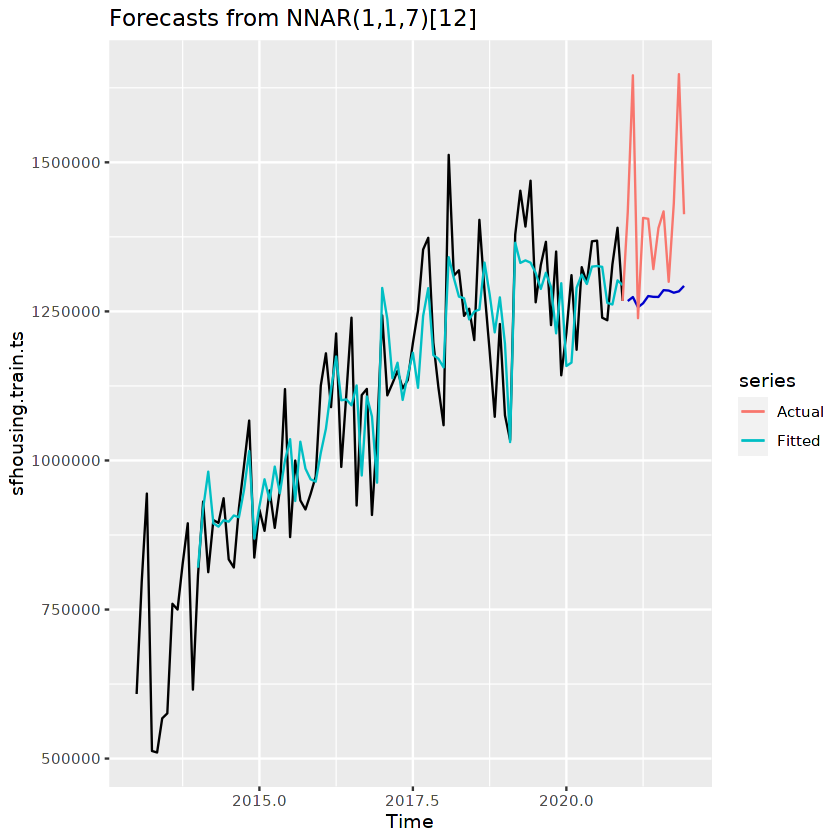

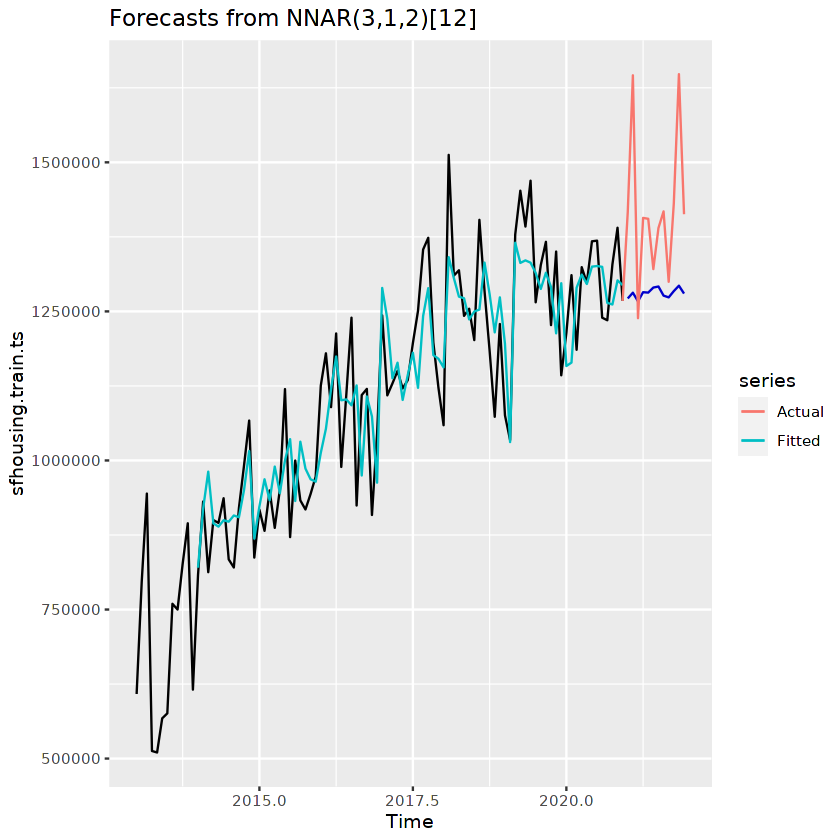

In [13]:
set.seed(201)

sfhousing.nnetar = nnetar(sfhousing.train.ts, repeats = 20, p = 1, P = 1, size = 7)
sfhousing.nnetar.pred = forecast(sfhousing.nnetar, h = 12)
accuracy(sfhousing.nnetar.pred, sfhousing.test.ts)

autoplot(sfhousing.nnetar.pred) +
  autolayer(sfhousing.nnetar$fitted, series = "Fitted") +
  autolayer(sfhousing.test.ts, series = "Actual")

sfhousing.nnetar.opt = nnetar(sfhousing.train.ts)
sfhousing.nnetar.pred.opt = forecast(sfhousing.nnetar.opt, h = 12)
accuracy(sfhousing.nnetar.pred.opt, sfhousing.test.ts)

autoplot(sfhousing.nnetar.pred.opt) +
  autolayer(sfhousing.nnetar$fitted, series = "Fitted") +
  autolayer(sfhousing.test.ts, series = "Actual")

Warning message in modeldf.default(object):
“Could not find appropriate degrees of freedom for this model.”


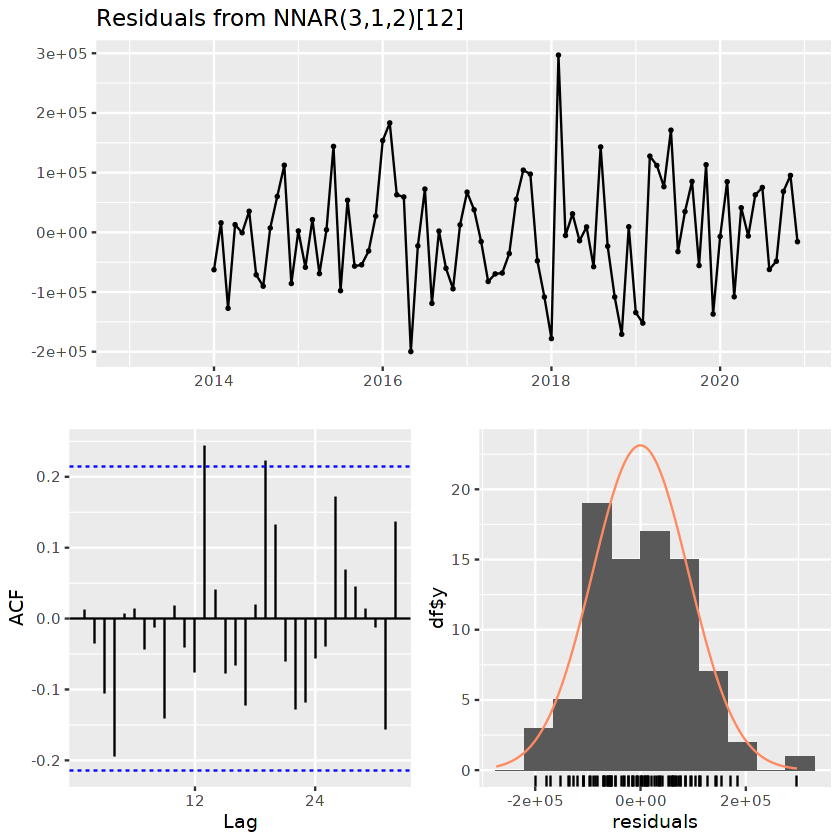

In [14]:
checkresiduals(sfhousing.nnetar.pred.opt)

## Multiple Linear Regression

### S&P 500

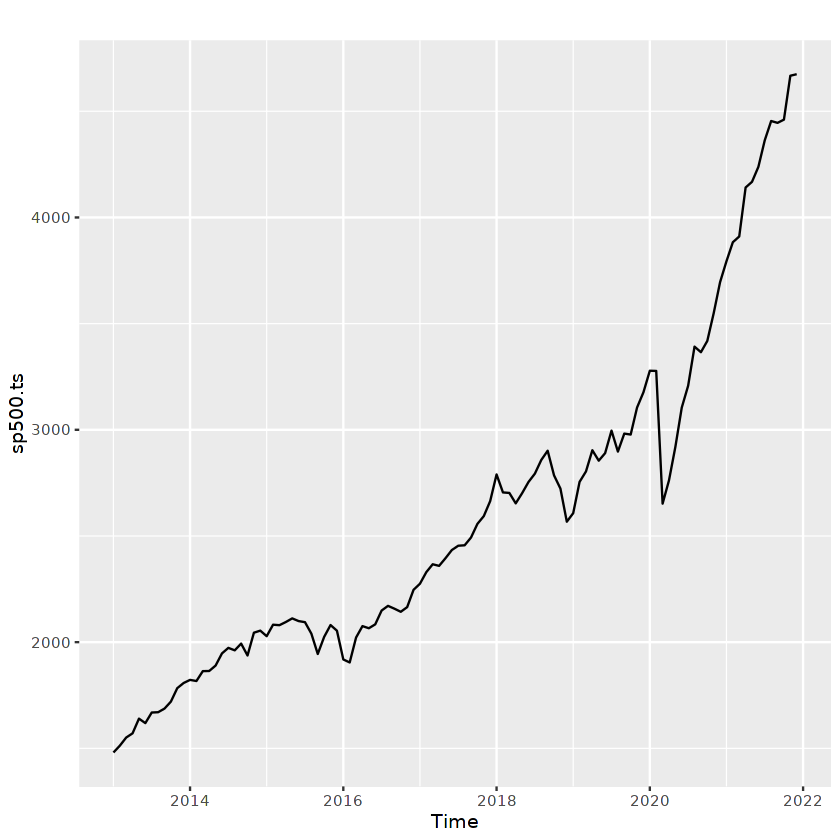

In [15]:
sp500 = read.csv("SP500new.csv")
sp500.ts = ts(sp500$Close, start = c(2013, 1), frequency = 12)

autoplot(sp500.ts)

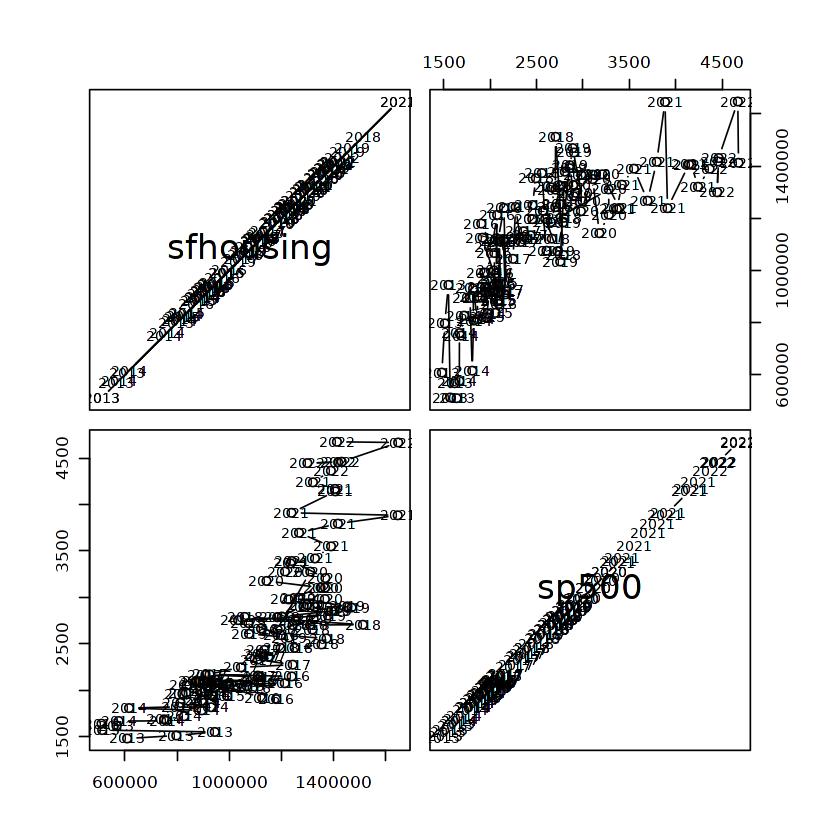

In [16]:
sp500.train.ts = window(sp500.ts, end = c(2020, 12))
sp500.test.ts = window(sp500.ts, end = c(2020, 12))

newdata = ts.intersect(sfhousing = sfhousing.ts, sp500 = sp500.ts)

pairs(newdata)

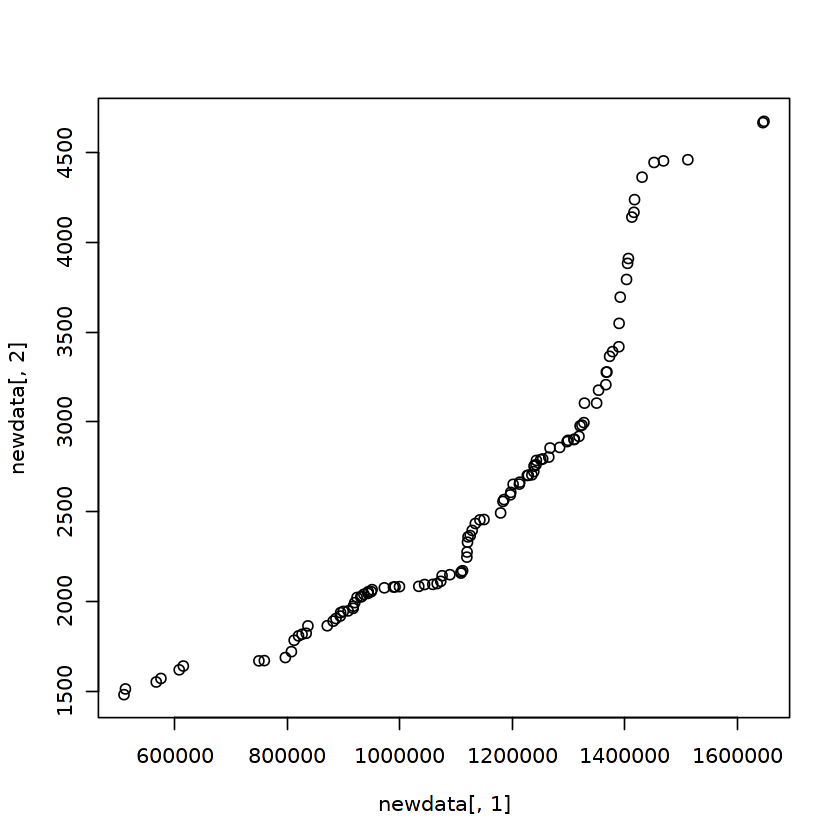

In [17]:
qqplot(newdata[, 1], newdata[, 2])


[1] 0.7902416

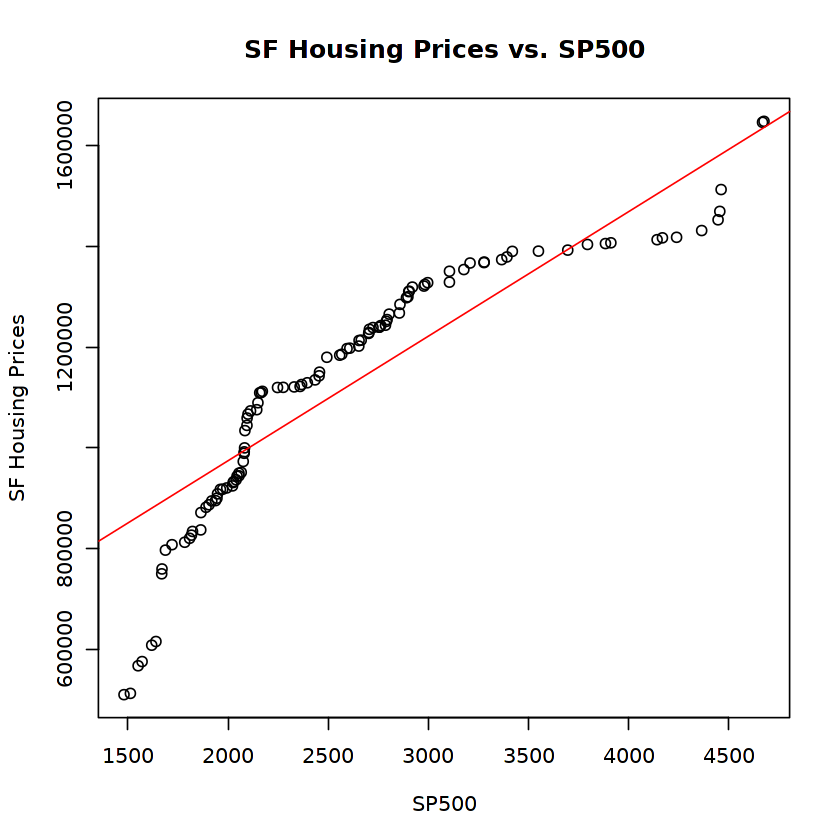

In [18]:
sfhousing.ts = newdata[, 'sfhousing']
sp500.ts = newdata[, 'sp500']

cor(sp500.ts, sfhousing.ts) # correlation = 0.790

m2 = tslm(sfhousing.ts ~ sp500.ts, data = newdata)
qqplot(sp500.ts, sfhousing.ts, main = "SF Housing Prices vs. SP500",
     xlab = "SP500",
     ylab = "SF Housing Prices")
abline(m2, col = "red")

In [19]:
summary(m2)


Call:
tslm(formula = sfhousing.ts ~ sp500.ts, data = newdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-375305 -107692    2667  104416  363669 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 480169.17   50362.63   9.534 6.27e-16 ***
sp500.ts       247.18      18.62  13.277  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 150600 on 106 degrees of freedom
Multiple R-squared:  0.6245,	Adjusted R-squared:  0.6209 
F-statistic: 176.3 on 1 and 106 DF,  p-value: < 2.2e-16


### GDP

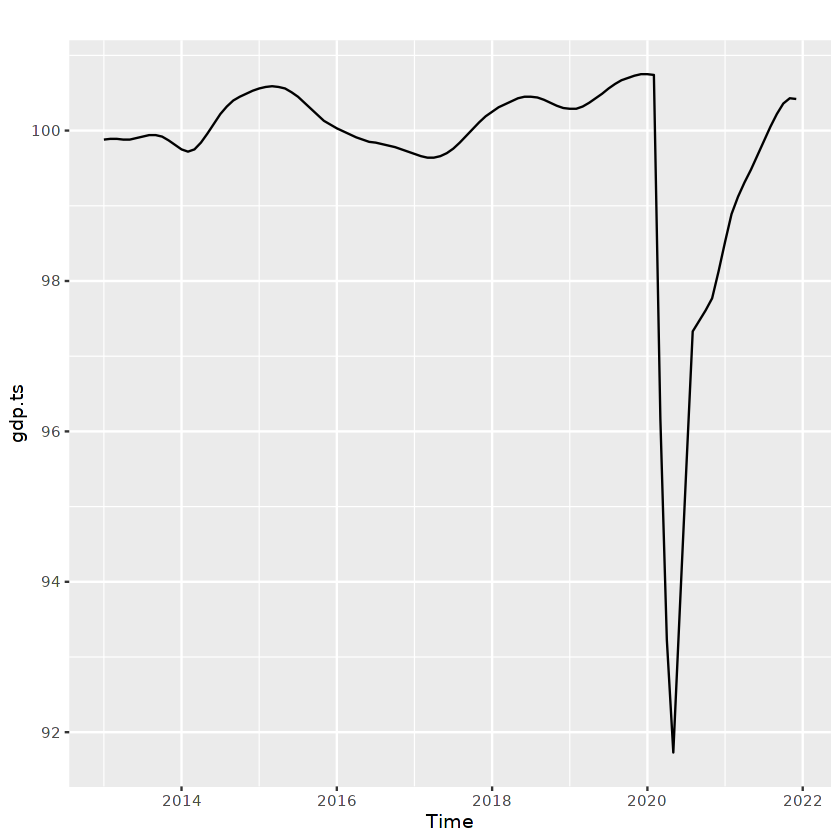

In [20]:
gdp = read.csv("GDP.csv")
gdp.ts = ts(gdp$GDP, start = c(2013, 1), frequency = 12)

autoplot(gdp.ts)

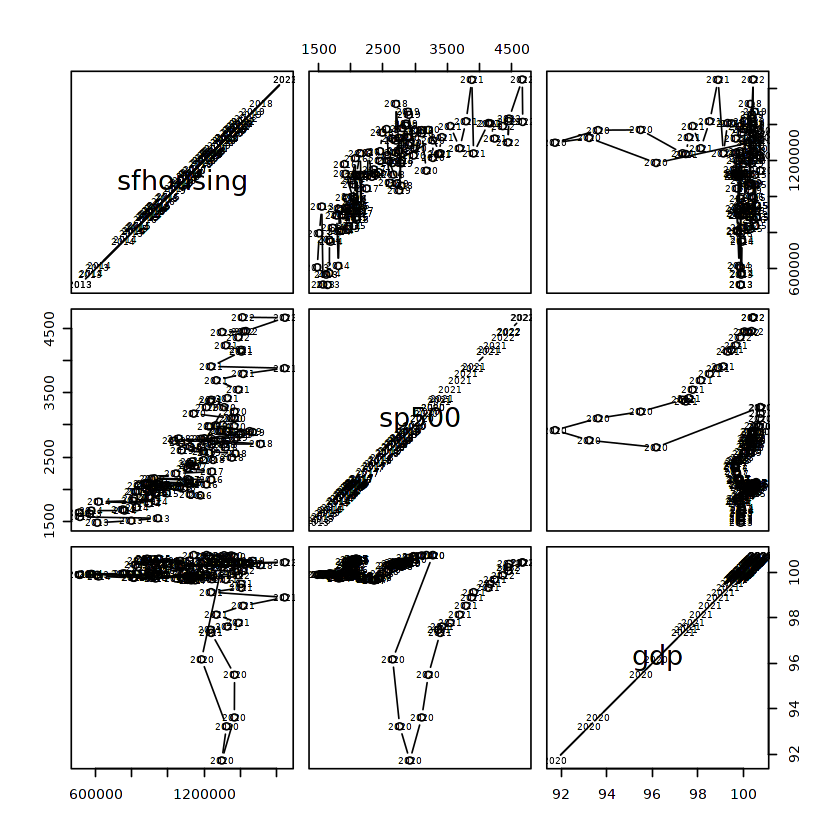

In [21]:
gdp.train.ts = window(gdp.ts, end = c(2020, 12))
gdp.test.ts = window(gdp.ts, end = c(2020, 12))

newdata = ts.intersect(sfhousing = sfhousing.ts, sp500 = sp500.ts, gdp = gdp.ts)

pairs(newdata)

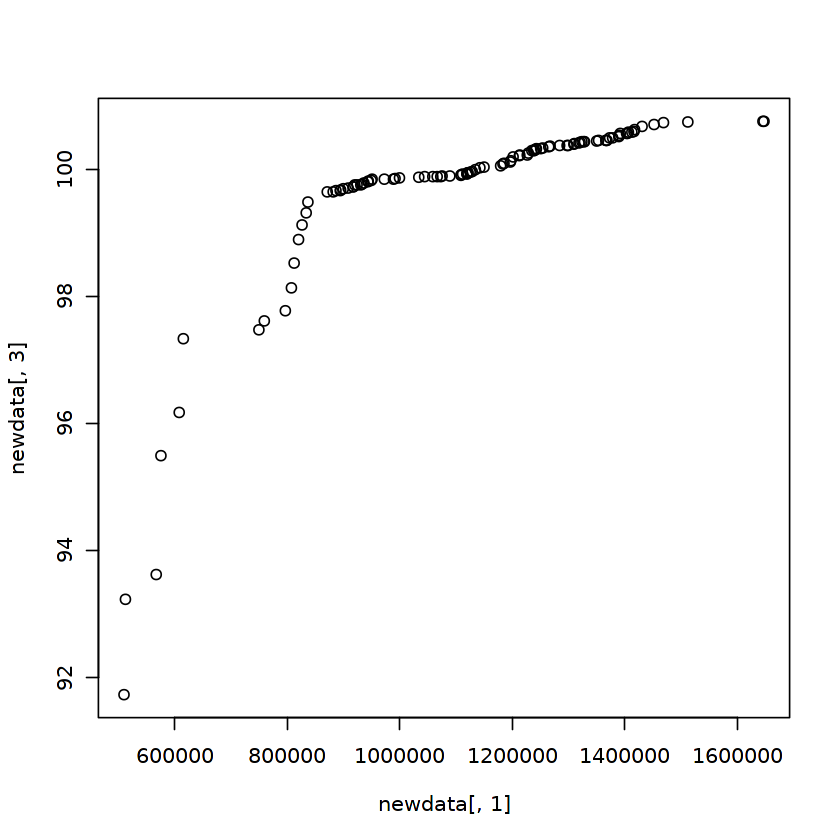

In [22]:
qqplot(newdata[, 1], newdata[, 3])

[1] -0.1960375

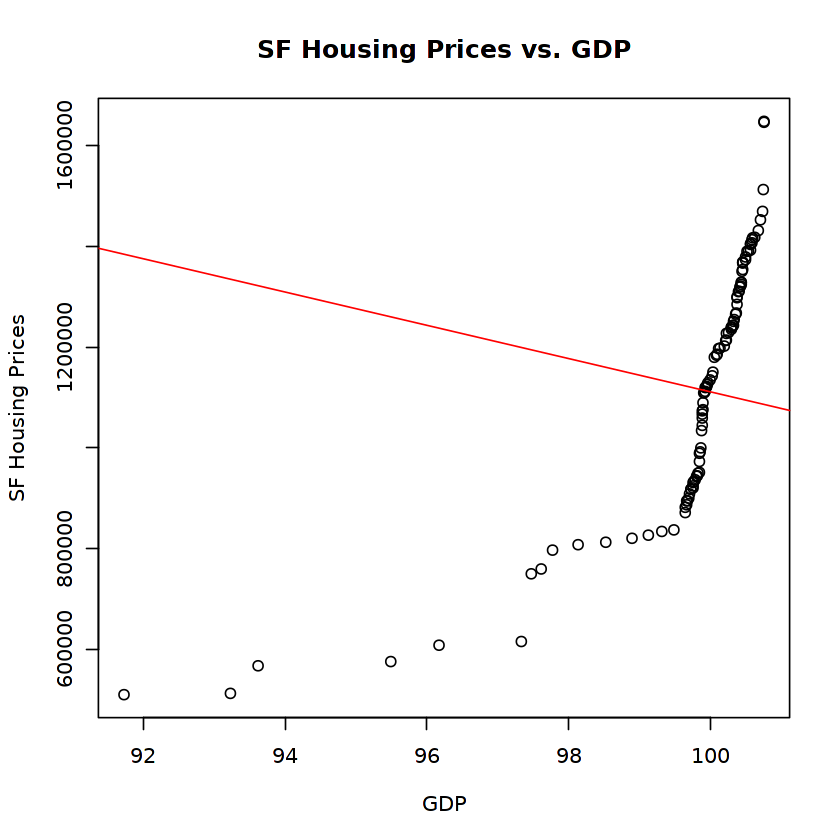

In [23]:
sfhousing.ts = newdata[, 'sfhousing']
sp500.ts = newdata[, 'sp500']
gdp.ts = newdata[, 'gdp']

cor(gdp.ts, sfhousing.ts) # correlation = -0.196

m3 = tslm(sfhousing.ts ~ gdp.ts, data = newdata)
qqplot(gdp.ts, sfhousing.ts, main = "SF Housing Prices vs. GDP",
     xlab = "GDP",
     ylab = "SF Housing Prices")
abline(m3, col = "red")

In [24]:
summary(m3)


Call:
tslm(formula = sfhousing.ts ~ gdp.ts, data = newdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-604647 -172173   14846  176491  551192 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  4414676    1600602   2.758  0.00685 **
gdp.ts        -33038      16051  -2.058  0.04202 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 241000 on 106 degrees of freedom
Multiple R-squared:  0.03843,	Adjusted R-squared:  0.02936 
F-statistic: 4.236 on 1 and 106 DF,  p-value: 0.04202


## ARIMA with S&P500


Call:
lm(formula = sfhousing.train.ts ~ trend + sp500.train.ts, na.action = NULL)

Residuals:
    Min      1Q  Median      3Q     Max 
-260540  -58963    7801   65172  341327 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -2.121e+08  4.064e+07  -5.219 1.09e-06 ***
trend           1.058e+05  2.025e+04   5.225 1.06e-06 ***
sp500.train.ts -9.580e+01  8.893e+01  -1.077    0.284    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 120100 on 93 degrees of freedom
Multiple R-squared:  0.7337,	Adjusted R-squared:  0.728 
F-statistic: 128.1 on 2 and 93 DF,  p-value: < 2.2e-16


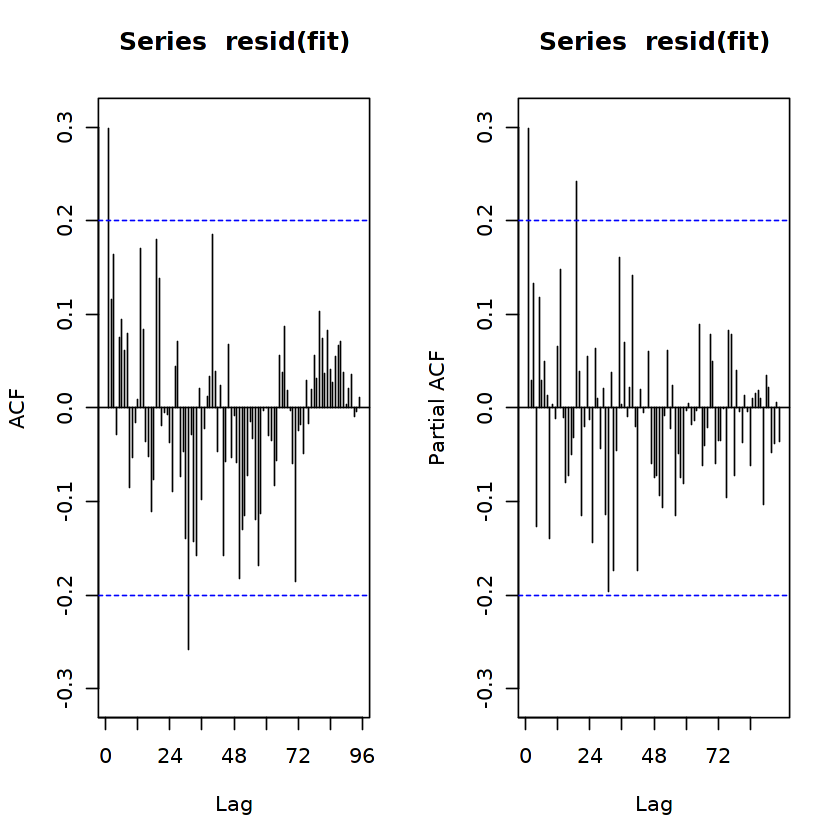

In [25]:
trend = time(sfhousing.train.ts)
summary(fit <- lm(sfhousing.train.ts ~ trend + sp500.train.ts, na.action=NULL))

par(mfrow = c(1,2))
Acf(resid(fit), lag.max = 100)
Pacf(resid(fit), 100)
par(mfrow = c(1,1))

In [26]:
m4 = Arima(sfhousing.train.ts, order = c(1, 1, 0),
           seasonal = list(order = c(0, 1, 0), period = 12),
           xreg = cbind(sp500.train.ts))

arima.pred2 = forecast(m4, h = 12, level = 0,
                       xreg = cbind(sp500.train.ts))

accuracy(arima.pred2, sfhousing.test.ts)

ME        RMSE     MAE      MPE        MAPE     MASE     
Training set  -1625.12 171446.5 124522.7 -0.9165742 11.21788 0.8417006
Test set     194932.24 225411.3 194932.2 13.3049840 13.30498 1.3176277
             ACF1       Theil's U
Training set -0.1795142       NA 
Test set      0.2110733 1.217862


	Ljung-Box test

data:  Residuals from Regression with ARIMA(1,1,0)(0,1,0)[12] errors
Q* = 87.015, df = 18, p-value = 4.938e-11

Model df: 1.   Total lags used: 19



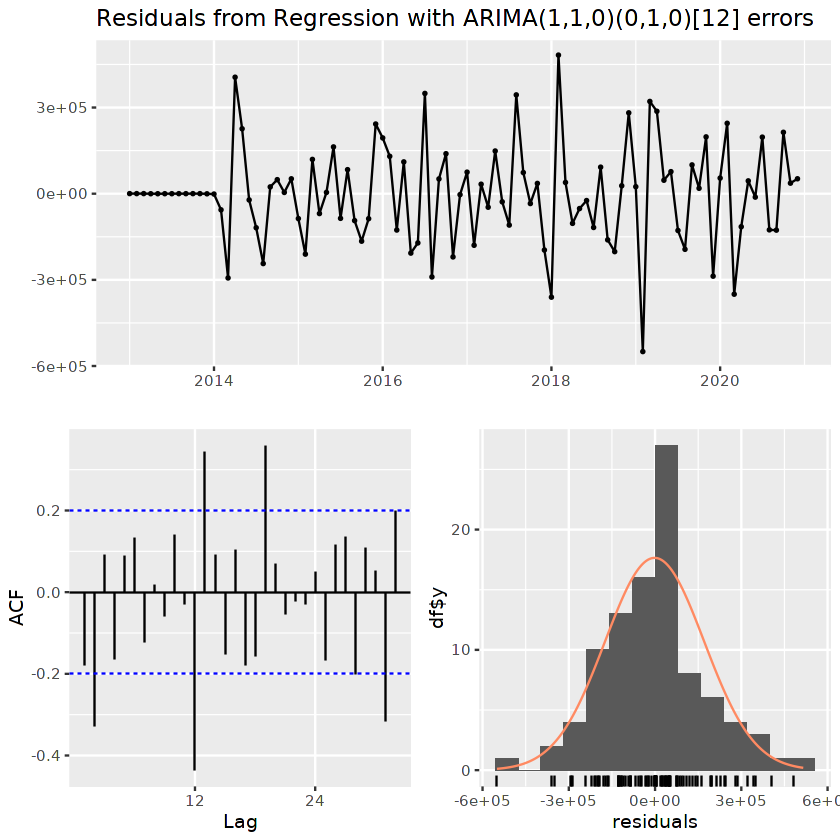

In [27]:
checkresiduals(m4)

## Best Model: ARIMA(3,1,0) x (0,1,0) 12

In [28]:
sf.final.model = Arima(sfhousing.ts,
           order = c(3, 1, 0),
           seasonal = list(order = c(0,1,0), period = 12))

sf.arima.pred.final = forecast(sf.final.model, h = 12, level = 0)

In [29]:
sf.arima.pred.final

         Point Forecast    Lo 0    Hi 0
Jan 2022        1561116 1561116 1561116
Feb 2022        1832004 1832004 1832004
Mar 2022        1405465 1405465 1405465
Apr 2022        1567261 1567261 1567261
May 2022        1575917 1575917 1575917
Jun 2022        1489118 1489118 1489118
Jul 2022        1555394 1555394 1555394
Aug 2022        1585432 1585432 1585432
Sep 2022        1467326 1467326 1467326
Oct 2022        1598017 1598017 1598017
Nov 2022        1815122 1815122 1815122
Dec 2022        1580356 1580356 1580356

In [32]:
sfhousing2022 = read.csv("SFHousing2022.csv")
sfhousing2022.ts = ts(sfhousing2022$Price, start = c(2022, 1), frequency = 12)

In [35]:
accuracy(sf.arima.pred.final, sfhousing2022.ts)

ME           RMSE     MAE      MPE         MAPE     MASE    
Training set    -102.4892 152294.7 117757.0  -0.7513507 10.41497 0.806075
Test set     -170967.7566 296334.8 229408.7 -14.0066658 17.57313 1.570358
             ACF1         Theil's U
Training set -0.014344320       NA 
Test set      0.003595761 1.535804

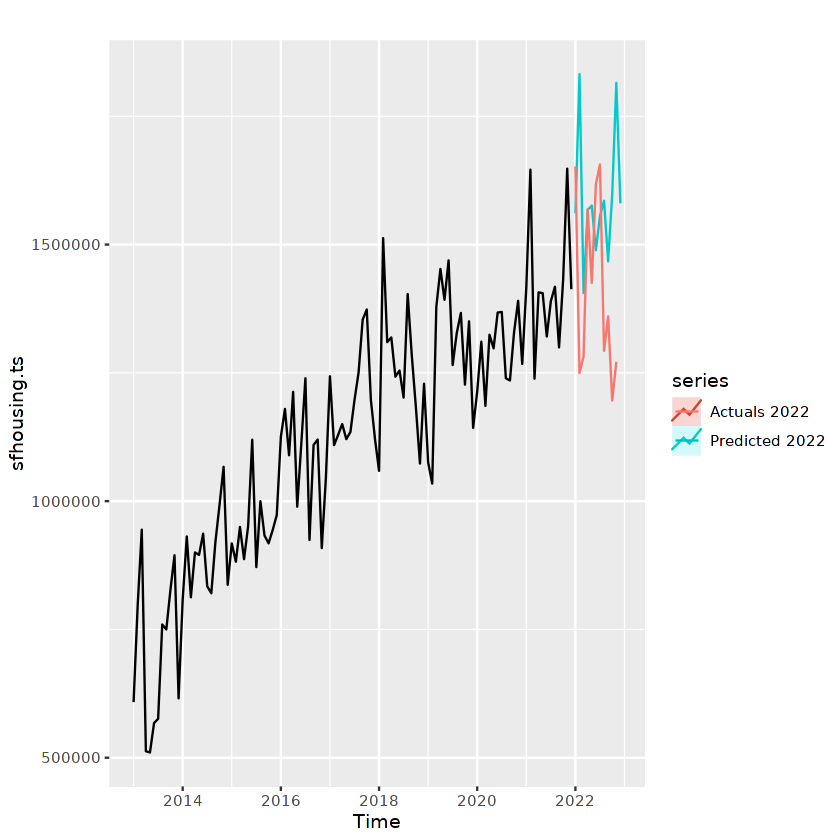

In [33]:
autoplot(sfhousing.ts) + 
autolayer(sf.arima.pred.final, series = "Predicted 2022") + 
autolayer(sfhousing2022.ts, series = "Actuals 2022")

# LA Data

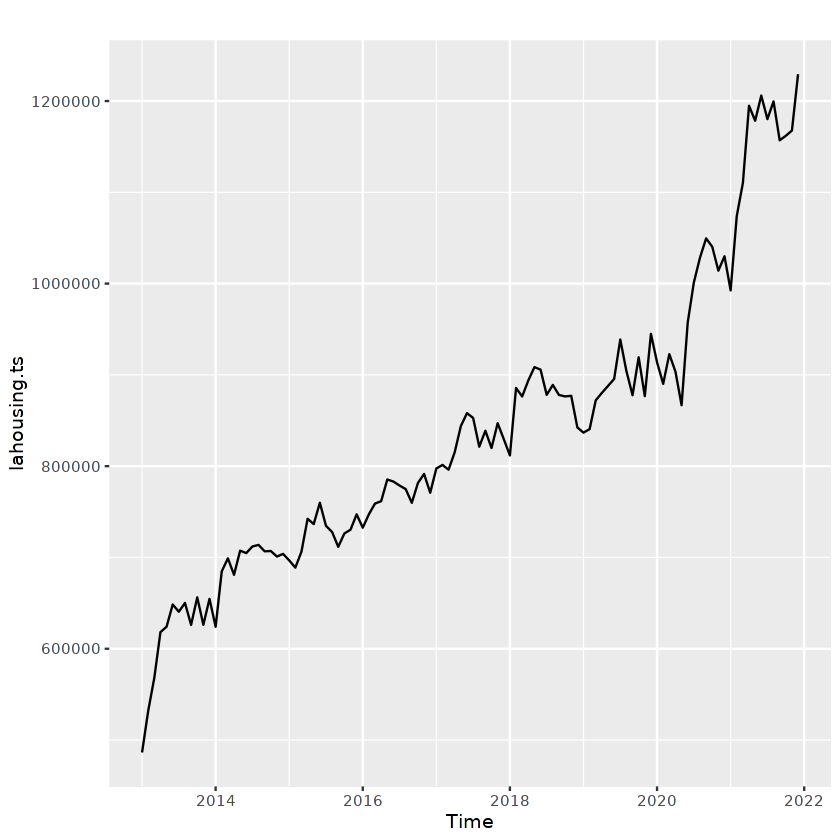

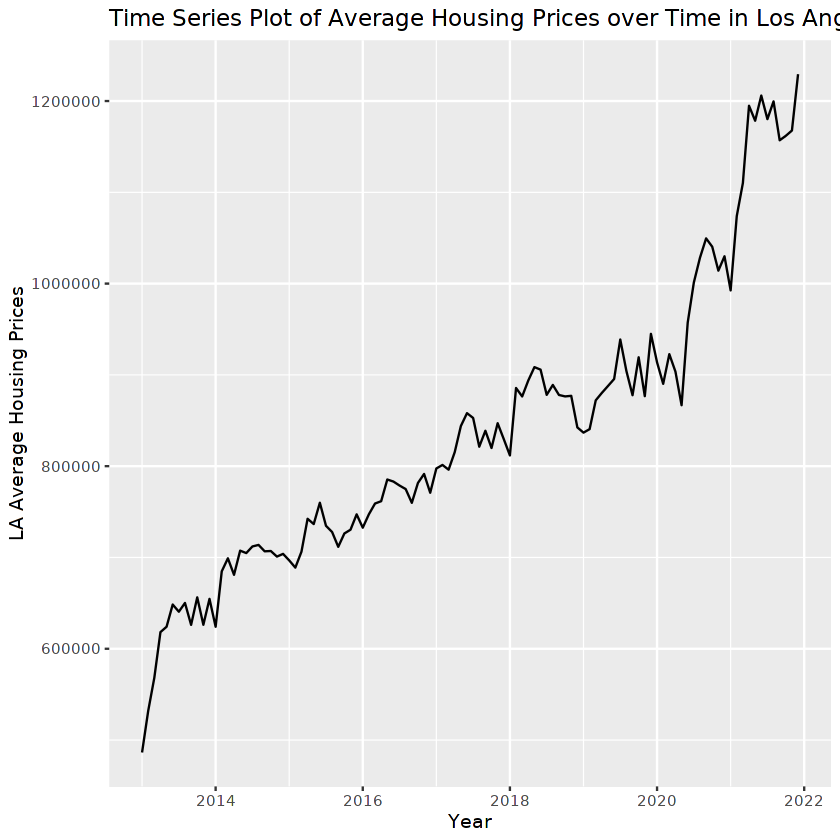

In [36]:
library(data.table)
library(forecast)
library(tseries)

lahousing = read.csv("LAHousingPrices.csv")
lahousing.ts = ts(lahousing$Average.Sale.Price, start = c(2013, 1), frequency = 12)

autoplot(lahousing.ts)

lahousing.train.ts = window(lahousing.ts, end = c(2020, 12))
lahousing.test.ts = window(lahousing.ts, start = c(2021, 01))

library(ggplot2)
autoplot(lahousing.ts, main = "Time Series Plot of Average Housing Prices over Time in Los Angeles",
        xlab = "Year",
        ylab = "LA Average Housing Prices")

## Naive Forecasts

ME         RMSE      MAE       MPE       MAPE      MASE     
Training set   5721.758  26208.54  20332.35  0.733565  2.569561 0.3780636
Test set     124388.583 139563.31 130615.58 10.484337 11.111705 2.4286916
             ACF1       Theil's U
Training set -0.2254032       NA 
Test set      0.4314918 2.982472

ME       RMSE      MAE       MPE       MAPE      MASE    ACF1     
Training set  51031.2  64171.91  53780.23  6.262222  6.580322 1.00000 0.5907661
Test set     186153.2 197896.35 186153.25 15.995087 15.995087 3.46137 0.5363984
             Theil's U
Training set       NA 
Test set     4.295976

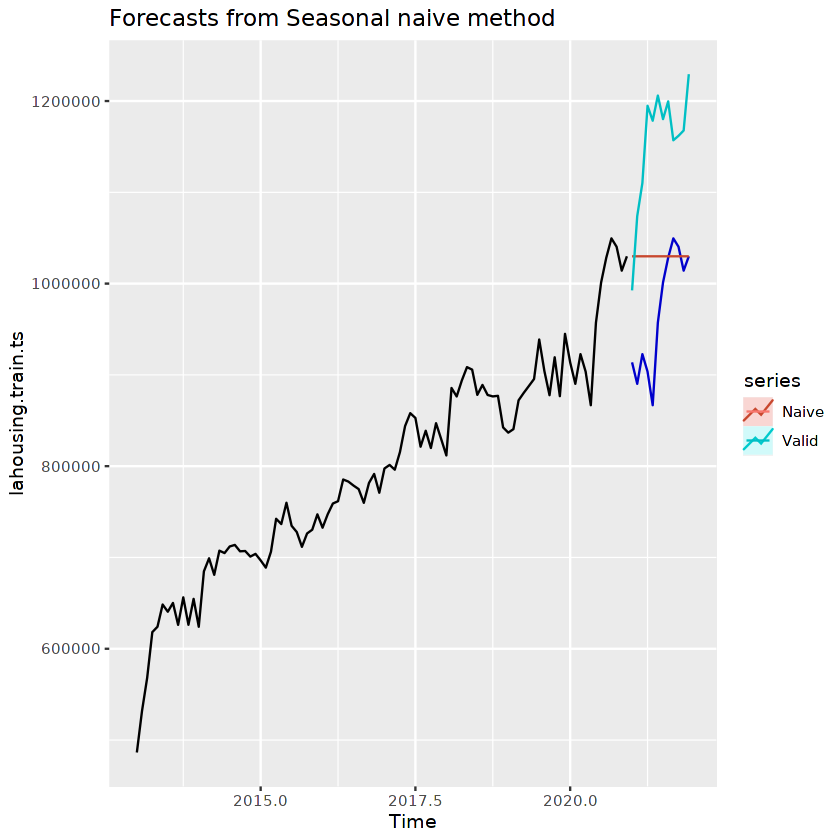


	Ljung-Box test

data:  Residuals from Naive method
Q* = 23.562, df = 19, p-value = 0.2135

Model df: 0.   Total lags used: 19



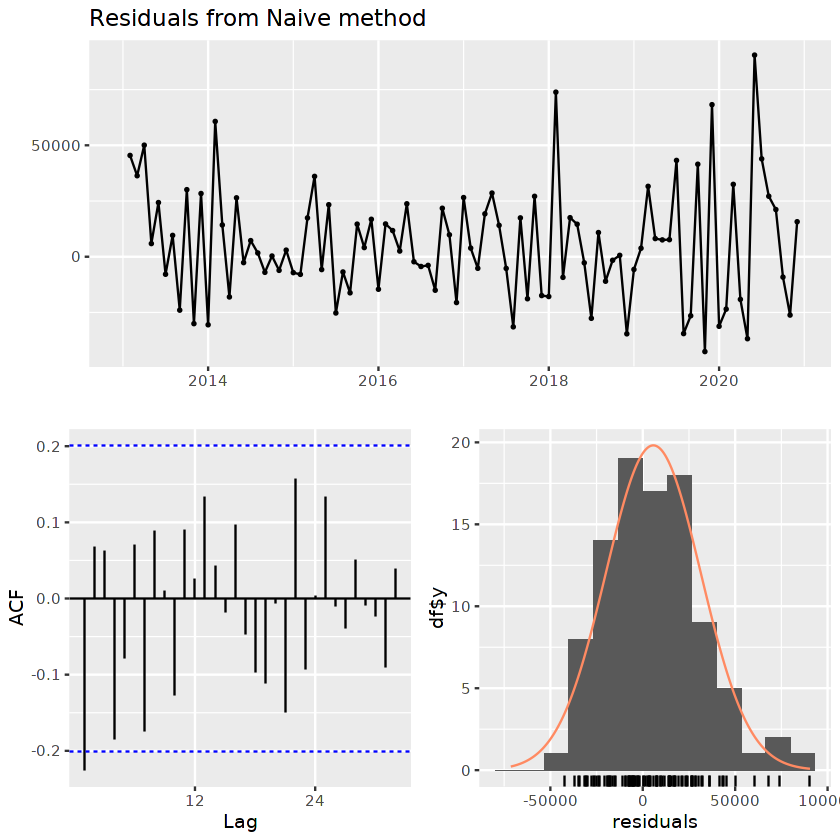


	Ljung-Box test

data:  Residuals from Seasonal naive method
Q* = 112.06, df = 19, p-value = 3.331e-15

Model df: 0.   Total lags used: 19



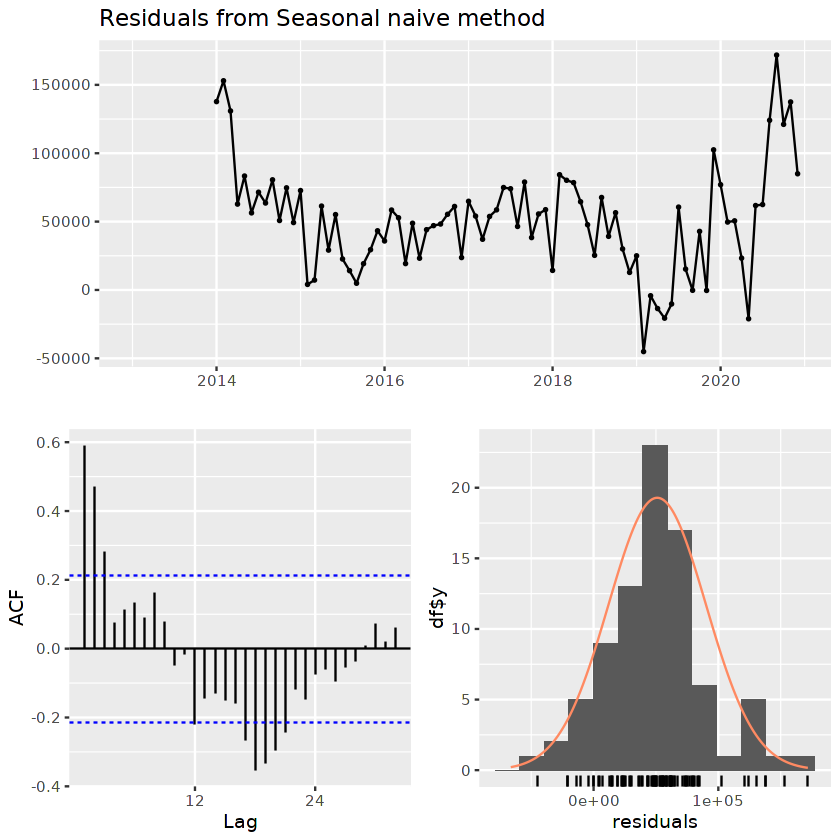

In [37]:
naive = naive(lahousing.train.ts,
              h = frequency(lahousing.train.ts))

seasonal = snaive(lahousing.train.ts,
       h = frequency(lahousing.train.ts))

autoplot(seasonal, series = "Seasonal", PI = FALSE) +
  autolayer(naive, series = "Naive", PI = FALSE) +
  autolayer(lahousing.test.ts, series = "Valid")
  
accuracy(naive, lahousing.test.ts)
accuracy(seasonal, lahousing.test.ts)

checkresiduals(naive)
checkresiduals(seasonal)

In this case, a naive forecast performed better than a seasonal naive forecast. This is because COVID caused a huge spike in LA housing prices from 2020-2022 and therefore the seasonal naive forecast does not accurately show that steep increase. 

Furthermore, our original data did not have seasonality so by adding seasonality to the plot, we were actually introducing it in and causing errors. 

ME        RMSE     MAE      MPE       MAPE     MASE     ACF1      
Training set -316.4255 40029.83 30375.32 135.05638 237.9210 1.140856 -0.6215475
Test set      909.2500 41769.47 35194.08  49.92641 115.2563 1.321842 -0.1867123
             Theil's U
Training set        NA
Test set     0.8063506

ME        RMSE     MAE      MPE       MAPE     MASE     ACF1      
Training set -635.7711 33904.17 26625.02 -125.2859 402.0683 1.000000 -0.4182888
Test set     9543.0000 56657.50 44595.50  101.3775 166.8752 1.674947  0.1768112
             Theil's U
Training set      NA  
Test set     1.08316

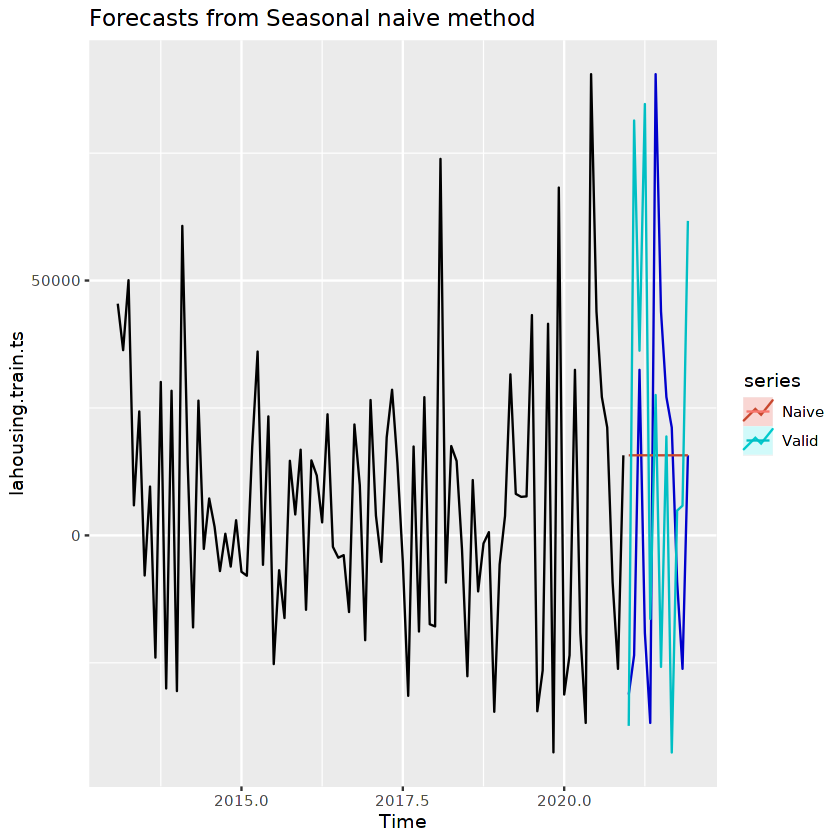


	Ljung-Box test

data:  Residuals from Naive method
Q* = 60.311, df = 19, p-value = 3.455e-06

Model df: 0.   Total lags used: 19



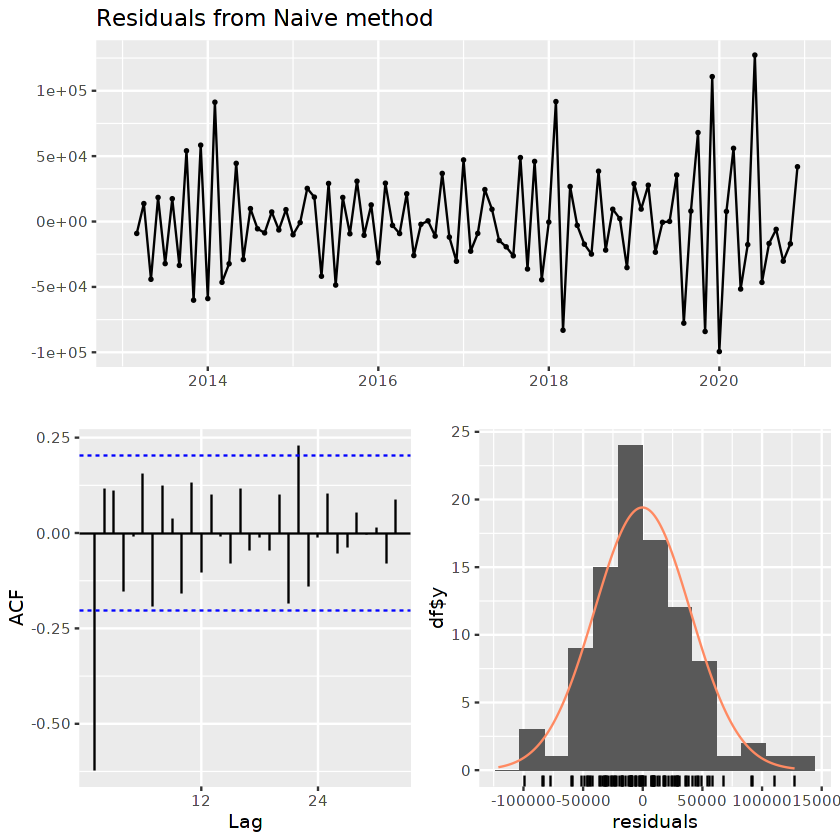


	Ljung-Box test

data:  Residuals from Seasonal naive method
Q* = 71.659, df = 19, p-value = 4.863e-08

Model df: 0.   Total lags used: 19



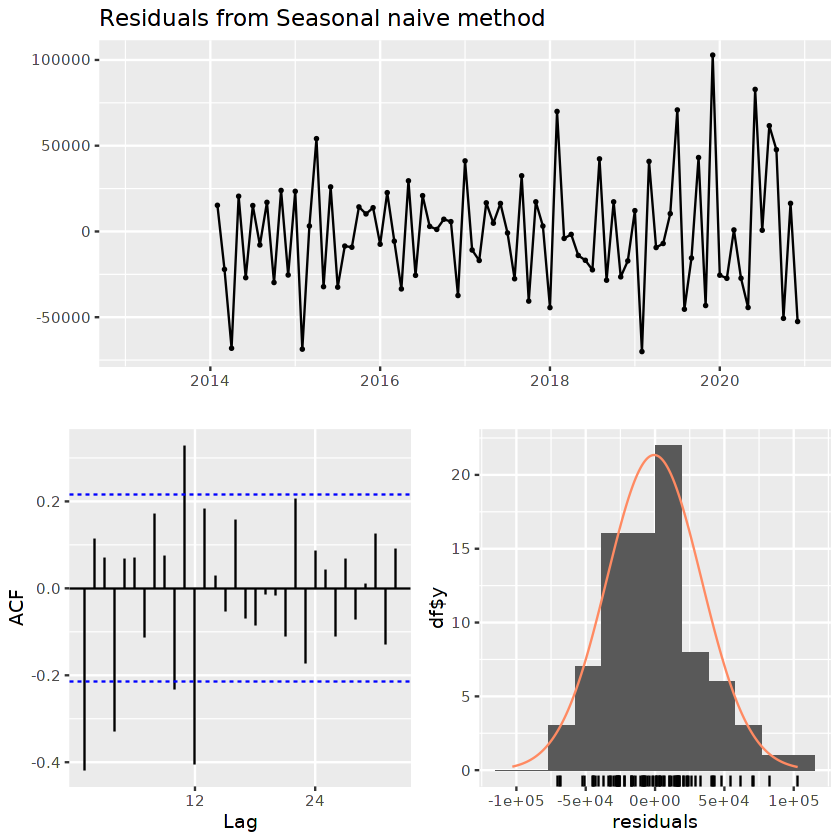

In [ ]:
# trying to difference data before but it makes it worse

# lahousing.diff = diff(lahousing.ts, lag = 1)

# lahousing.train.ts = window(lahousing.diff, end = c(2020, 12))
# lahousing.test.ts = window(lahousing.diff, start = c(2021, 01))

# naive = naive(lahousing.train.ts,
#               h = frequency(lahousing.train.ts))

# seasonal = snaive(lahousing.train.ts,
#        h = frequency(lahousing.train.ts))

# autoplot(seasonal, series = "Seasonal", PI = FALSE) +
#   autolayer(naive, series = "Naive", PI = FALSE) +
#   autolayer(lahousing.test.ts, series = "Valid")
  
# accuracy(naive, lahousing.test.ts)
# accuracy(seasonal, lahousing.test.ts)

# checkresiduals(naive)
# checkresiduals(seasonal)


## Holt's Winter Model with Automatically Selected Components

ME         RMSE      MAE       MPE         MAPE      MASE     
Training set   1413.634  25344.07  19704.73  0.03834209  2.516296 0.3663935
Test set     124550.277 139394.09 130478.58 10.50199496 11.099269 2.4261442
             ACF1        Theil's U
Training set -0.01148135       NA 
Test set      0.42816618 2.980371

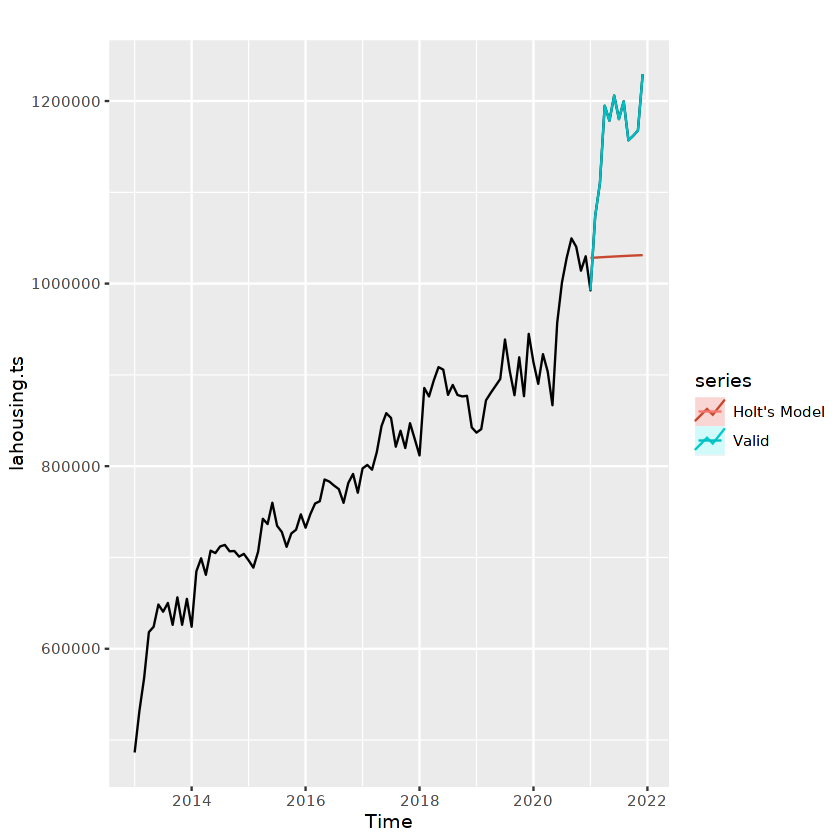


	Ljung-Box test

data:  Residuals from ETS(A,Ad,N)
Q* = 18.722, df = 14, p-value = 0.1758

Model df: 5.   Total lags used: 19



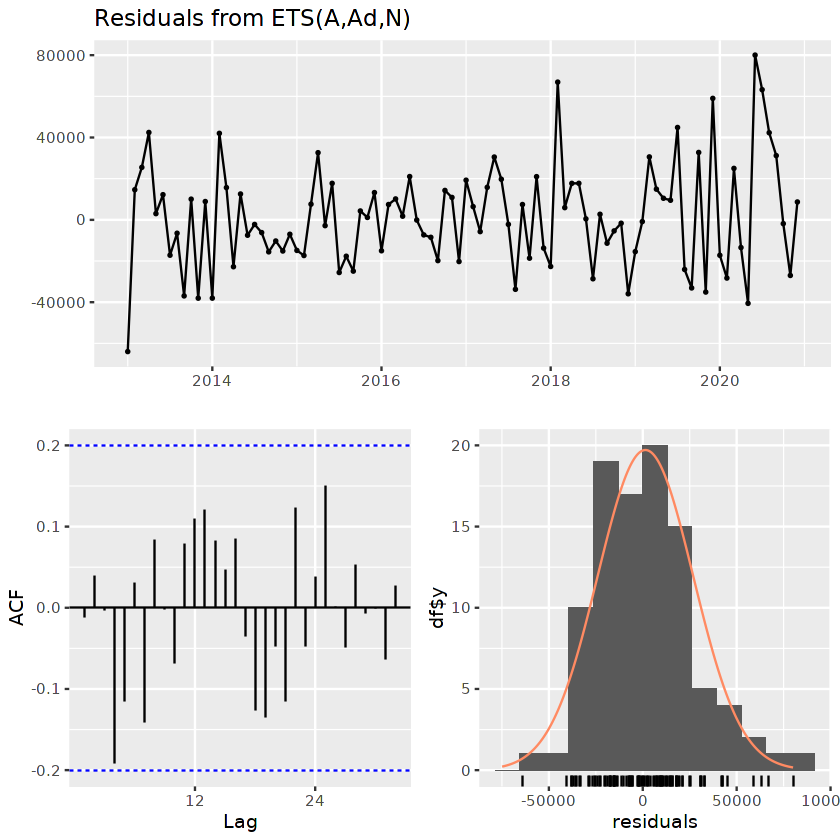

In [38]:
zzz = ets(lahousing.train.ts, model="ZZZ")
zzz.pred = forecast(zzz, h = 12, level = 0)

autoplot(lahousing.ts) +
  autolayer(zzz.pred, series = "Holt's Model") +
  autolayer(lahousing.test.ts, series = "Valid")

accuracy(zzz.pred, lahousing.test.ts)

checkresiduals(zzz)

## ARIMA Model

Differenced for trend and seasonality and did a AR[1] model after looking at the ACF and PACF graphs.


	Augmented Dickey-Fuller Test

data:  lahousing.train.ts
Dickey-Fuller = -3.9062, Lag order = 4, p-value = 0.01692
alternative hypothesis: stationary


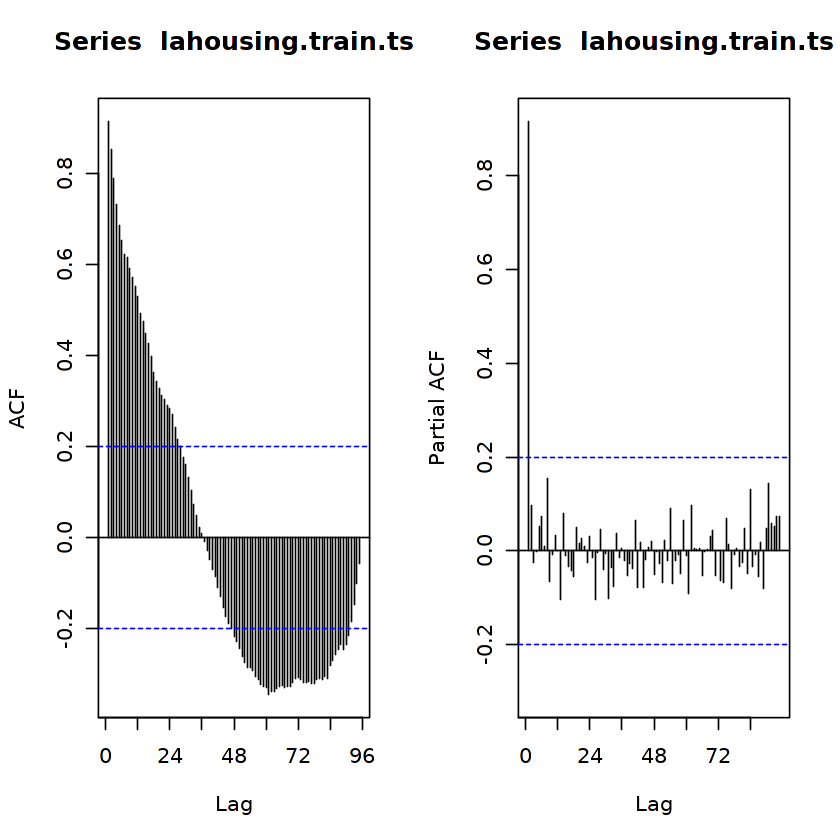

ME        RMSE     MAE      MPE       MAPE     MASE     
Training set  7443.965 25324.29 19719.77 0.9552502 2.503119 0.3666732
Test set     64015.176 93759.63 78484.68 5.4651309 6.922927 1.4593594
             ACF1        Theil's U
Training set -0.06518683       NA 
Test set      0.14448041 1.446494

Series: lahousing.train.ts 
ARIMA(1,1,0)(1,0,1)[4] 

Coefficients:
          ar1     sar1    sma1
      -0.1749  -0.4407  0.2858
s.e.   0.1037   0.5147  0.5431

sigma^2 = 669203247:  log likelihood = -1098.63
AIC=2205.26   AICc=2205.7   BIC=2215.48

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 7443.965 25324.29 19719.77 0.9552502 2.503119 0.3666732
                    ACF1
Training set -0.06518683

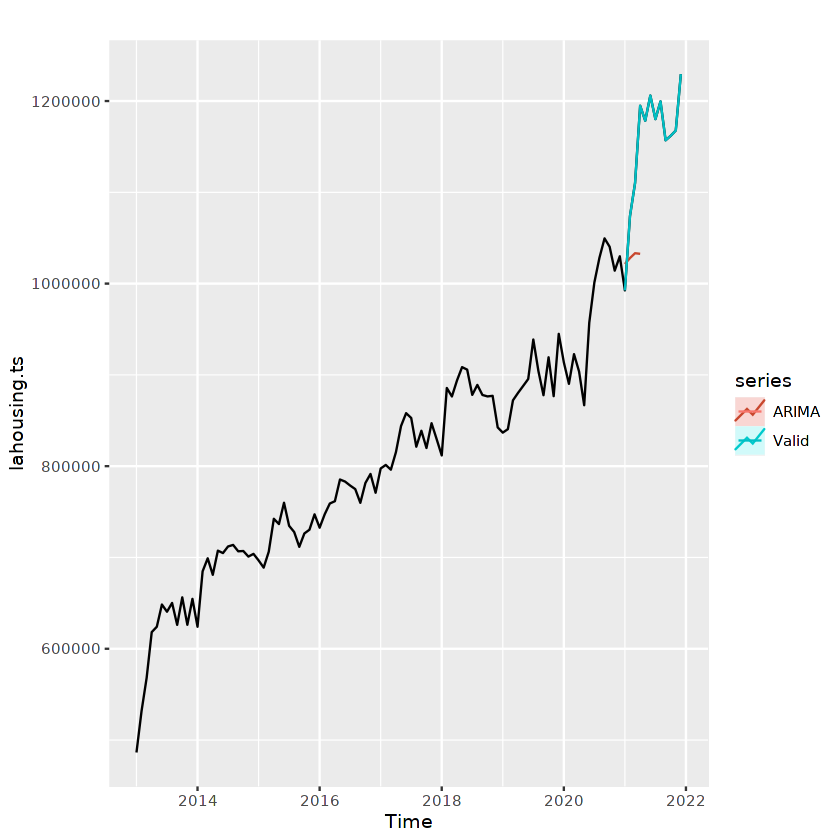


	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)(1,0,1)[4]
Q* = 18.406, df = 16, p-value = 0.3007

Model df: 3.   Total lags used: 19



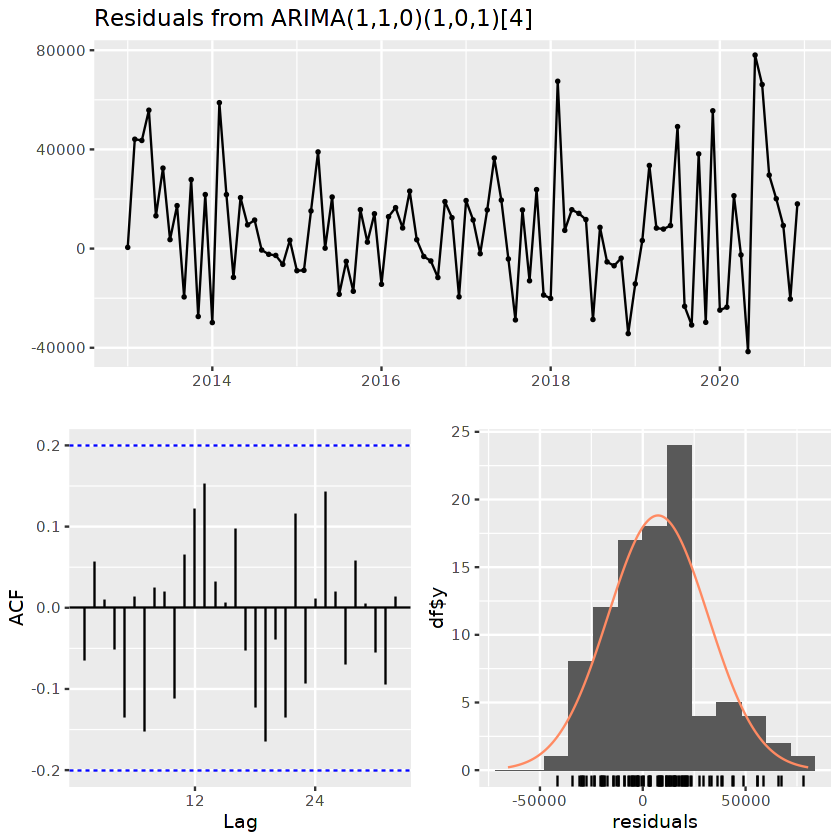

In [39]:
par(mfrow = c(1, 2))
Acf(lahousing.train.ts, lag.max = 100)
Pacf(lahousing.train.ts, lag.max = 100)
par(mfrow = c(1, 1))

adf.test(lahousing.train.ts)

m1 = Arima(lahousing.train.ts,
           order = c(1, 1, 0),
           seasonal = list(order = c(1,0,1), period = 4))

arima.pred = forecast(m1, h = 4, level = 0)

autoplot(lahousing.ts) +
  autolayer(arima.pred, series = "ARIMA") +
  autolayer(lahousing.test.ts, series = "Valid")

accuracy(arima.pred, lahousing.test.ts)
summary(m1)

checkresiduals(m1)

ME         RMSE      MAE       MPE       MAPE     MASE     
Training set   4292.326  24323.05  18189.97 0.5625092 2.295156 0.3382278
Test set     101271.614 113400.56 105918.95 8.5407858 9.009003 1.9694777
             ACF1        Theil's U
Training set -0.01936684       NA 
Test set      0.37349098 2.429969

Series: lahousing.train.ts 
ARIMA(1,1,0)(1,0,1)[12] 

Coefficients:
          ar1    sar1     sma1
      -0.2317  0.9920  -0.9490
s.e.   0.1029  0.0654   0.2163

sigma^2 = 617332741:  log likelihood = -1097.79
AIC=2203.58   AICc=2204.02   BIC=2213.79

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 4292.326 24323.05 18189.97 0.5625092 2.295156 0.3382278
                    ACF1
Training set -0.01936684

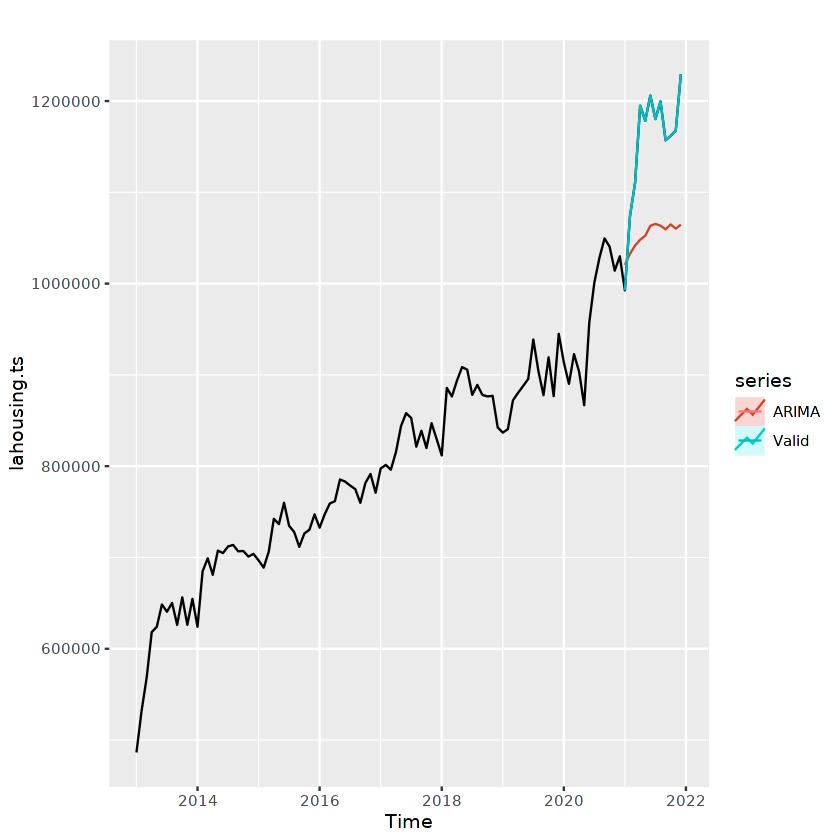


	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)(1,0,1)[12]
Q* = 18.393, df = 16, p-value = 0.3014

Model df: 3.   Total lags used: 19



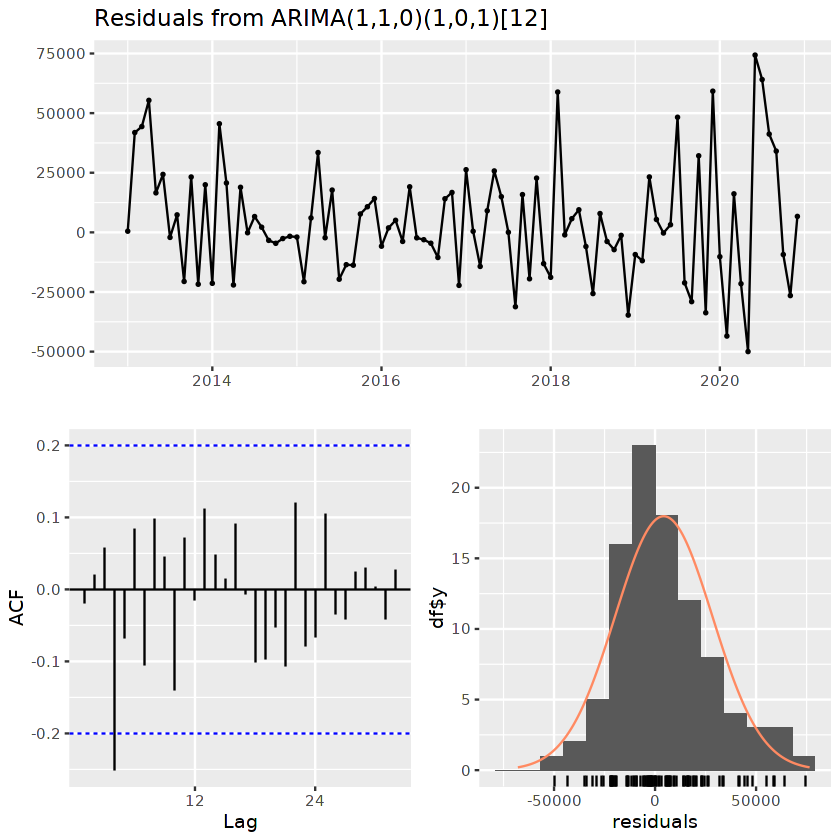

In [40]:
m6 = Arima(lahousing.train.ts,
           order = c(1, 1, 0),
           seasonal = list(order = c(1,0,1), period = 12))

arima.pred1 = forecast(m6, h = 12, level = 0)

autoplot(lahousing.ts) +
  autolayer(arima.pred1, series = "ARIMA") +
  autolayer(lahousing.test.ts, series = "Valid")

accuracy(arima.pred1, lahousing.test.ts)
summary(m6)

checkresiduals(m6)

## Neural Network Model

ME          RMSE      MAE       MPE         MAPE      MASE     
Training set     50.9595  17792.75  13789.11 -0.04082843  1.667997 0.2563975
Test set     112545.4167 127391.14 119244.37  9.47617048 10.151087 2.2172530
             ACF1       Theil's U
Training set -0.1289055       NA 
Test set      0.4023561 2.722922

Warning message:
“Removed 12 rows containing missing values (`geom_line()`).”


ME           RMSE      MAE      MPE         MAPE     MASE    
Training set    -65.04969  20417.05  15938.9 -0.07022011 1.934335 0.296371
Test set     107467.16201 122338.23 114248.1  9.04677727 9.729950 2.124351
             ACF1       Theil's U
Training set -0.1986712       NA 
Test set      0.4041675 2.614888

Warning message:
“Removed 12 rows containing missing values (`geom_line()`).”


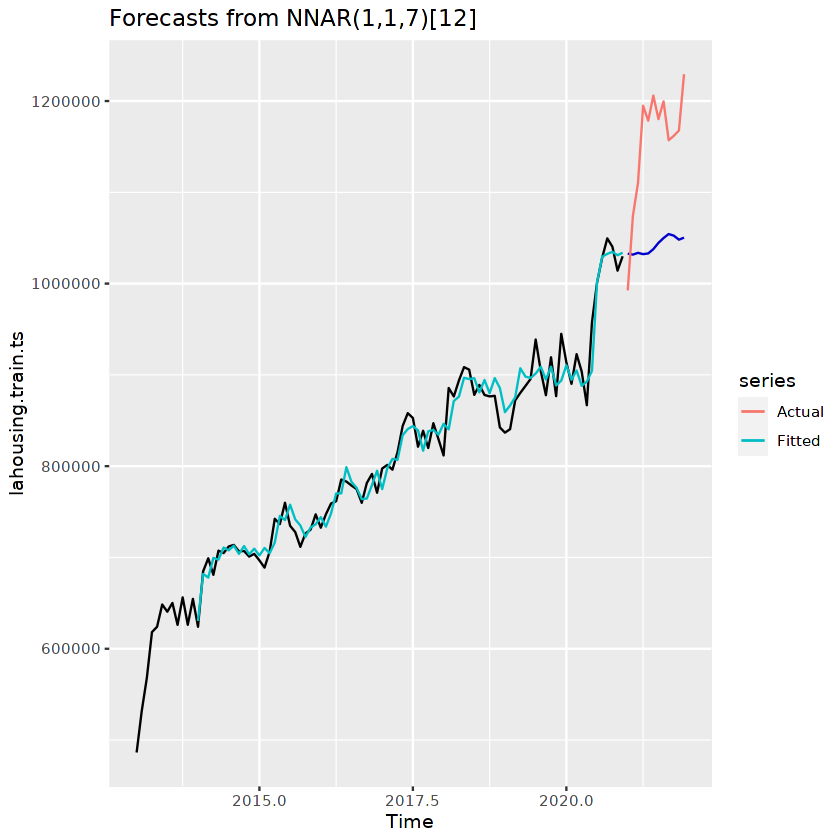

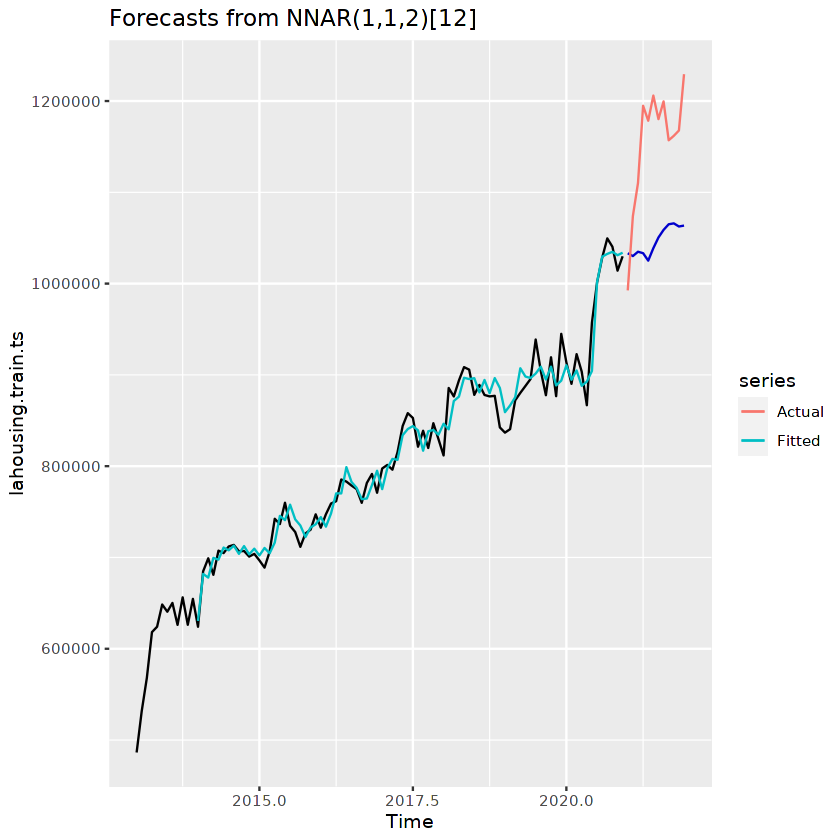

In [41]:
set.seed(201)

lahousing.nnetar = nnetar(lahousing.train.ts, repeats = 20, p = 1, P = 1, size = 7)
lahousing.nnetar.pred = forecast(lahousing.nnetar, h = 12)
accuracy(lahousing.nnetar.pred, lahousing.test.ts)

autoplot(lahousing.nnetar.pred) +
  autolayer(lahousing.nnetar$fitted, series = "Fitted") +
  autolayer(lahousing.test.ts, series = "Actual")

lahousing.nnetar.opt = nnetar(lahousing.train.ts)
lahousing.nnetar.pred.opt = forecast(lahousing.nnetar.opt, h = 12)
accuracy(lahousing.nnetar.pred.opt, lahousing.test.ts)

autoplot(lahousing.nnetar.pred.opt) +
  autolayer(lahousing.nnetar$fitted, series = "Fitted") +
  autolayer(lahousing.test.ts, series = "Actual")

Warning message in modeldf.default(object):
“Could not find appropriate degrees of freedom for this model.”


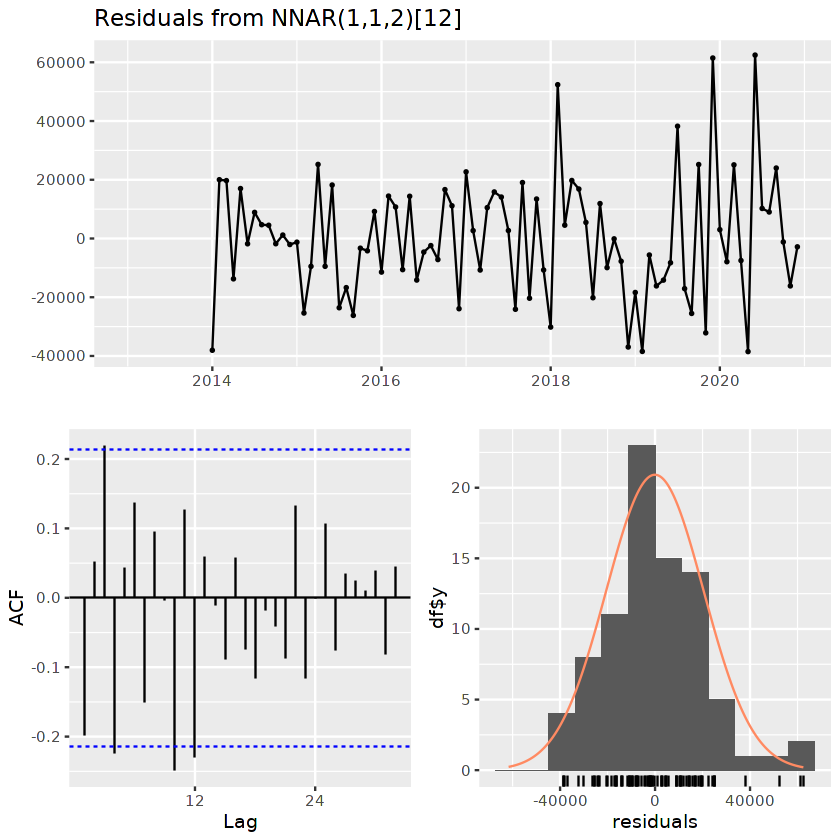

In [42]:
checkresiduals(lahousing.nnetar.pred.opt)

## Linear Regression

We looked at both S&P500 and GDP as external factors that would help in predicting housing prices. We first looked at S&P500.

### S&P 500

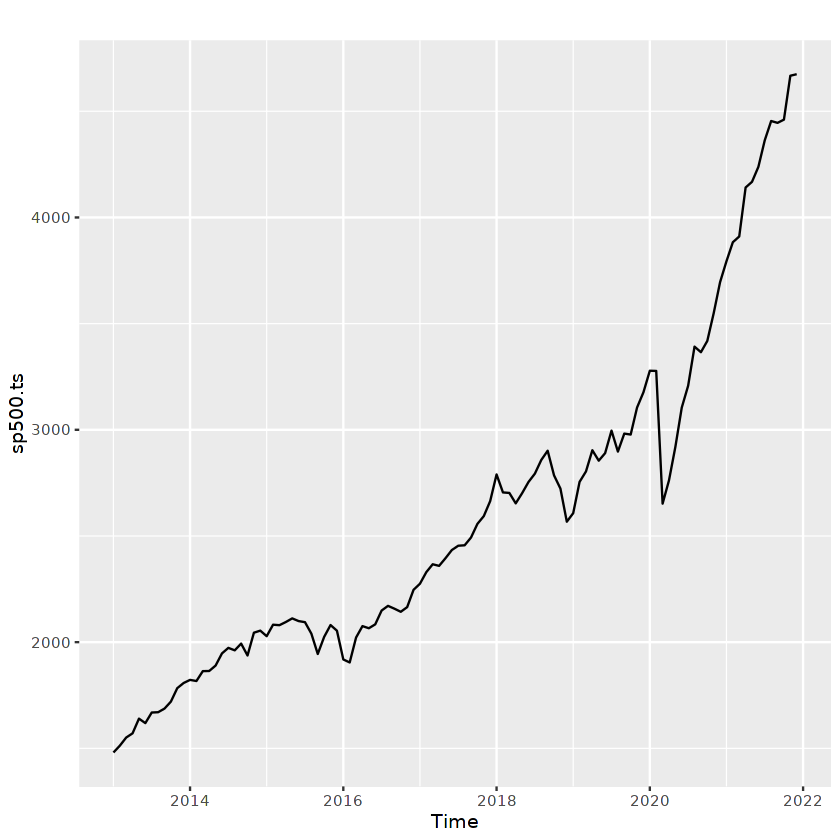

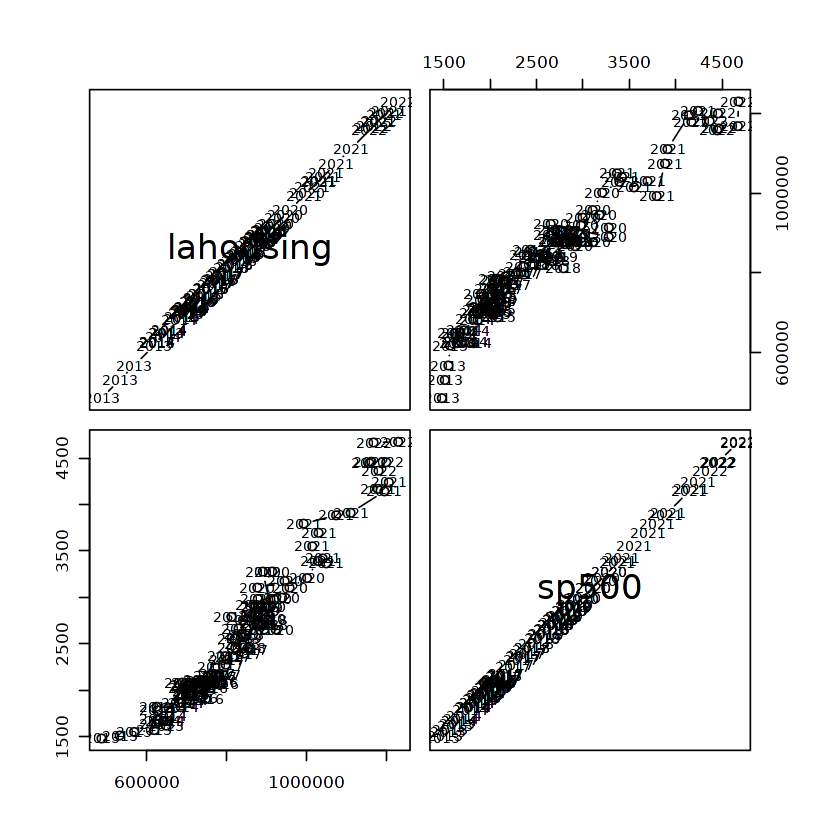

[1] 0.9740988

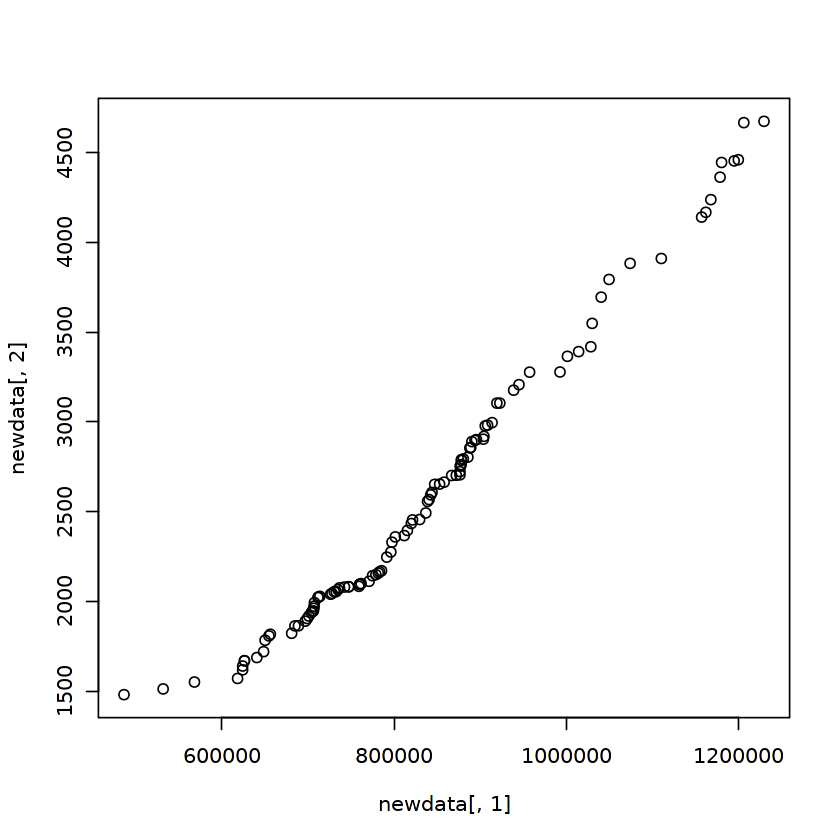


Call:
tslm(formula = lahousing.ts ~ sp500.ts, data = newdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-129365  -17962    2645   23725   75316 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.231e+05  1.206e+04   26.80   <2e-16 ***
sp500.ts    1.977e+02  4.457e+00   44.35   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 36050 on 106 degrees of freedom
Multiple R-squared:  0.9489,	Adjusted R-squared:  0.9484 
F-statistic:  1967 on 1 and 106 DF,  p-value: < 2.2e-16


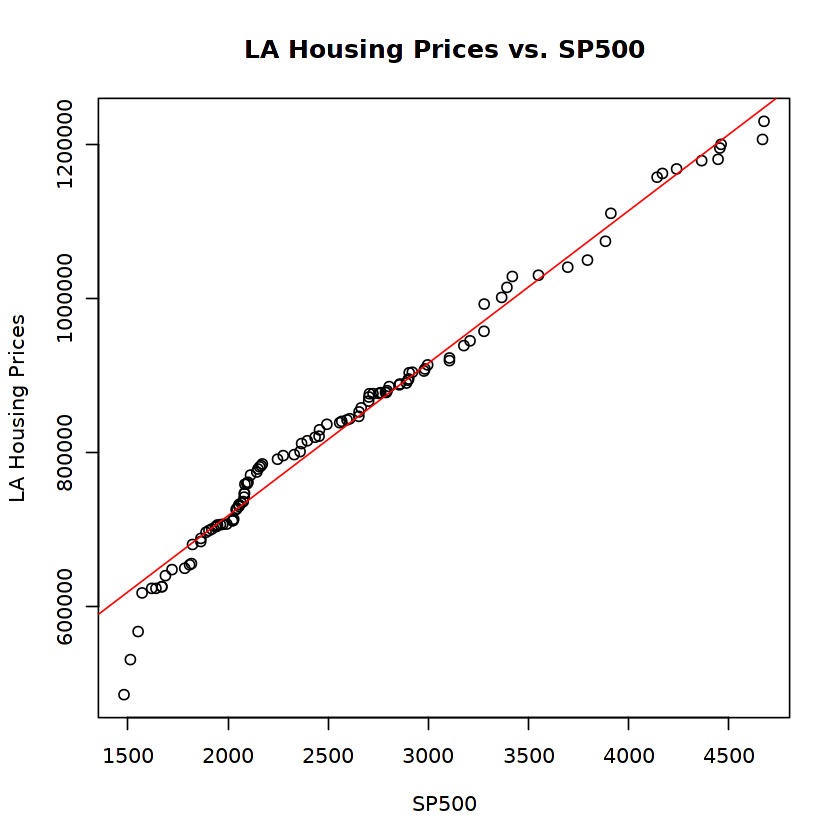

In [43]:
sp500 = read.csv("SP500new.csv")
sp500.ts = ts(sp500$Close, start = c(2013, 1), frequency = 12)

autoplot(sp500.ts)

sp500.train.ts = window(sp500.ts, end = c(2020, 12))
sp500.test.ts = window(sp500.ts, end = c(2020, 12))

newdata = ts.intersect(lahousing = lahousing.ts, sp500 = sp500.ts)

pairs(newdata)

library(ggplot2)
qqplot(newdata[, 1], newdata[, 2])

lahousing.ts = newdata[, 'lahousing']
sp500.ts = newdata[, 'sp500']

cor(sp500.ts, lahousing.ts) # correlation = 0.974

m2 = tslm(lahousing.ts ~ sp500.ts, data = newdata)
qqplot(sp500.ts, lahousing.ts, main = "LA Housing Prices vs. SP500",
     xlab = "SP500",
     ylab = "LA Housing Prices")
abline(m2, col = "red")
summary(m2)

Checking here to see if a lag would help. Does not. 

[1] 0.9718032


Call:
tslm(formula = lahousing.ts1 ~ sp500.ts1, data = newdata1)

Residuals:
    Min      1Q  Median      3Q     Max 
-134778  -18378    2313   28090   60564 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.289e+05  1.242e+04   26.49   <2e-16 ***
sp500.ts1   1.932e+02  4.575e+00   42.23   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 36650 on 105 degrees of freedom
Multiple R-squared:  0.9444,	Adjusted R-squared:  0.9439 
F-statistic:  1784 on 1 and 105 DF,  p-value: < 2.2e-16


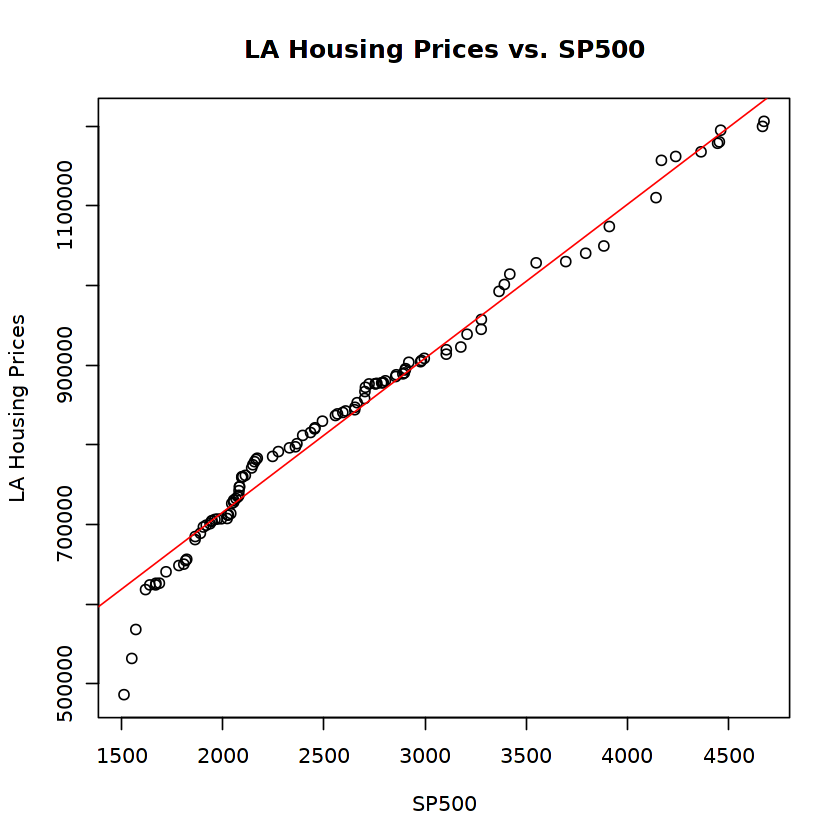

In [44]:
newdata1 = ts.intersect(lahousing = lag(lahousing.ts, -1), sp500 = sp500.ts)
lahousing.ts1 = newdata1[, 'lahousing']
sp500.ts1 = newdata1[, 'sp500']

cor(sp500.ts1, lahousing.ts1) # correlation = 0.974

m4 = tslm(lahousing.ts1 ~ sp500.ts1, data = newdata1)
qqplot(sp500.ts1, lahousing.ts1, main = "LA Housing Prices vs. SP500",
     xlab = "SP500",
     ylab = "LA Housing Prices")
abline(m4, col = "red")
summary(m4)

### GDP

Running the same linear regression analysis on GDP data. Can see that SP500 is a better predictor. 

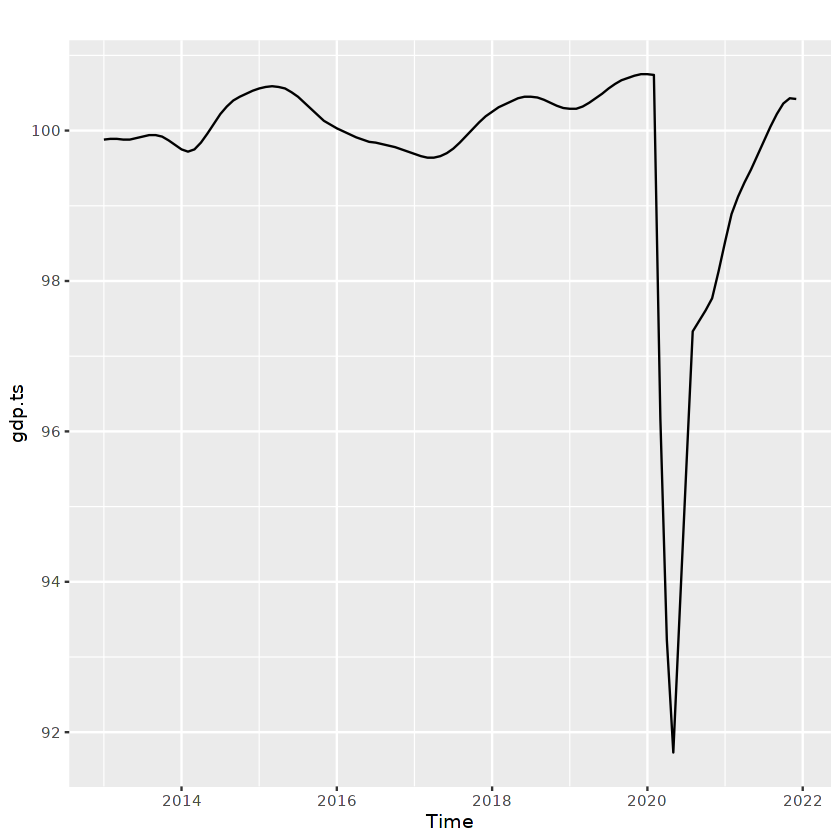

[1] -0.2162585

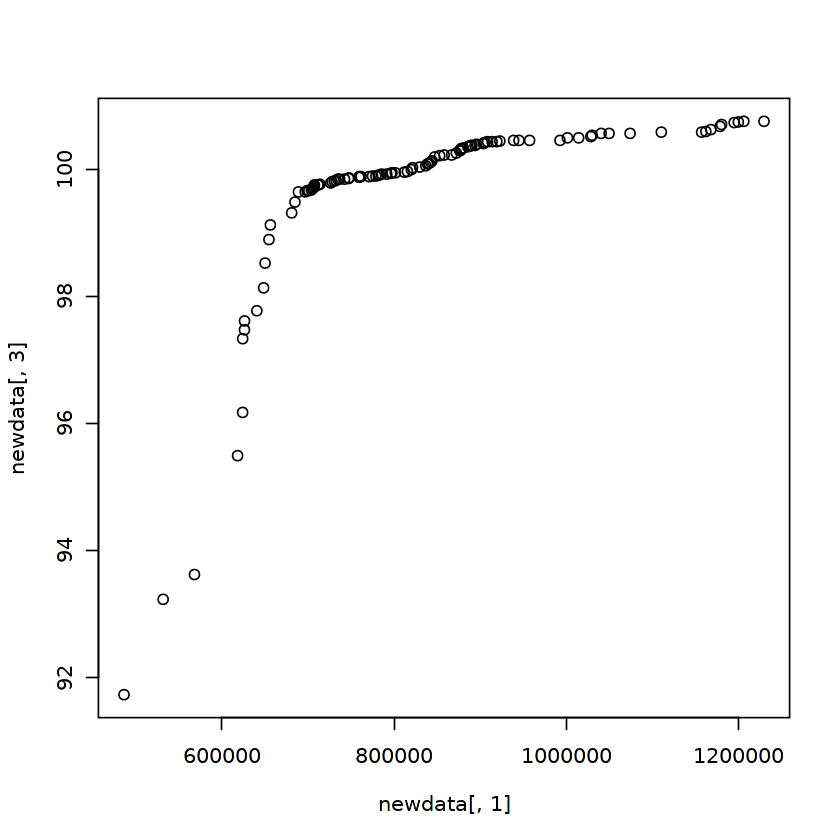


Call:
tslm(formula = lahousing.ts ~ gdp.ts, data = newdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-344767 -108468  -21629   72047  411059 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  3192756    1033902   3.088  0.00257 **
gdp.ts        -23645      10368  -2.280  0.02458 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 155700 on 106 degrees of freedom
Multiple R-squared:  0.04677,	Adjusted R-squared:  0.03777 
F-statistic: 5.201 on 1 and 106 DF,  p-value: 0.02458


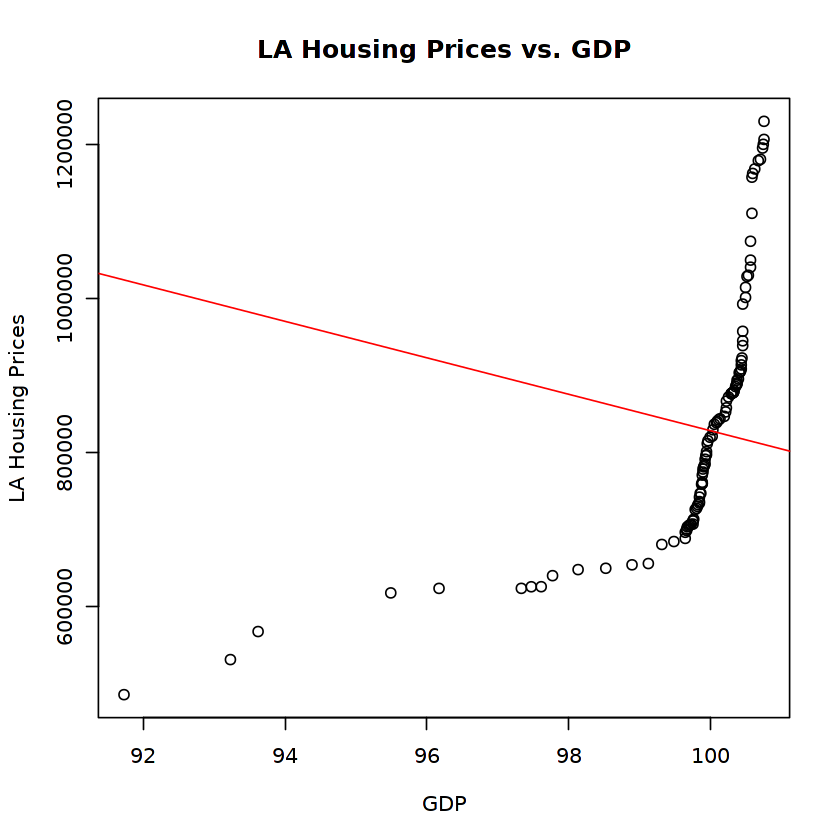

In [45]:
gdp = read.csv("GDP.csv")
gdp.ts = ts(gdp$GDP, start = c(2013, 1), frequency = 12)

autoplot(gdp.ts)

gdp.train.ts = window(gdp.ts, end = c(2020, 12))
gdp.test.ts = window(gdp.ts, end = c(2020, 12))

newdata = ts.intersect(lahousing = lahousing.ts, sp500 = sp500.ts, gdp = gdp.ts)

library(ggplot2)
qqplot(newdata[, 1], newdata[, 3])

lahousing.ts = newdata[, 'lahousing']
sp500.ts = newdata[, 'sp500']
gdp.ts = newdata[, 'gdp']

cor(gdp.ts, lahousing.ts) # correlation = -0.216

m3 = tslm(lahousing.ts ~ gdp.ts, data = newdata)
qqplot(gdp.ts, lahousing.ts, main = "LA Housing Prices vs. GDP",
     xlab = "GDP",
     ylab = "LA Housing Prices")
abline(m3, col = "red")
summary(m3)

## ARIMA with S&P500

From the linear regression analysis we conducted on S&P 500 data, we saw that S&P 500 was a good predictor but GDP was not. We elected to emit the GDP variable and decided to run our ARIMA model on the S&P 500 data. 


Call:
lm(formula = lahousing.train.ts ~ trend + sp500.train.ts, na.action = NULL)

Residuals:
    Min      1Q  Median      3Q     Max 
-116791  -12297    4265   19140   60944 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -5.407e+07  1.024e+07  -5.279 8.47e-07 ***
trend           2.709e+04  5.104e+03   5.308 7.50e-07 ***
sp500.train.ts  9.429e+01  2.242e+01   4.206 5.98e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30260 on 93 degrees of freedom
Multiple R-squared:  0.933,	Adjusted R-squared:  0.9316 
F-statistic: 647.7 on 2 and 93 DF,  p-value: < 2.2e-16


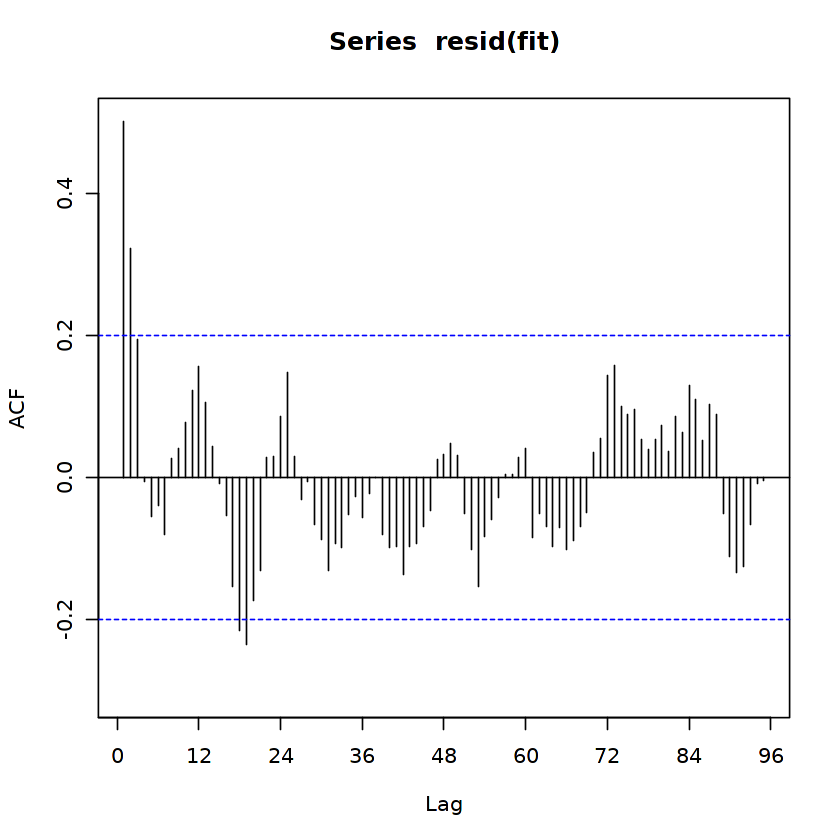

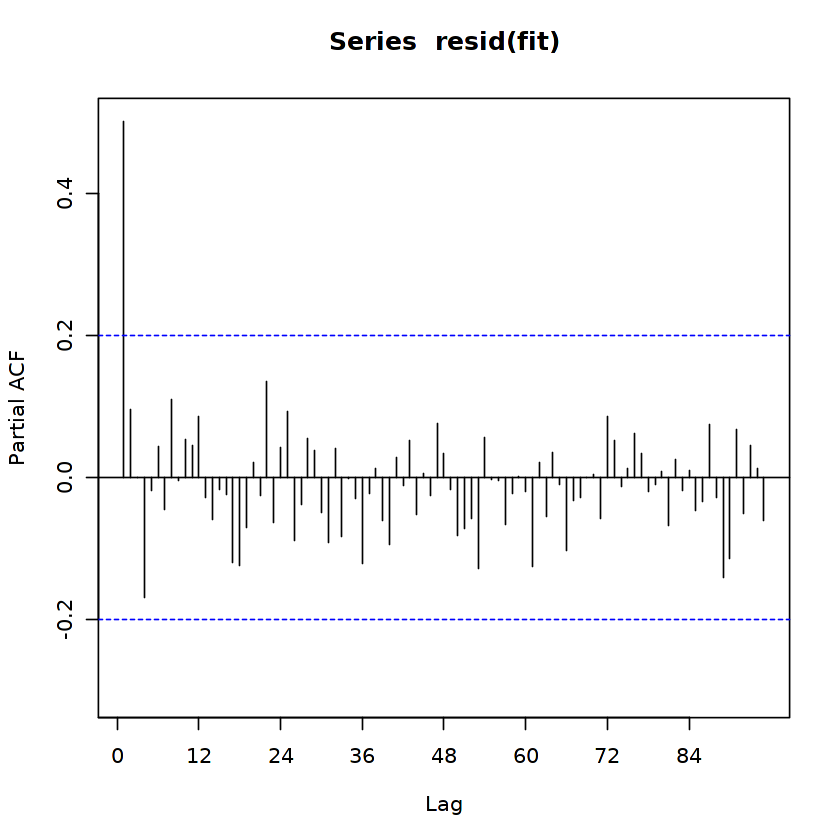

In [46]:
trend = time(lahousing.train.ts)
summary(fit <- lm(lahousing.train.ts ~ trend + sp500.train.ts, na.action = NULL))

Acf(resid(fit), lag.max = 100)
Pacf(resid(fit), 100)

In [47]:
sp500.train.lag1 = diff(sp500.train.ts, lag = 1)
lahousing.train.lag1 = diff(lahousing.train.ts, lag = 1)
lahousing.test.lag1 = diff(lahousing.test.ts, lag = 1)

In [48]:
m5 = Arima(lahousing.train.ts, order = c(1, 0, 0),
           seasonal = list(order = c(1, 0, 1), period = 12),
           xreg = cbind(sp500.train.ts))

arima.pred2 = forecast(m5, h = 12, level = 0,
                       xreg = cbind(sp500.train.ts))

accuracy(arima.pred2, lahousing.test.ts)

ME        RMSE      MAE       MPE      MAPE      MASE     
Training set   4692.25  25935.46  20044.06  0.57091  2.551496 0.3727032
Test set     133260.80 146373.76 136751.53 11.27007 11.621757 2.5427846
             ACF1       Theil's U
Training set -0.2724930       NA 
Test set      0.4184777 3.139661

initial  value 10.163006 
iter   2 value 10.146577
iter   3 value 10.141630
iter   4 value 10.141608
iter   4 value 10.141608
iter   4 value 10.141608
final  value 10.141608 
converged
initial  value 10.151868 
iter   2 value 10.151831
iter   3 value 10.151825
iter   4 value 10.151824
iter   4 value 10.151824
iter   4 value 10.151824
final  value 10.151824 
converged


ERROR: Error in ets(object, lambda = lambda, biasadj = biasadj, allow.multiplicative.trend = allow.multiplicative.trend, : y should be a univariate time series


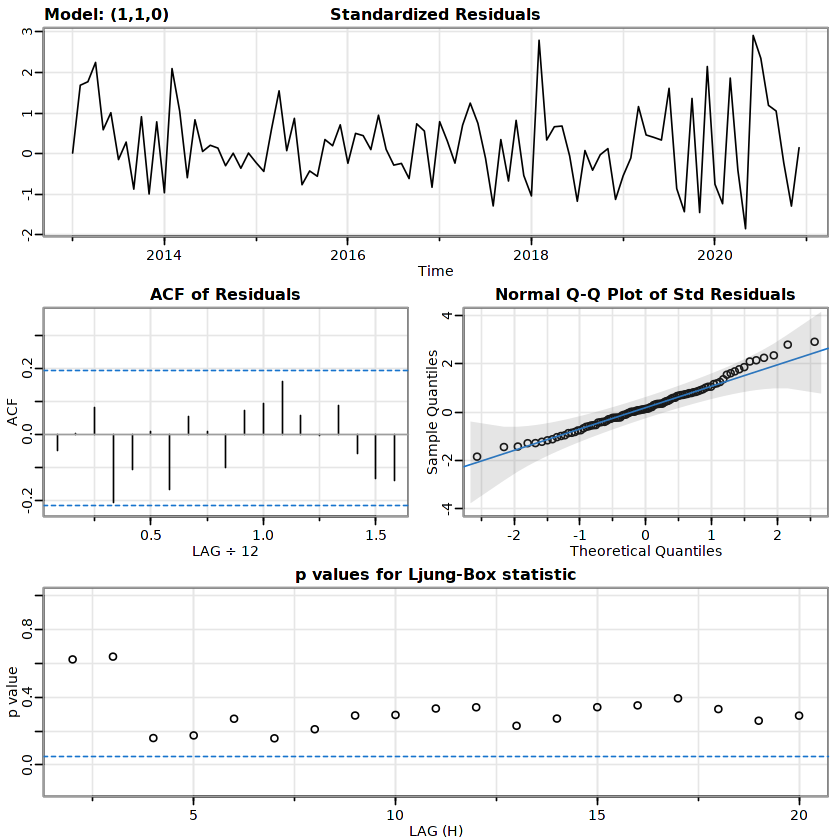

In [49]:
m31 = sarima(lahousing.train.ts, 1,1,0, xreg=cbind(sp500.train.ts))

arima.pred31 = forecast(m31, h = 12, level = 0)

# accuracy(arima.pred31, lahousing.test.ts)                     


	Ljung-Box test

data:  Residuals from Regression with ARIMA(1,0,0)(1,0,1)[12] errors
Q* = 23.769, df = 16, p-value = 0.09467

Model df: 3.   Total lags used: 19



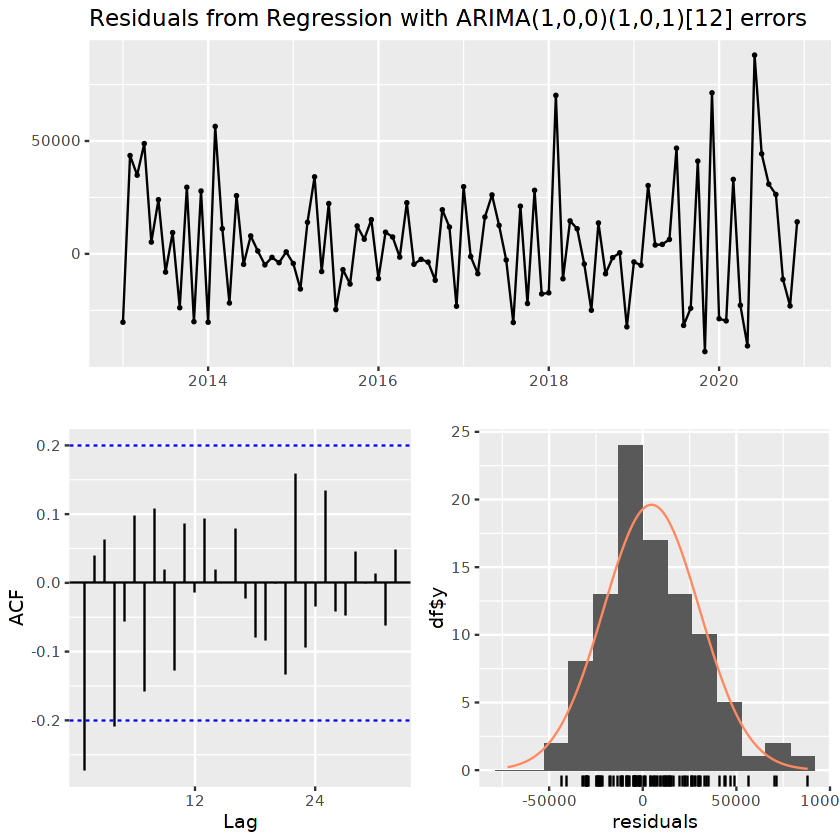

In [50]:
checkresiduals(m5)


Call:
lm(formula = lahousing.train.ts ~ trend + sp500.train.ts, na.action = NULL)

Residuals:
    Min      1Q  Median      3Q     Max 
-116791  -12297    4265   19140   60944 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -5.407e+07  1.024e+07  -5.279 8.47e-07 ***
trend           2.709e+04  5.104e+03   5.308 7.50e-07 ***
sp500.train.ts  9.429e+01  2.242e+01   4.206 5.98e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30260 on 93 degrees of freedom
Multiple R-squared:  0.933,	Adjusted R-squared:  0.9316 
F-statistic: 647.7 on 2 and 93 DF,  p-value: < 2.2e-16


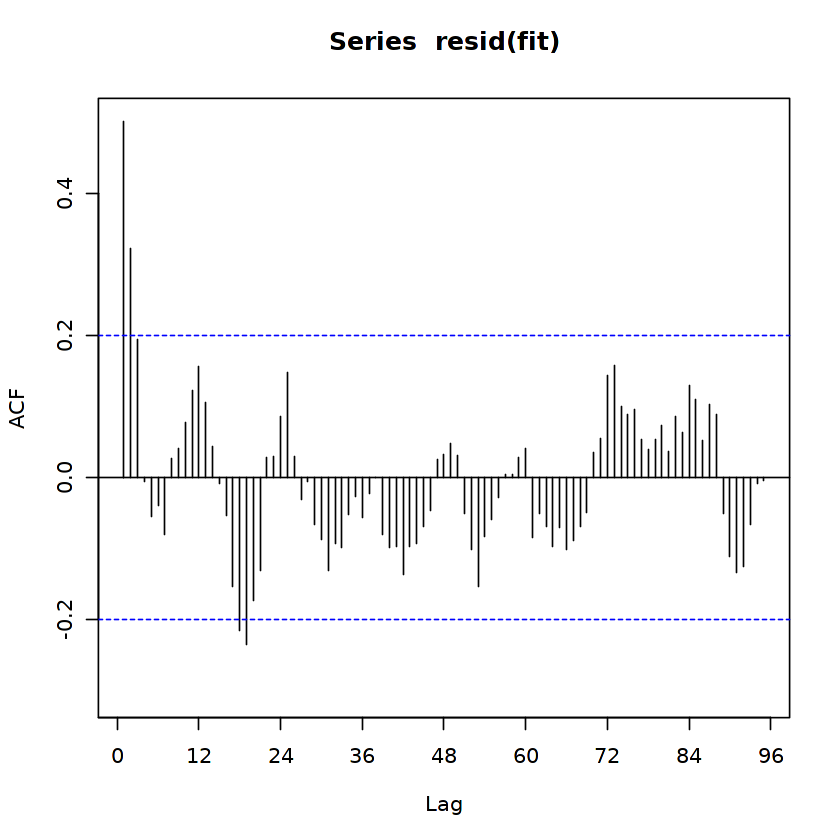

ME         RMSE      MAE       MPE        MAPE     MASE     
Training set   6815.745  25127.78  19446.58  0.8821397  2.46819 0.3615936
Test set     195863.795 204364.47 195863.79 16.7228720 16.72287 3.6419295
             ACF1        Theil's U
Training set -0.06120543       NA 
Test set      0.41304091 4.395238

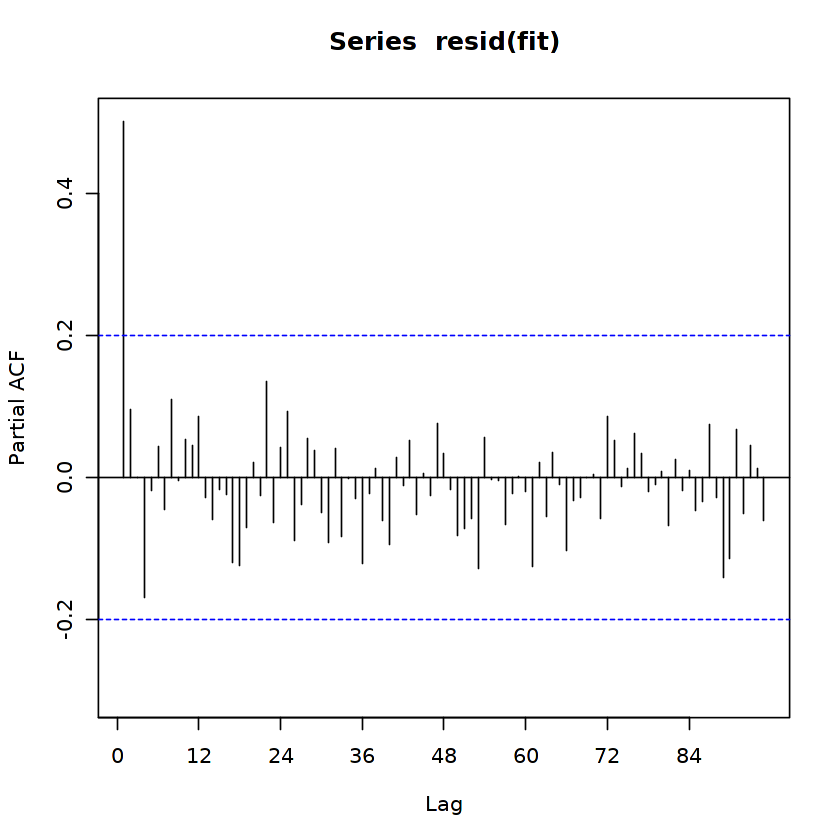

In [51]:
trend = time(lahousing.train.ts)
summary(fit <- lm(lahousing.train.ts ~ trend + sp500.train.ts, na.action = NULL))

Acf(resid(fit), lag.max = 100)
Pacf(resid(fit), 100)

m7 = Arima(lahousing.train.ts, order = c(1, 1, 0),
           seasonal = list(order = c(1, 0, 1), period = 4),
           xreg = cbind(sp500.train.ts))

arima.pred3 = forecast(m7, h = 4, level = 0,
                       xreg = cbind(sp500.train.ts))

accuracy(arima.pred3, lahousing.test.ts)


	Ljung-Box test

data:  Residuals from Regression with ARIMA(1,1,0)(1,0,1)[4] errors
Q* = 18.188, df = 16, p-value = 0.313

Model df: 3.   Total lags used: 19



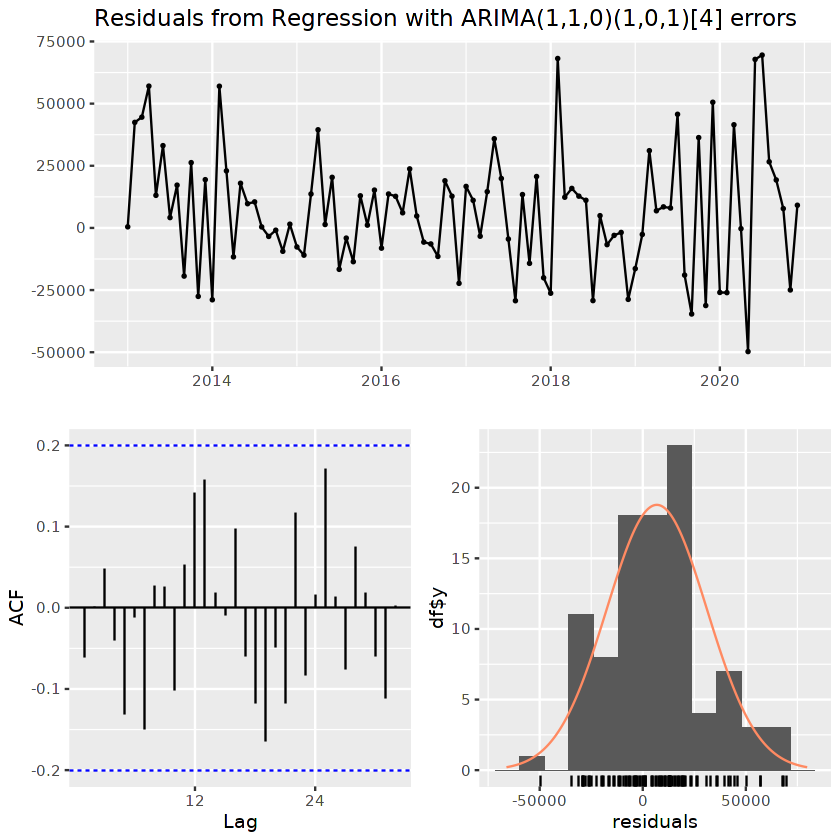

In [52]:
checkresiduals(m7)

## Best Model: ARIMA(1, 1, 0) x (1, 0, 1) 4

In [53]:
la.final.model = Arima(lahousing.ts,
           order = c(1, 1, 0),
           seasonal = list(order = c(1,0,1), period = 4))

la.arima.pred.final = forecast(la.final.model, h = 4, level = 0)

In [54]:
la.arima.pred.final

         Point Forecast    Lo 0    Hi 0
Jan 2022        1228919 1228919 1228919
Feb 2022        1221467 1221467 1221467
Mar 2022        1214440 1214440 1214440
Apr 2022        1198674 1198674 1198674

In [55]:
lahousing2022 = read.csv("LAhousing2022.csv")
lahousing2022.ts = ts(lahousing2022$Price, start = c(2022, 1), frequency = 12)

In [56]:
la.final.model2 = Arima(lahousing.ts,
           order = c(1, 1, 0),
           seasonal = list(order = c(1,0,1), period = 12))

la.arima.pred.final2 = forecast(la.final.model2, h = 11, level = 0)

la.arima.pred.final2

         Point Forecast    Lo 0    Hi 0
Jan 2022        1206693 1206693 1206693
Feb 2022        1228913 1228913 1228913
Mar 2022        1241188 1241188 1241188
Apr 2022        1255378 1255378 1255378
May 2022        1258971 1258971 1258971
Jun 2022        1272986 1272986 1272986
Jul 2022        1272893 1272893 1272893
Aug 2022        1272311 1272311 1272311
Sep 2022        1264272 1264272 1264272
Oct 2022        1270727 1270727 1270727
Nov 2022        1266251 1266251 1266251

In [57]:
accuracy(la.arima.pred.final2, lahousing2022.ts)

ME         RMSE     MAE      MPE        MAPE     MASE     
Training set   4639.034 25728.68 19151.59  0.5336791 2.279089 0.2723225
Test set     -21657.889 55129.61 45091.60 -1.8932231 3.716285 0.6411718
             ACF1         Theil's U
Training set 0.0003602269       NA 
Test set     0.7931853260 1.851995

In [58]:
accuracy(la.arima.pred.final, lahousing2022.ts)

ME        RMSE     MAE      MPE       MAPE     MASE     
Training set  8465.339 27648.51 21530.73 0.9948279 2.575311 0.3061523
Test set     34204.111 52109.29 41766.37 2.6658075 3.288834 0.5938893
             ACF1        Theil's U
Training set -0.05312621       NA 
Test set      0.29177305 2.230788

In [59]:
la.final.model = Arima(lahousing.ts,
           order = c(1, 1, 0),
           seasonal = list(order = c(1,0,1), period = 12))

la.arima.pred.final1 = forecast(la.final.model, h = 12, level = 0)

la.arima.pred.final1

         Point Forecast    Lo 0    Hi 0
Jan 2022        1206693 1206693 1206693
Feb 2022        1228913 1228913 1228913
Mar 2022        1241188 1241188 1241188
Apr 2022        1255378 1255378 1255378
May 2022        1258971 1258971 1258971
Jun 2022        1272986 1272986 1272986
Jul 2022        1272893 1272893 1272893
Aug 2022        1272311 1272311 1272311
Sep 2022        1264272 1264272 1264272
Oct 2022        1270727 1270727 1270727
Nov 2022        1266251 1266251 1266251
Dec 2022        1275830 1275830 1275830

In [60]:
accuracy(la.arima.pred.final1, lahousing2022.ts)

ME         RMSE     MAE      MPE        MAPE     MASE     
Training set   4639.034 25728.68 19151.59  0.5336791 2.279089 0.2723225
Test set     -30535.834 64462.86 52016.73 -2.6663035 4.337444 0.7396425
             ACF1         Theil's U
Training set 0.0003602269       NA 
Test set     0.6445767392 1.842462

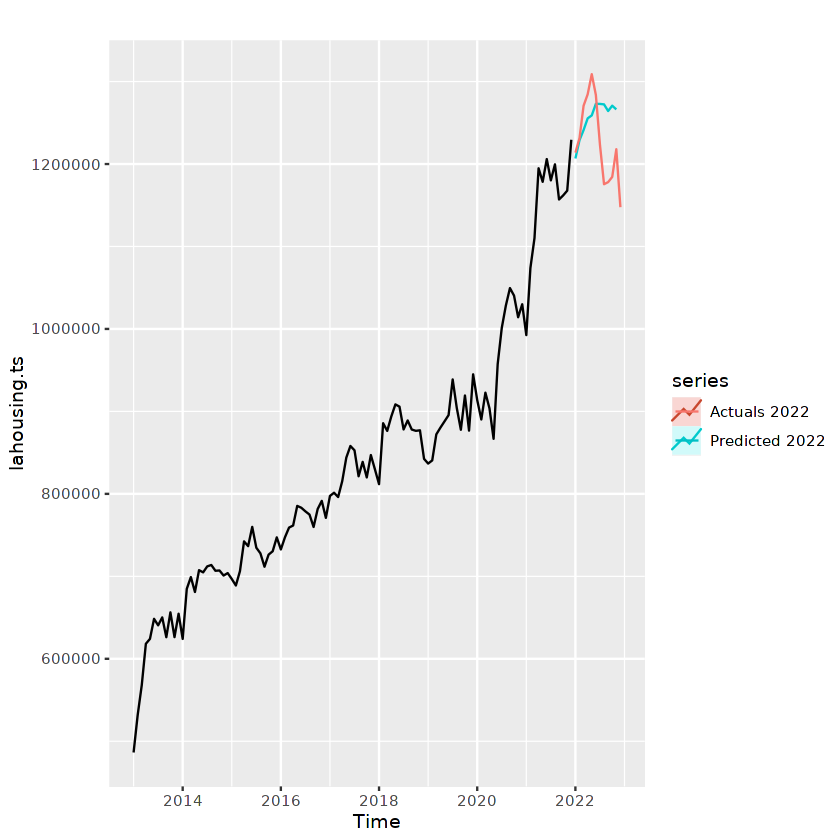

In [62]:
autoplot(lahousing.ts) + 
autolayer(la.arima.pred.final2, series = "Predicted 2022") + 
autolayer(lahousing2022.ts, series = "Actuals 2022")

# SD Data

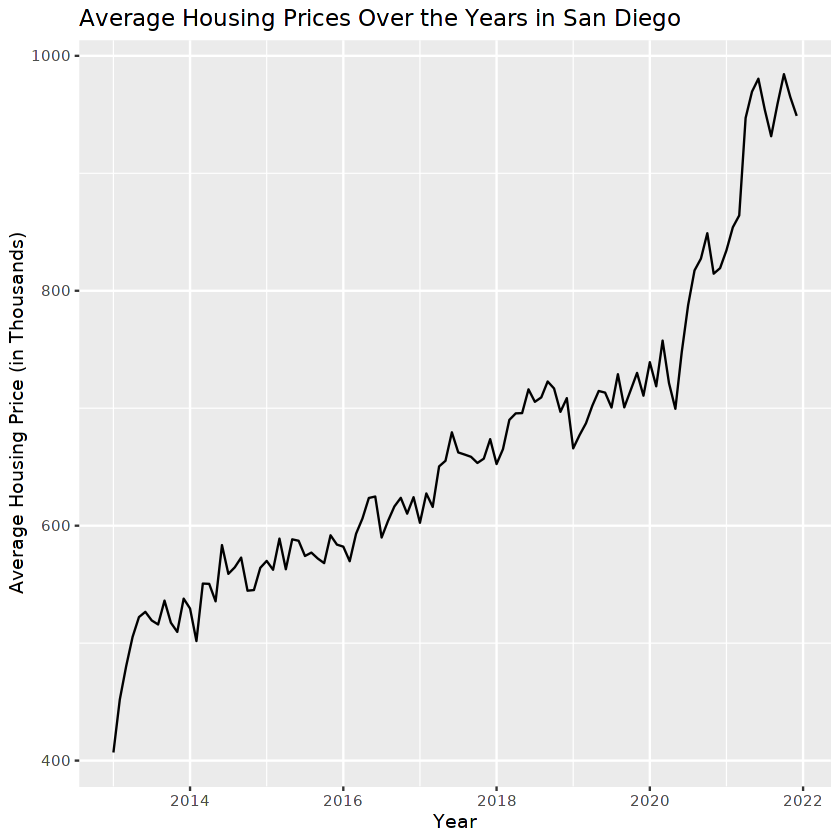

In [91]:
library(data.table)
library(forecast)
library(tseries)

sdhousing = read.csv("SDHousingPrices.csv")
sdhousing.ts = ts(sdhousing$Average.Sale.Price, start = c(2013, 1), frequency = 12)

autoplot(sdhousing.ts/1000, main = "Average Housing Prices Over the Years in San Diego", xlab = "Year", ylab = "Average Housing Price (in Thousands)")

sdhousing.train.ts = window(sdhousing.ts, end = c(2020, 12))
sdhousing.test.ts = window(sdhousing.ts, start = c(2021, 01))

## Naive Forecast

ME         RMSE      MAE       MPE       MAPE      MASE     
Training set   4340.547  20900.89  17027.45  0.678246  2.718713 0.4244402
Test set     113500.250 123866.53 113500.25 11.905564 11.905564 2.8291997
             ACF1       Theil's U
Training set -0.2640842       NA 
Test set      0.6416946 3.801846

ME        RMSE      MAE       MPE       MAPE      MASE    
Training set  38927.94  49069.83  40117.44  5.915608  6.085967 1.000000
Test set     157789.33 166487.43 157789.33 16.787887 16.787887 3.933185
             ACF1      Theil's U
Training set 0.5341884       NA 
Test set     0.5156227 5.141386

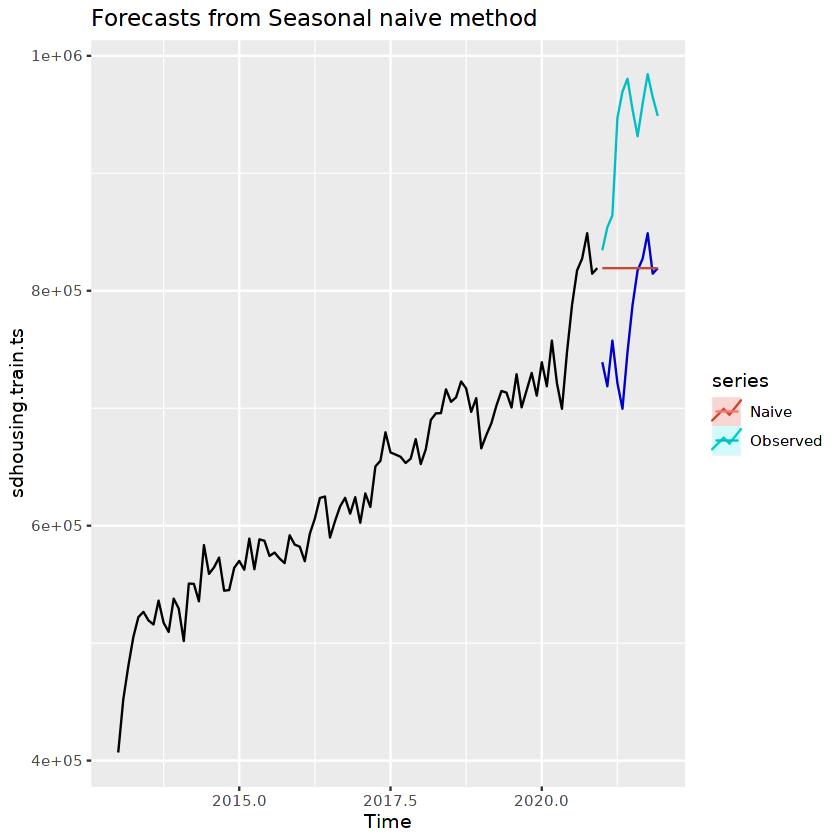


	Ljung-Box test

data:  Residuals from Naive method
Q* = 22.696, df = 19, p-value = 0.251

Model df: 0.   Total lags used: 19



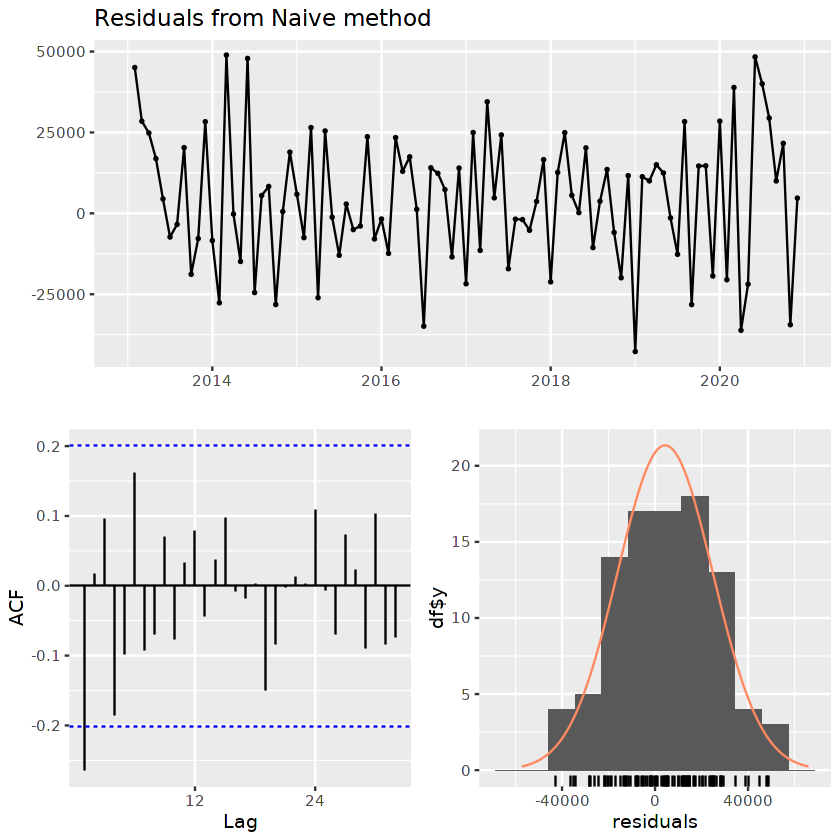


	Ljung-Box test

data:  Residuals from Seasonal naive method
Q* = 107.17, df = 19, p-value = 2.642e-14

Model df: 0.   Total lags used: 19



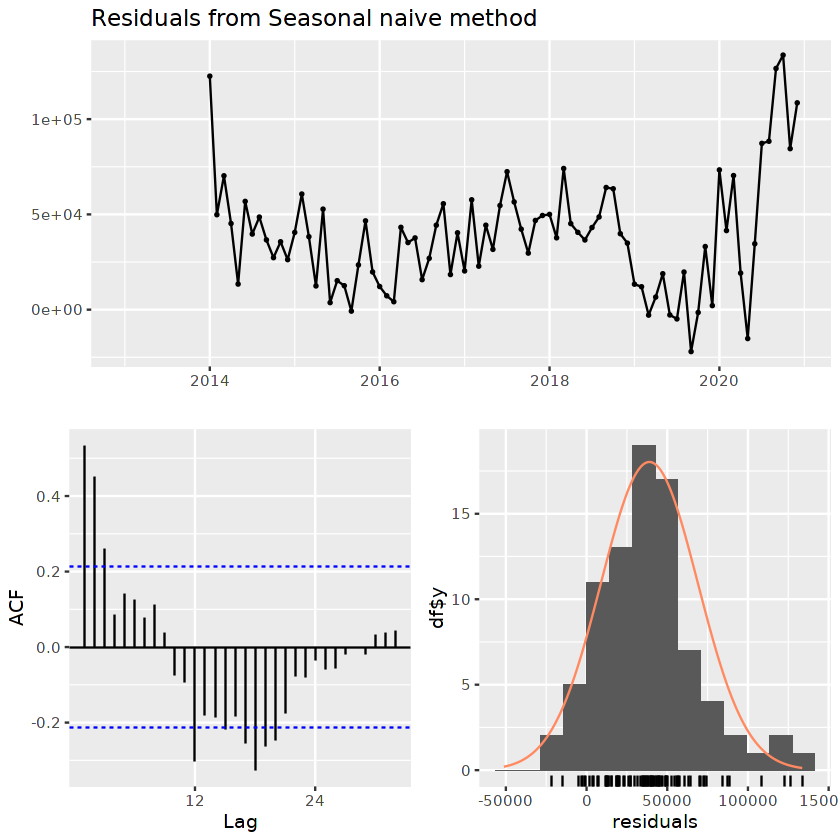

In [ ]:
naive = naive(sdhousing.train.ts,
              h = frequency(sdhousing.train.ts))

seasonal = snaive(sdhousing.train.ts,
       h = frequency(sdhousing.train.ts))

autoplot(seasonal, series = "Seasonal", PI = FALSE) +
  autolayer(naive, series = "Naive", PI = FALSE) +
  autolayer(sdhousing.test.ts, series = "Observed")
  
accuracy(naive, sdhousing.test.ts)
accuracy(seasonal, sdhousing.test.ts)

checkresiduals(naive)
checkresiduals(seasonal)

When comparing accuracies, the Naive forecast has smaller RMSE and MAPE values, thus making it a better model than a seasonal naive forecast. Similar to the LA Data, COVID caused a huge spike in San Diego housing Prices from 2020 to 2022, and thus, a seasonal naive forecase would not accurately show the steep increase in those years.

## Holt's Winter Model with Automatically Selected Components

ME          RMSE      MAE       MPE         MAPE      MASE    
Training set    649.9537  20093.67  16403.86 -0.05310292  2.656416 0.408896
Test set     109119.1508 119393.90 109119.15 11.44151802 11.441518 2.719993
             ACF1         Theil's U
Training set -0.001545393       NA 
Test set      0.636548794 3.665311

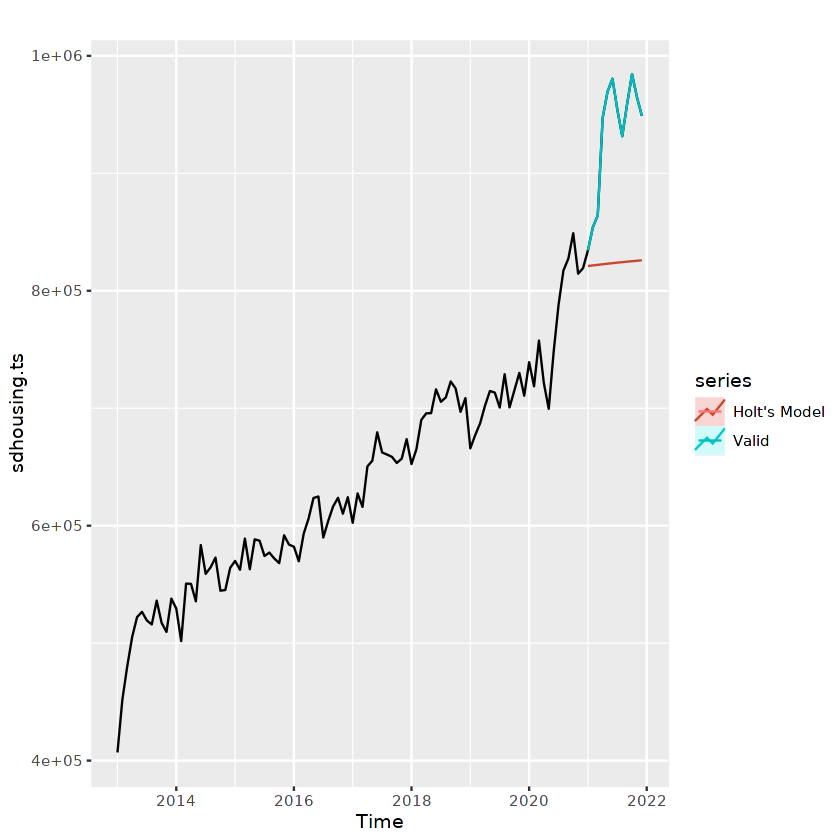


	Ljung-Box test

data:  Residuals from ETS(A,Ad,N)
Q* = 16.519, df = 14, p-value = 0.2827

Model df: 5.   Total lags used: 19



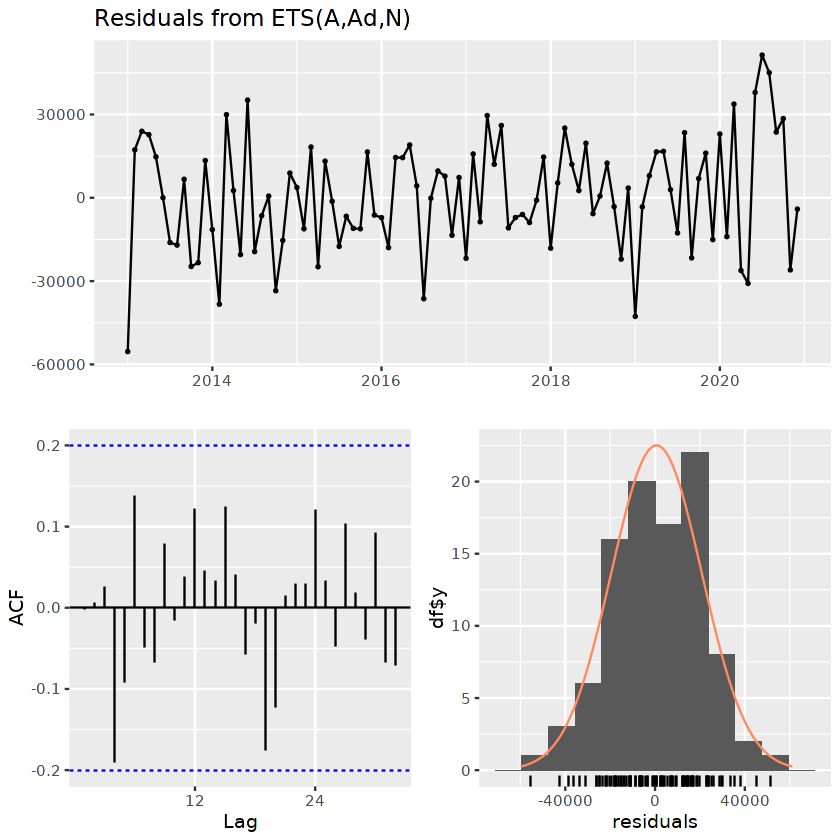

In [ ]:
zzz = ets(sdhousing.train.ts, model="ZZZ")
zzz.pred = forecast(zzz, h = 12, level = 0)

autoplot(sdhousing.ts) +
  autolayer(zzz.pred, series = "Holt's Model") +
  autolayer(sdhousing.test.ts, series = "Valid")

accuracy(zzz.pred, sdhousing.test.ts)

checkresiduals(zzz)

## ARIMA Model

- differenced for trend and seasonality and did a AR[1] model after looking at the ACF and PACF graphs.


	Augmented Dickey-Fuller Test

data:  sdhousing.train.ts
Dickey-Fuller = -3.3084, Lag order = 4, p-value = 0.07427
alternative hypothesis: stationary


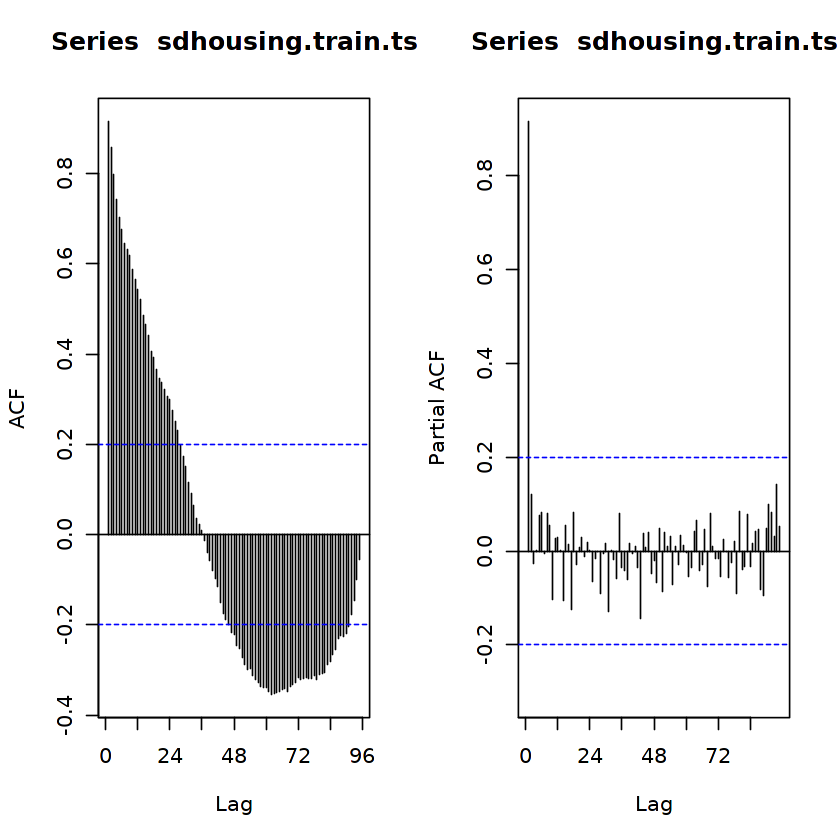

ME         RMSE     MAE      MPE        MAPE     MASE    
Training set  -245.6036 22720.95 16659.45 -0.1464301 2.557845 0.415267
Test set     56227.9939 77162.23 56851.44  5.8691668 5.943879 1.417125
             ACF1         Theil's U
Training set -0.001110207       NA 
Test set      0.522600125 2.409316

Series: sdhousing.train.ts 
ARIMA(1,1,0)(0,1,0)[12] 

Coefficients:
          ar1
      -0.3970
s.e.   0.1061

sigma^2 = 604380173:  log likelihood = -956.47
AIC=1916.94   AICc=1917.09   BIC=1921.78

Training set error measures:
                    ME     RMSE      MAE        MPE     MAPE     MASE
Training set -245.6036 22720.95 16659.45 -0.1464301 2.557845 0.415267
                     ACF1
Training set -0.001110207

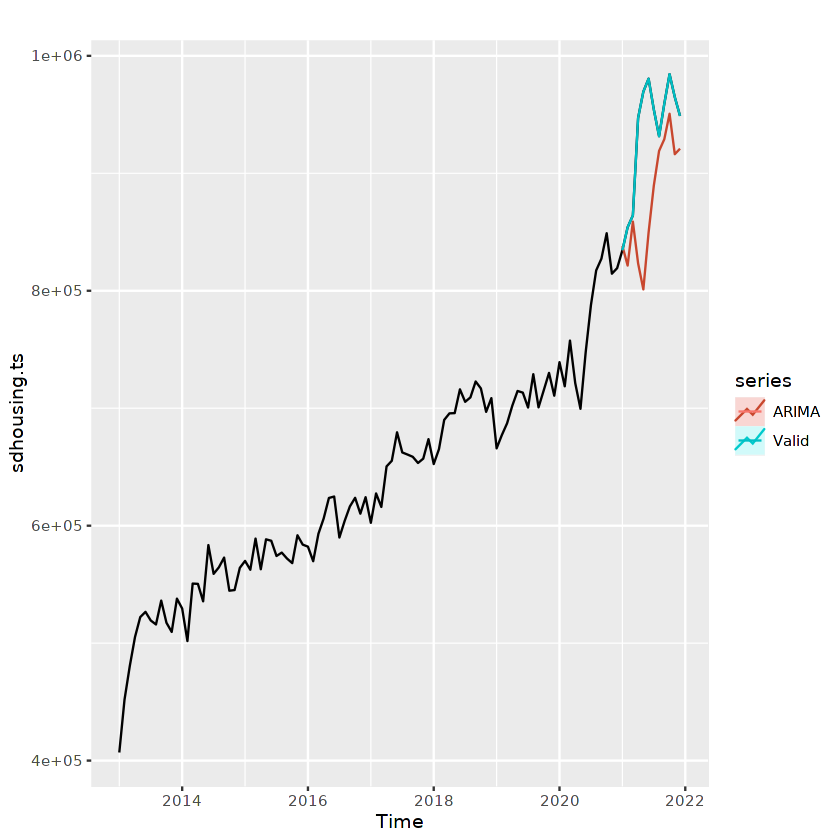


	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)(0,1,0)[12]
Q* = 36.461, df = 18, p-value = 0.006156

Model df: 1.   Total lags used: 19



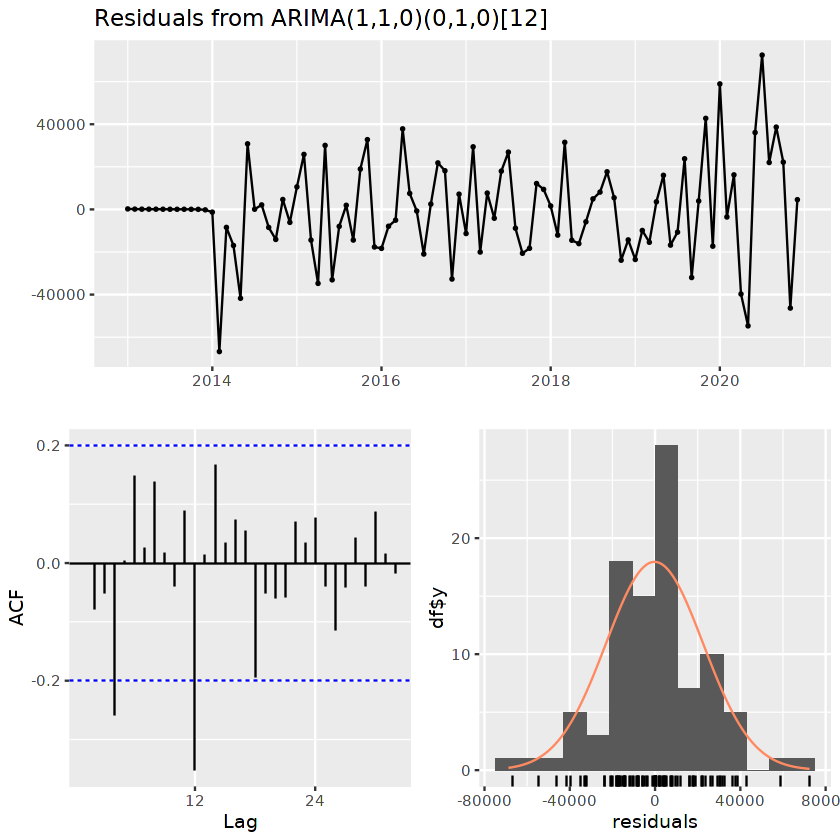

In [ ]:
par(mfrow = c(1, 2))
Acf(sdhousing.train.ts, lag.max = 100)
Pacf(sdhousing.train.ts, lag.max = 100)
par(mfrow = c(1, 1))

adf.test(sdhousing.train.ts)

m1 = Arima(sdhousing.train.ts,
           order = c(1, 1, 0), #previously 1,1,0
           seasonal = list(order = c(0, 1, 0), period = 12)) #previously: 0,1,0; try 1,0,0 and 0,0,1, seasonal naive graph is kind of bad because we introduced seasonality into those graphs

arima.pred = forecast(m1, h = 12, level = 0)

autoplot(sdhousing.ts) +
  autolayer(arima.pred, series = "ARIMA") +
  autolayer(sdhousing.test.ts, series = "Valid")

accuracy(arima.pred, sdhousing.test.ts)
summary(m1)

checkresiduals(m1)

## Neural Network Model

ME          RMSE     MAE      MPE         MAPE     MASE     
Training set    28.05935 14290.34 11464.19 -0.04820124 1.768378 0.2857657
Test set     80242.63241 92039.73 80590.72  8.37914591 8.420861 2.0088701
             ACF1       Theil's U
Training set -0.1500728      NA  
Test set      0.5097806 2.83837

Warning message:
“Removed 12 rows containing missing values (`geom_line()`).”


ME           RMSE      MAE      MPE         MAPE      MASE     
Training set 7.273972e-02  16804.56  13509.3 -0.06832981  2.079544 0.3367439
Test set     1.020763e+05 112392.13 102076.3 10.69382128 10.693821 2.5444363
             ACF1       Theil's U
Training set -0.1720427       NA 
Test set      0.6301224 3.451027

Warning message:
“Removed 12 rows containing missing values (`geom_line()`).”


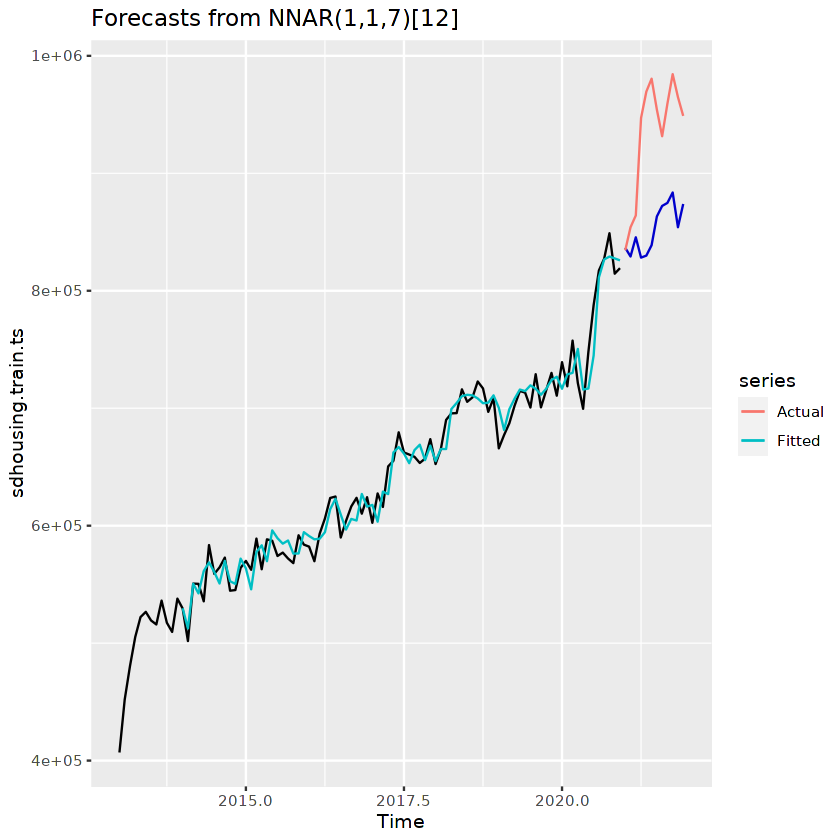

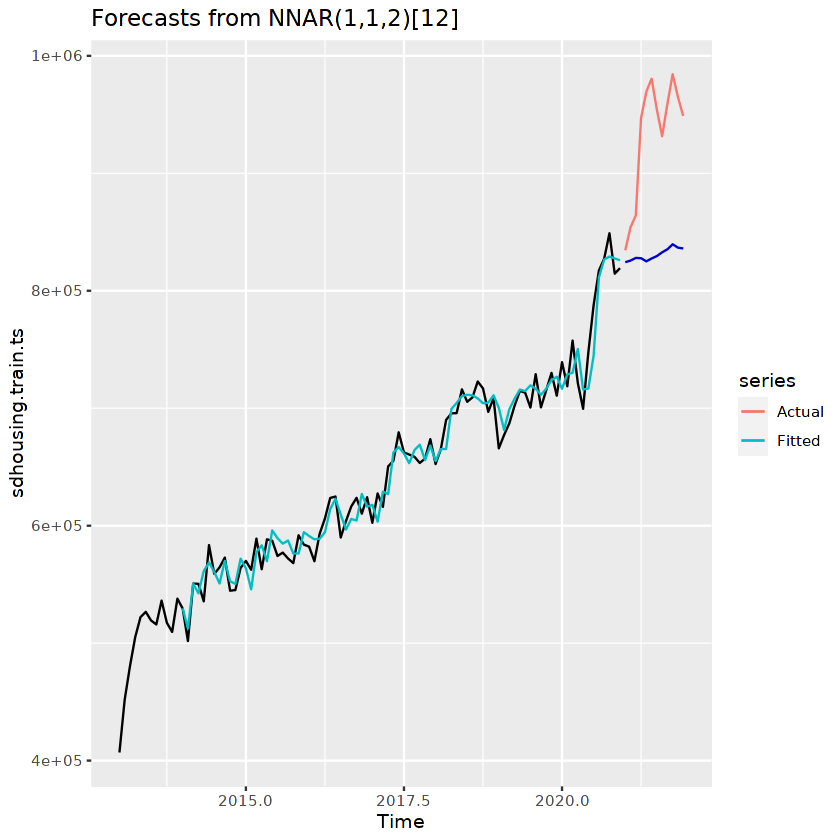

In [ ]:
set.seed(201)

sdhousing.nnetar = nnetar(sdhousing.train.ts, repeats = 20, p = 1, P = 1, size = 7)
sdhousing.nnetar.pred = forecast(sdhousing.nnetar, h = 12)
accuracy(sdhousing.nnetar.pred, sdhousing.test.ts)

autoplot(sdhousing.nnetar.pred) +
  autolayer(sdhousing.nnetar$fitted, series = "Fitted") +
  autolayer(sdhousing.test.ts, series = "Actual")

sdhousing.nnetar.opt = nnetar(sdhousing.train.ts)
sdhousing.nnetar.pred.opt = forecast(sdhousing.nnetar.opt, h = 12)
accuracy(sdhousing.nnetar.pred.opt, sdhousing.test.ts)

autoplot(sdhousing.nnetar.pred.opt) +
  autolayer(sdhousing.nnetar$fitted, series = "Fitted") +
  autolayer(sdhousing.test.ts, series = "Actual")

Warning message in modeldf.default(object):
“Could not find appropriate degrees of freedom for this model.”


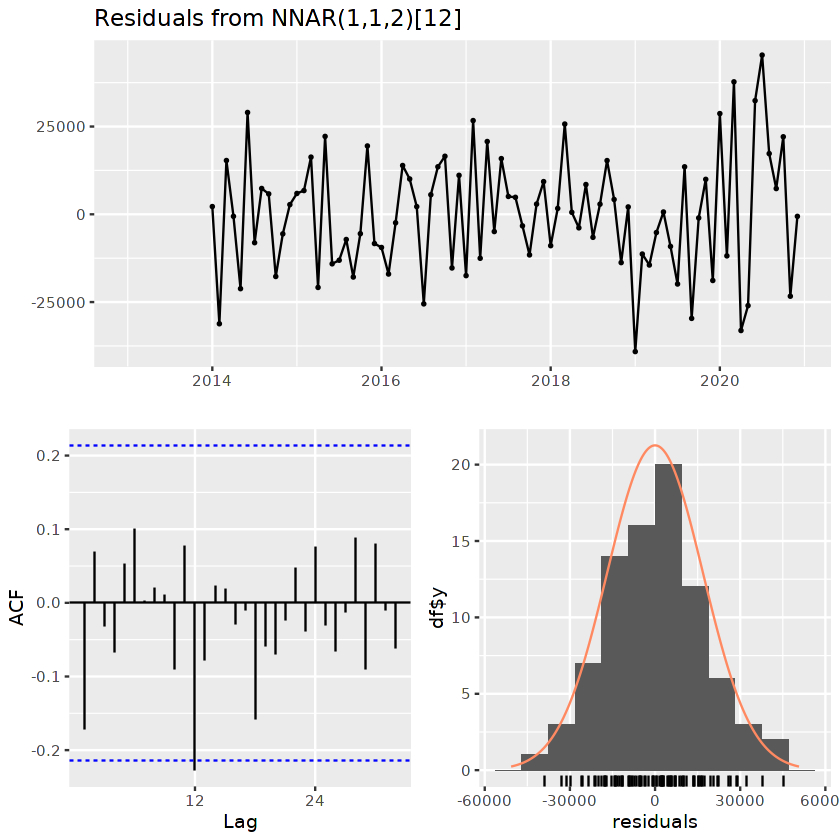

In [ ]:
checkresiduals(sdhousing.nnetar.pred.opt)

## Linear Regression

We looked at both S&P500 and GDP as external factors that would help in predicting housing prices. We first looked at S&P500.

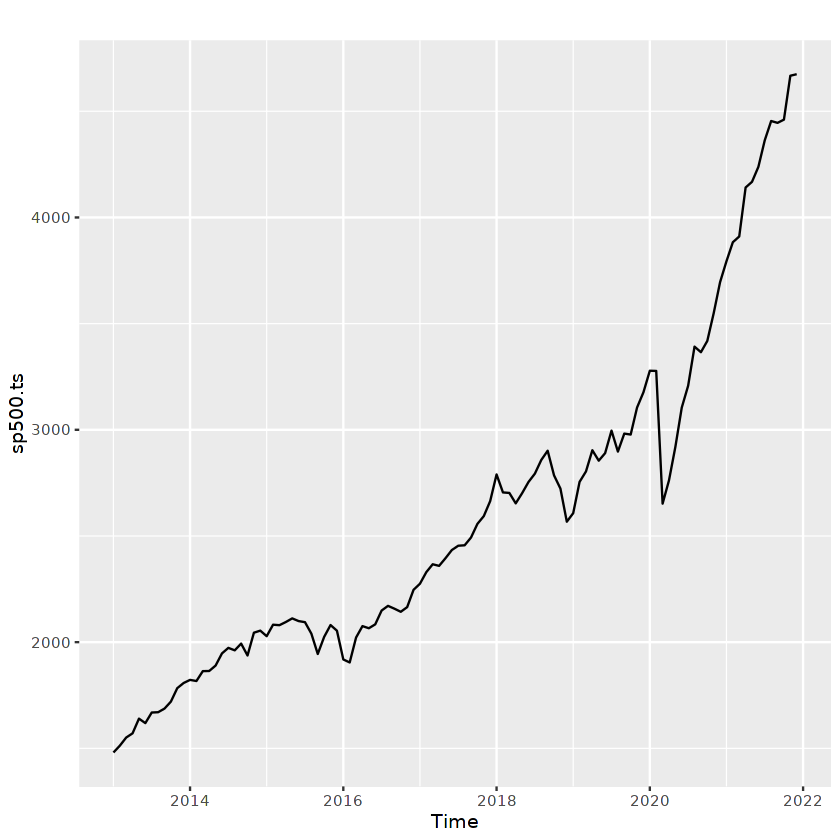

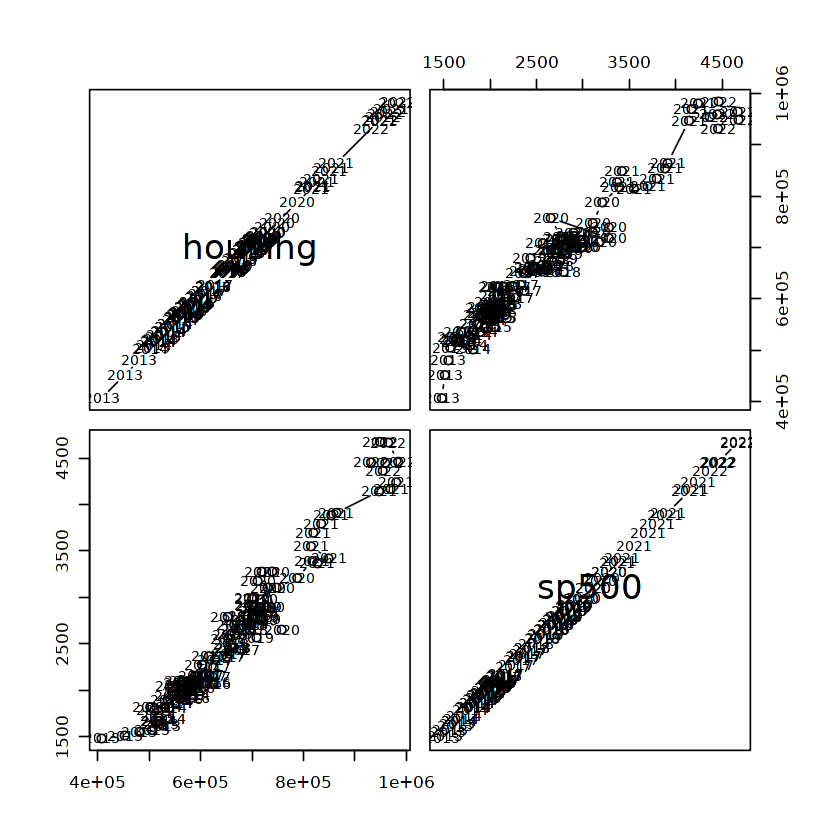

Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct   
2013 406898 451962 480434 505263 522182 526638 519308 515897 536207 517364
2014 529464 501795 550700 550473 535607 583476 558996 564507 572823 544647
2015 570005 562491 588999 562919 588373 587166 574206 577076 572047 568123
2016 582143 569762 593154 606136 623595 624818 589937 604016 616379 623715
2017 602466 627430 615974 650461 655242 679479 662357 660560 658636 653392
2018 652480 665134 690067 695618 695831 716060 705464 709208 722756 716843
2019 665845 677161 687192 702216 714686 713281 700601 728950 700746 715360
2020 739194 718673 757566 721407 699513 747848 787882 817330 827339 848976
2021 834462 854054 864129 947141 969538 980530 954219 931572 959249 984390
     Nov    Dec   
2013 509558 537873
2014 545198 564110
2015 591810 583891
2016 610240 624238
2017 657065 673659
2018 696929 708571
2019 730053 710689
2020 814553 819250
2021 964853 948866

[1] 0.9802608

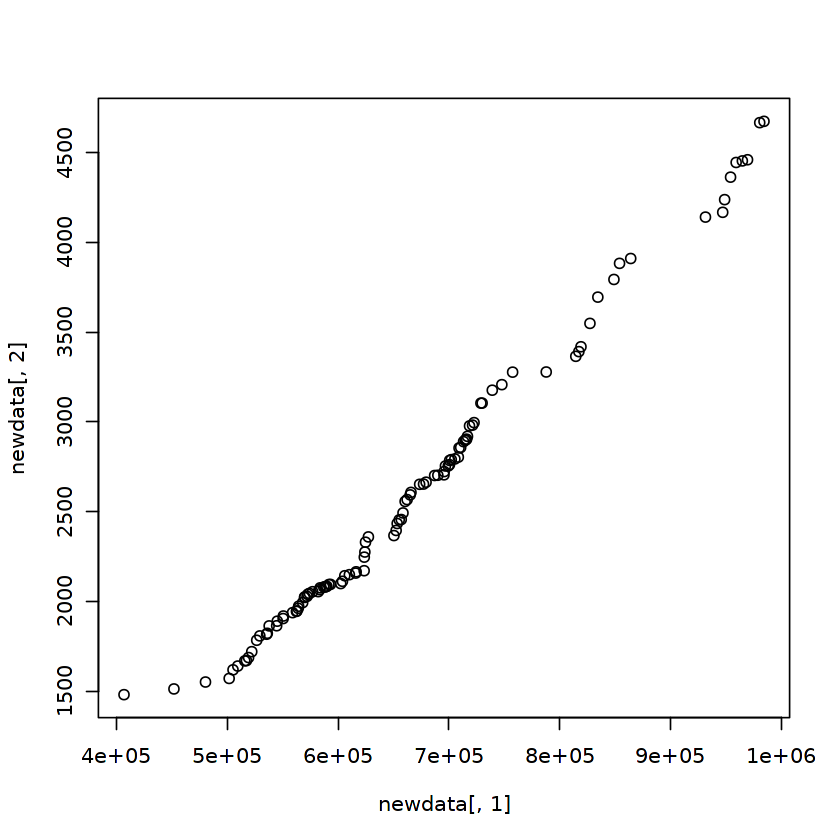


Call:
tslm(formula = sdhousing.ts ~ sp500.ts, data = newdata)

Residuals:
   Min     1Q Median     3Q    Max 
-81302 -14482     75  16087  81605 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.510e+05  8.490e+03   29.57   <2e-16 ***
sp500.ts    1.602e+02  3.138e+00   51.05   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25390 on 106 degrees of freedom
Multiple R-squared:  0.9609,	Adjusted R-squared:  0.9605 
F-statistic:  2606 on 1 and 106 DF,  p-value: < 2.2e-16


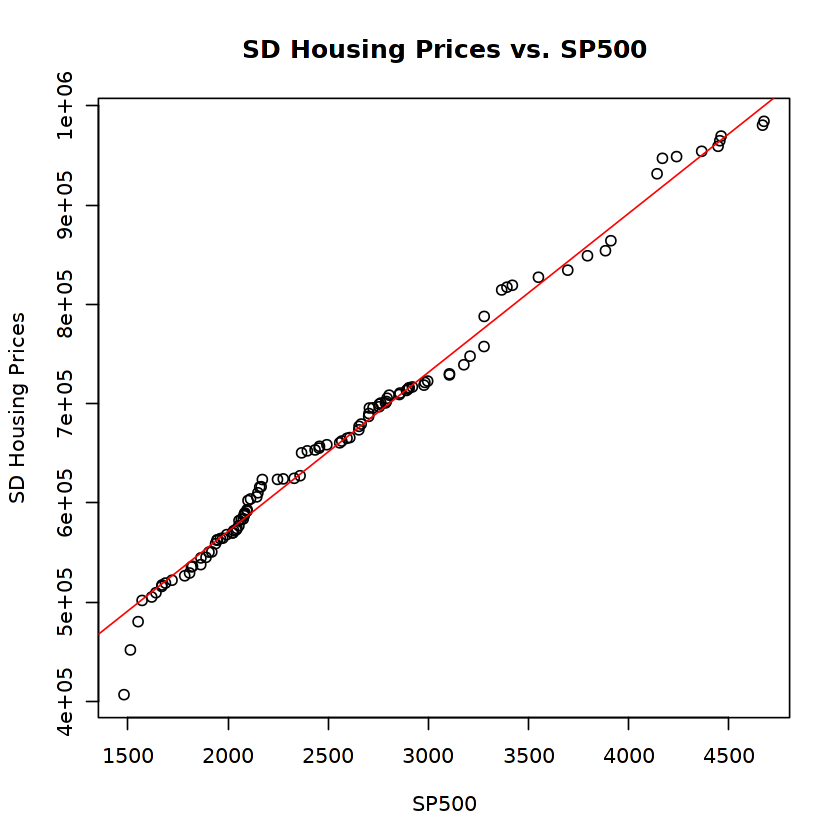

In [93]:
sp500 = read.csv("SP500new.csv")
sp500.ts = ts(sp500$Close, start = c(2013, 1), frequency = 12)

autoplot(sp500.ts)

sp500.train.ts = window(sp500.ts, end = c(2020, 12))
sp500.test.ts = window(sp500.ts, end = c(2020, 12))

newdata = ts.intersect(housing = sdhousing.ts, sp500 = sp500.ts)

pairs(newdata)

library(ggplot2)
qqplot(newdata[, 1], newdata[, 2])

newdata[, 1]

sdhousing.ts = newdata[, 'housing']
sp500.ts = newdata[, 'sp500']

cor(sp500.ts, sdhousing.ts) # correlation = 0.980, about the same as LA's 0.974

m2 = tslm(sdhousing.ts ~ sp500.ts, data = newdata)
qqplot(sp500.ts, sdhousing.ts, main = "SD Housing Prices vs. SP500",
     xlab = "SP500",
     ylab = "SD Housing Prices")
abline(m2, col = "red")
summary(m2)

Checking here to see if a lag would help. It does not help. 

### S&P 500

[1] 0.9791045


Call:
tslm(formula = sdhousing.ts1 ~ sp500.ts1, data = newdata1)

Residuals:
   Min     1Q Median     3Q    Max 
-84744 -18236   -678  16796  68742 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.530e+05  8.680e+03   29.15   <2e-16 ***
sp500.ts1   1.578e+02  3.198e+00   49.34   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25620 on 105 degrees of freedom
Multiple R-squared:  0.9586,	Adjusted R-squared:  0.9583 
F-statistic:  2434 on 1 and 105 DF,  p-value: < 2.2e-16


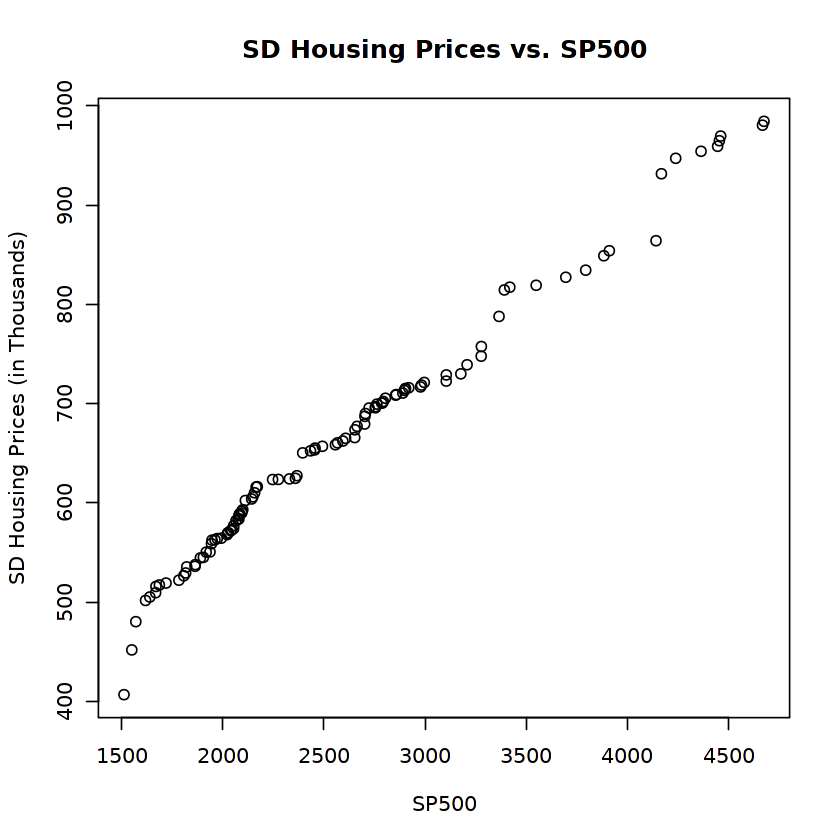

In [92]:
newdata1 = ts.intersect(housing = lag(sdhousing.ts, -1), sp500 = sp500.ts)
sdhousing.ts1 = newdata1[, 'housing']
sp500.ts1 = newdata1[, 'sp500']

cor(sp500.ts1, sdhousing.ts1) # correlation = 0.974

m4 = tslm(sdhousing.ts1 ~ sp500.ts1, data = newdata1)
qqplot(sp500.ts1, sdhousing.ts1/1000, main = "SD Housing Prices vs. SP500",
     xlab = "SP500",
     ylab = "SD Housing Prices (in Thousands)")
abline(m4, col = "red")
summary(m4)

### GDP

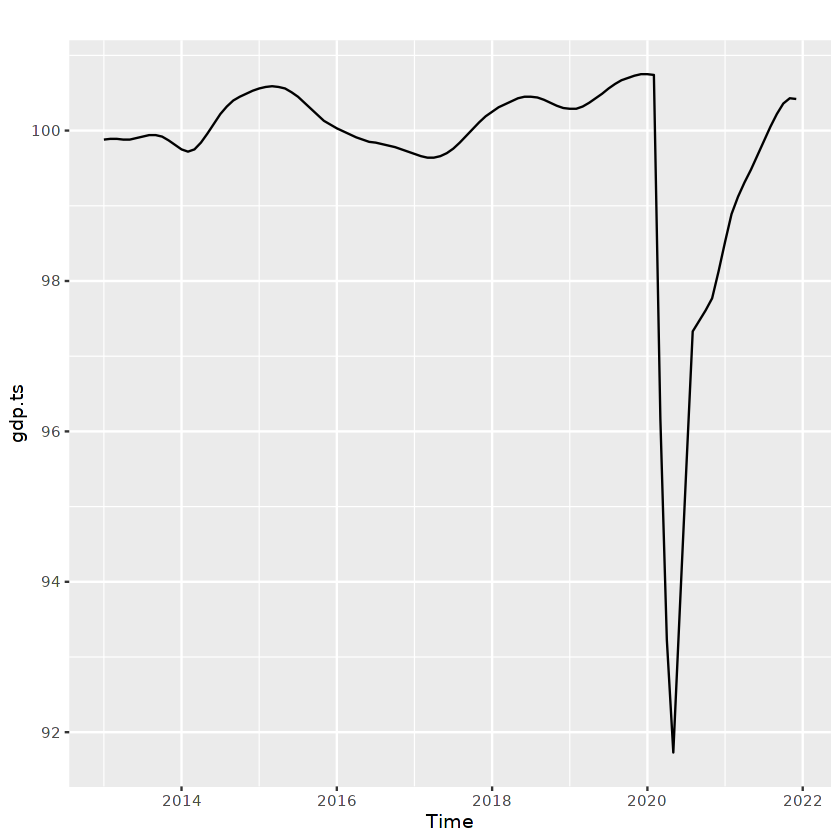

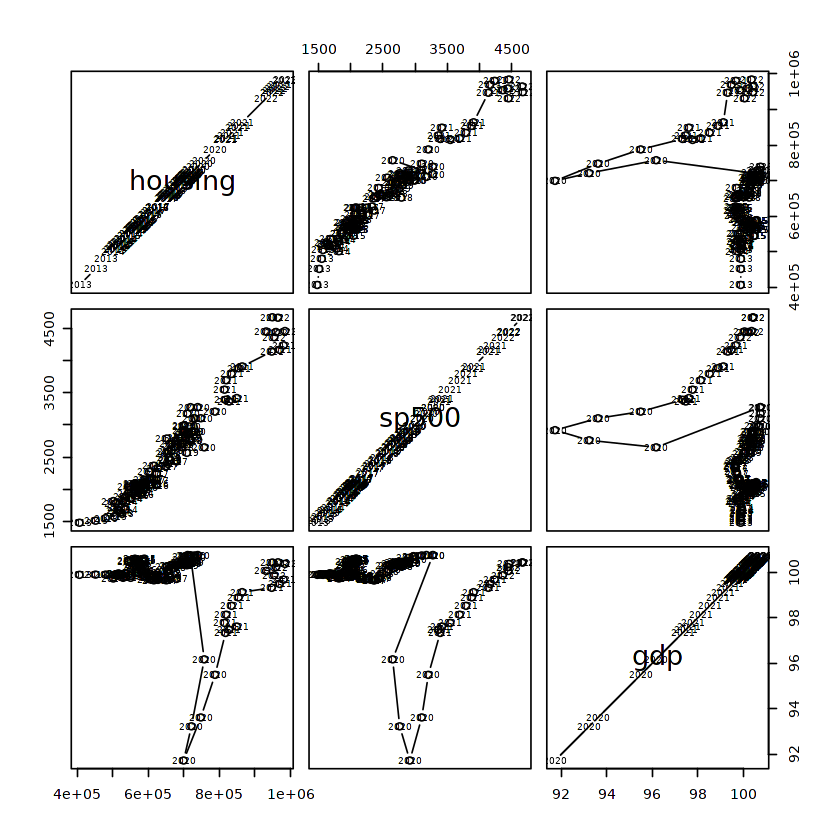

[1] -0.2185593

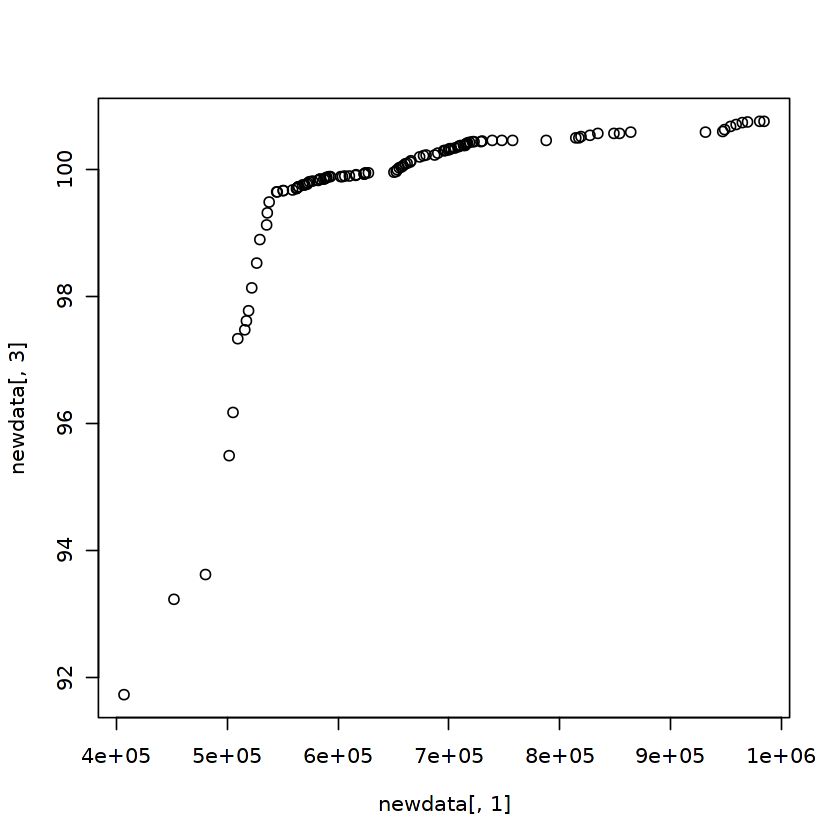


Call:
tslm(formula = sdhousing.ts ~ gdp.ts, data = newdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-255866  -83656  -26157   62319  330864 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  2585005     832244   3.106  0.00243 **
gdp.ts        -19246       8346  -2.306  0.02306 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 125300 on 106 degrees of freedom
Multiple R-squared:  0.04777,	Adjusted R-squared:  0.03878 
F-statistic: 5.317 on 1 and 106 DF,  p-value: 0.02306


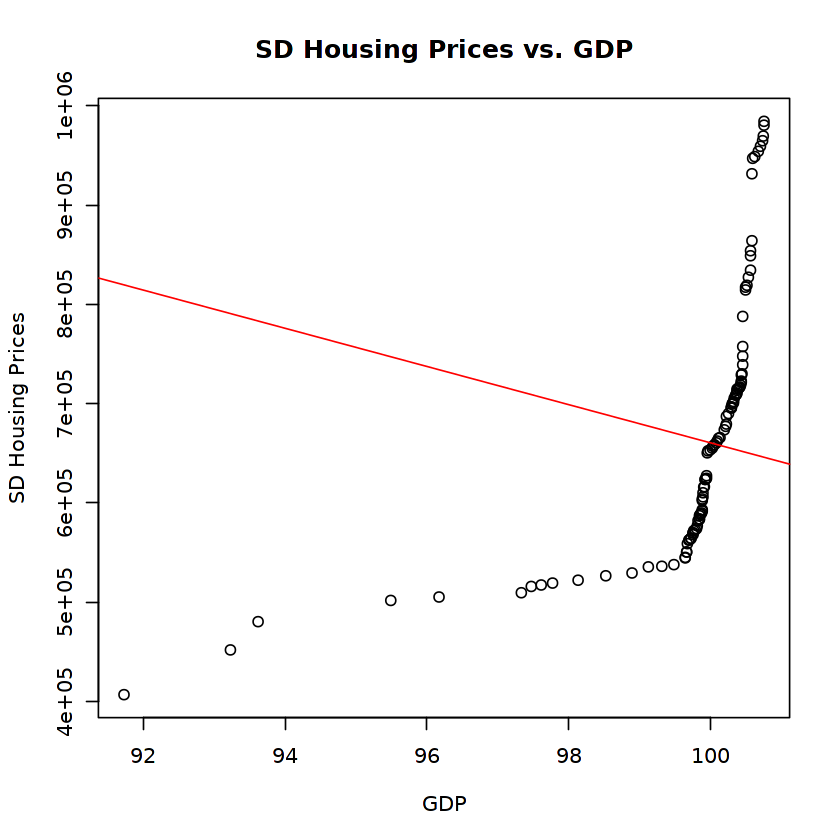

In [94]:
gdp = read.csv("GDP.csv")
gdp.ts = ts(gdp$GDP, start = c(2013, 1), frequency = 12)

autoplot(gdp.ts)

gdp.train.ts = window(gdp.ts, end = c(2020, 12))
gdp.test.ts = window(gdp.ts, end = c(2020, 12))

newdata = ts.intersect(housing = sdhousing.ts, sp500 = sp500.ts, gdp = gdp.ts)

pairs(newdata)

library(ggplot2)
qqplot(newdata[, 1], newdata[, 3])


sdhousing.ts = newdata[, 'housing']
sp500.ts = newdata[, 'sp500']
gdp.ts = newdata[, 'gdp']

cor(gdp.ts, sdhousing.ts) # correlation = -0.219, similar to LA's -0.216

m3 = tslm(sdhousing.ts ~ gdp.ts, data = newdata)
qqplot(gdp.ts, sdhousing.ts, main = "SD Housing Prices vs. GDP",
     xlab = "GDP",
     ylab = "SD Housing Prices")
abline(m3, col = "red")
summary(m3)

## ARIMA with S&P500


Call:
lm(formula = sdhousing.train.ts ~ trend + sp500.train.ts, na.action = NULL)

Residuals:
   Min     1Q Median     3Q    Max 
-76598 -12103   3202  12683  59086 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -3.837e+07  7.240e+06  -5.300 7.77e-07 ***
trend           1.924e+04  3.608e+03   5.333 6.74e-07 ***
sp500.train.ts  8.114e+01  1.585e+01   5.120 1.64e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21390 on 93 degrees of freedom
Multiple R-squared:  0.9439,	Adjusted R-squared:  0.9427 
F-statistic: 781.8 on 2 and 93 DF,  p-value: < 2.2e-16


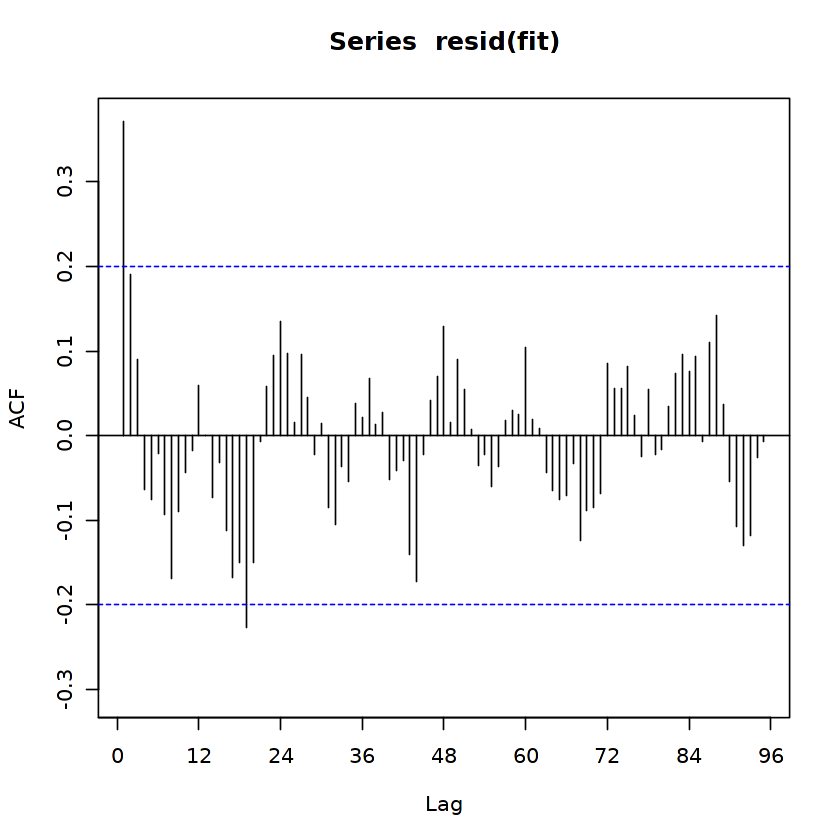

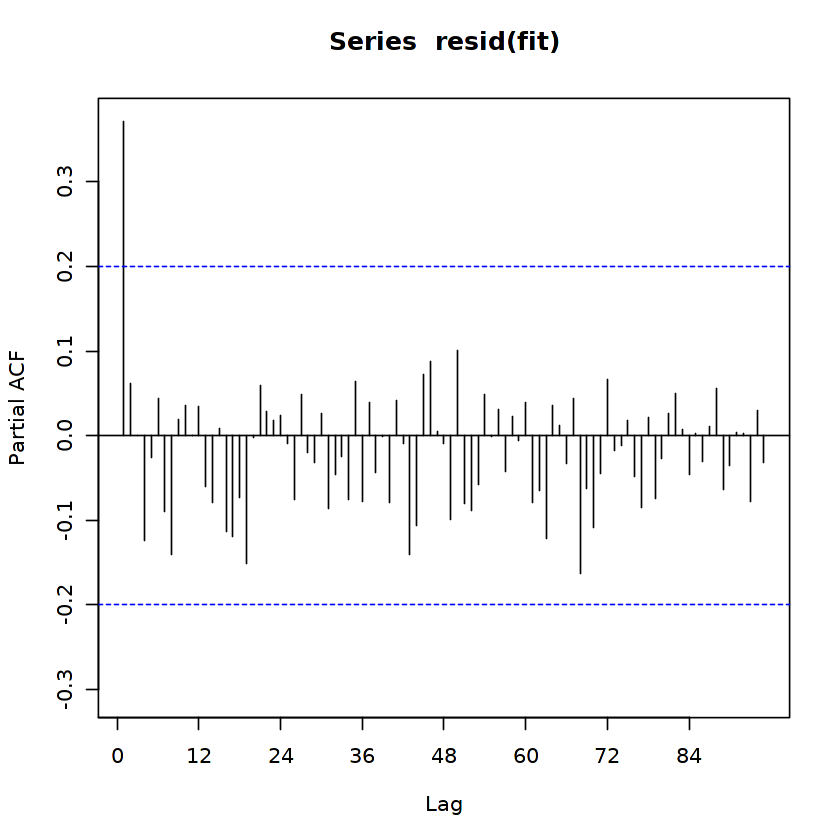

In [ ]:
trend = time(sdhousing.train.ts)
summary(fit <- lm(sdhousing.train.ts ~ trend + sp500.train.ts, na.action = NULL))

Acf(resid(fit), lag.max = 100)
Pacf(resid(fit), 100)

In [ ]:
sp500.train.lag1 = diff(sp500.train.ts, lag = 1)
sdhousing.train.lag1 = diff(sdhousing.train.ts, lag = 1)
sdhousing.test.lag1 = diff(sdhousing.test.ts, lag = 1)

In [ ]:
m5 = Arima(sdhousing.train.ts, order = c(1, 0, 0),
           seasonal = list(order = c(1, 0, 1), period = 12),
           xreg = cbind(sp500.train.ts))

arima.pred2 = forecast(m5, h = 12, level = 0,
                       xreg = cbind(sp500.train.ts))

accuracy(arima.pred2, sdhousing.test.ts)

ME        RMSE      MAE       MPE         MAPE      MASE      
Training set   1172.33  21151.82  15205.98  0.04670013  2.430677  0.3790366
Test set     418276.72 419639.78 418276.72 44.78342479 44.783425 10.4263062
             ACF1        Theil's U
Training set -0.07173286       NA 
Test set      0.51752906 12.70711


	Ljung-Box test

data:  Residuals from Regression with ARIMA(1,0,0)(1,0,1)[12] errors
Q* = 6.0157, df = 16, p-value = 0.9879

Model df: 3.   Total lags used: 19



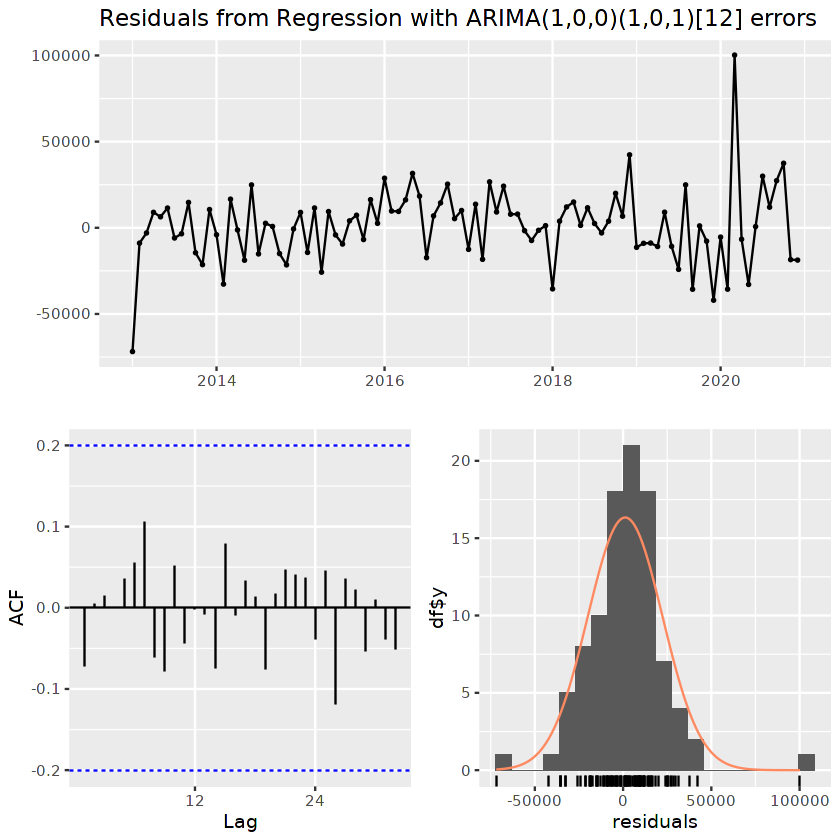

In [ ]:
checkresiduals(m5)


Call:
lm(formula = sdhousing.train.ts ~ trend + sp500.train.ts, na.action = NULL)

Residuals:
   Min     1Q Median     3Q    Max 
-76598 -12103   3202  12683  59086 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -3.837e+07  7.240e+06  -5.300 7.77e-07 ***
trend           1.924e+04  3.608e+03   5.333 6.74e-07 ***
sp500.train.ts  8.114e+01  1.585e+01   5.120 1.64e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21390 on 93 degrees of freedom
Multiple R-squared:  0.9439,	Adjusted R-squared:  0.9427 
F-statistic: 781.8 on 2 and 93 DF,  p-value: < 2.2e-16


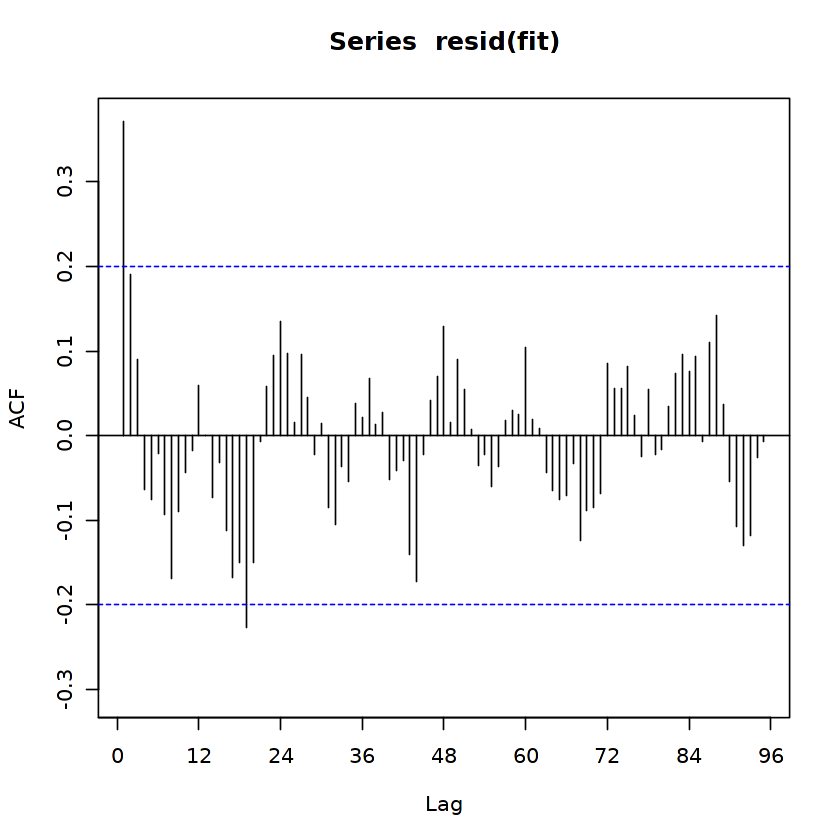

ME         RMSE      MAE      MPE        MAPE      MASE     
Training set   5954.288  19931.29  15820.1  0.9406266  2.532939 0.3943447
Test set     149040.217 156681.83 149040.2 15.7350507 15.735051 3.7150979
             ACF1        Theil's U
Training set -0.07918764     NA   
Test set      0.62356614 4.8096

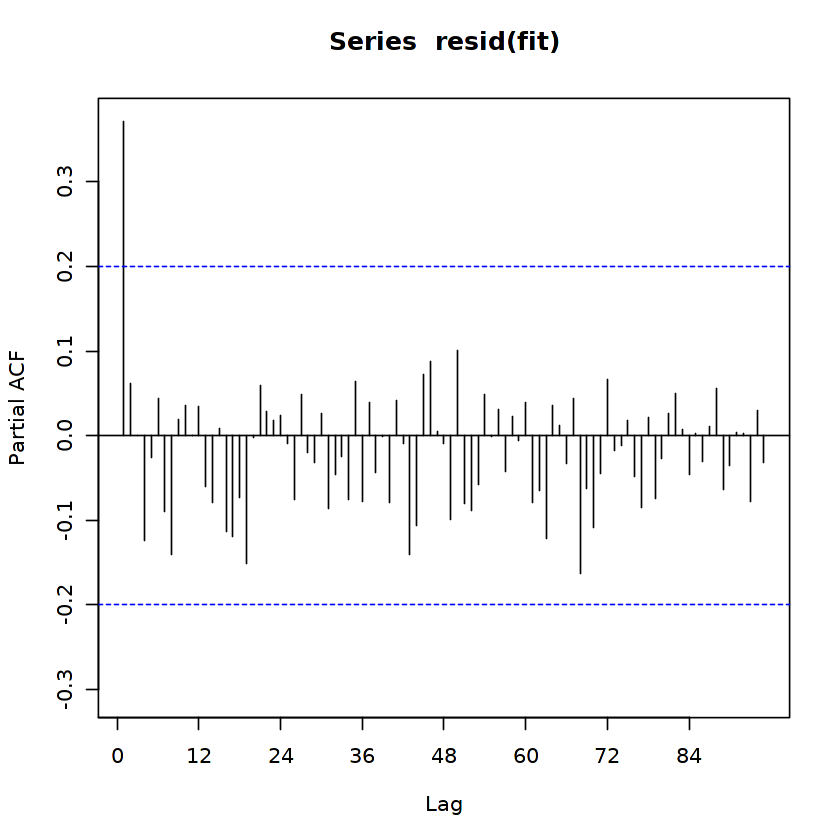

In [ ]:
trend = time(sdhousing.train.ts)
summary(fit <- lm(sdhousing.train.ts ~ trend + sp500.train.ts, na.action = NULL))

Acf(resid(fit), lag.max = 100)
Pacf(resid(fit), 100)

m7 = Arima(sdhousing.train.ts, order = c(1, 1, 0),
           seasonal = list(order = c(1, 0, 1), period = 4),
           xreg = cbind(sp500.train.ts))

arima.pred3 = forecast(m7, h = 4, level = 0,
                       xreg = cbind(sp500.train.ts))

accuracy(arima.pred3, sdhousing.test.ts)


	Ljung-Box test

data:  Residuals from Regression with ARIMA(1,1,0)(1,0,1)[4] errors
Q* = 11.745, df = 16, p-value = 0.7614

Model df: 3.   Total lags used: 19



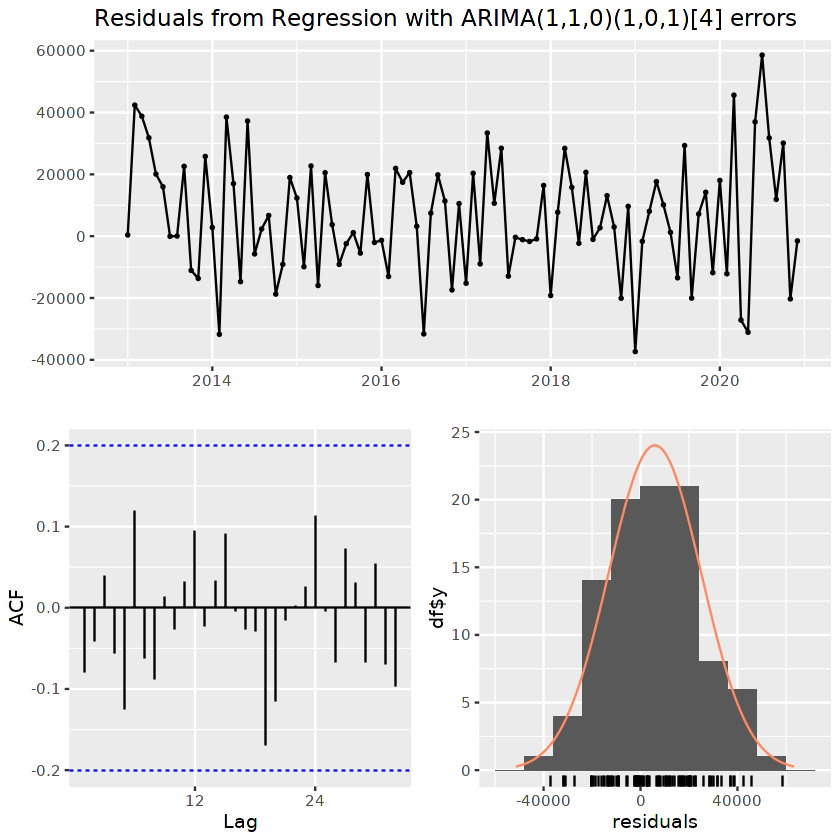

In [ ]:
checkresiduals(m7)

## Best Model: ARIMA (1,1,0) x (0,1,0) 12

In [ ]:
sd.final.model = Arima(sdhousing.ts,
           order = c(1, 1, 0),
           seasonal = list(order = c(0,1,0), period = 12))

sd.arima.pred.final = forecast(sd.final.model, h = 12, level = 0)

In [ ]:
sd.arima.pred.final

         Point Forecast      Lo 0      Hi 0
Jan 2022       968642.8  968642.8  968642.8
Feb 2022       987227.4  987227.4  987227.4
Mar 2022       997524.7  997524.7  997524.7
Apr 2022      1080487.7 1080487.7 1080487.7
May 2022      1102895.5 1102895.5 1102895.5
Jun 2022      1113885.1 1113885.1 1113885.1
Jul 2022      1087574.6 1087574.6 1087574.6
Aug 2022      1064927.5 1064927.5 1064927.5
Sep 2022      1092604.5 1092604.5 1092604.5
Oct 2022      1117745.5 1117745.5 1117745.5
Nov 2022      1098208.5 1098208.5 1098208.5
Dec 2022      1082221.5 1082221.5 1082221.5

In [ ]:
sdhousing2022 = read.csv("SDHousing2022.csv")
sdhousing2022.ts = ts(sdhousing2022$Price, start = c(2022, 1), frequency = 12)

In [ ]:
accuracy(sd.arima.pred.final, sdhousing2022.ts)

ME         RMSE      MAE      MPE        MAPE     MASE     
Training set   134.5075  27596.76 19549.94 -0.0861425 2.803495 0.3565788
Test set     50725.7910 131569.74 98411.56  3.5428518 8.338399 1.7949657
             ACF1         Theil's U
Training set  0.007716162        NA
Test set     -0.150323276 0.7867463

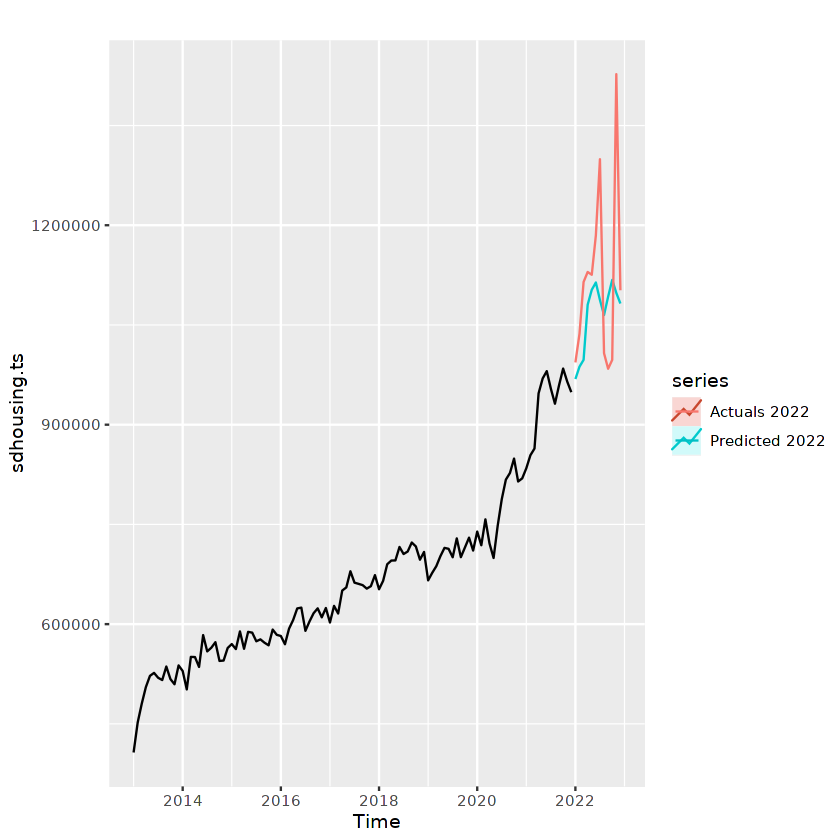

In [ ]:
autoplot(sdhousing.ts) + 
autolayer(sd.arima.pred.final, series = "Predicted 2022") + 
autolayer(sdhousing2022.ts, series = "Actuals 2022")

# California Data

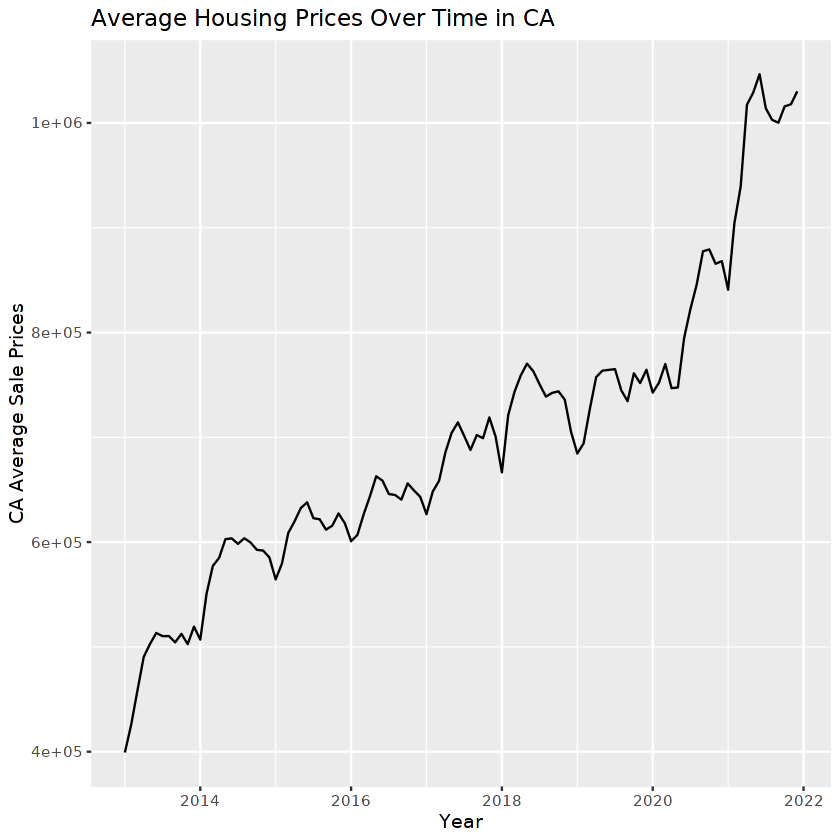

In [2]:
library(data.table)
library(forecast)
library(tseries)

CAhousing = read.csv("CAHousingPrices.csv")
CAhousing.ts = ts(CAhousing$Average.Sale.Price, start = c(2013, 1), frequency = 12)

library(ggplot2)
autoplot(CAhousing.ts, main = "Average Housing Prices Over Time in CA",
xlab = "Year",
ylab = "CA Average Sale Prices")

CAhousing.train.ts = window(CAhousing.ts, end = c(2020, 12))
CAhousing.test.ts = window(CAhousing.ts, start = c(2021, 01))

There is a seasonality, trend, noise, and level but the seasonality goes away after 2019. 

In [66]:
CAlag_1 = diff(CAhousing.ts, lag = 1)
CAdata.diff.ts = diff(CAlag_1, lag = 12)

nValid = 12 # last 12 data points is the validation set

dtrain.ts = window(CAdata.diff.ts, start = c(2014, 2), 
                   end = c(2014, length(CAdata.diff.ts) - nValid + 1),
                   frequency = 12)

dvalid.ts = window(CAdata.diff.ts, 
                   start = c(2014, length(CAdata.diff.ts) - nValid + 2),
                   frequency = 12)

We differenced the data to get rid of seasonality and trend 

## Naive Forecast

ME         RMSE      MAE       MPE        MAPE      MASE     
Training set   4935.337  18079.28  14423.97  0.7775142  2.210305 0.3002394
Test set     120119.167 133733.65 124659.50 11.8132612 12.353238 2.5948263
             ACF1      Theil's U
Training set 0.2322529       NA 
Test set     0.5555698 3.636425

ME        RMSE     MAE       MPE      MAPE      MASE     ACF1     
Training set  45996.25  58266.1  48041.56  6.83655  7.118159 1.000000 0.8476540
Test set     178807.17 187481.5 178807.17 17.95745 17.957449 3.721927 0.6362568
             Theil's U
Training set       NA 
Test set     5.157605

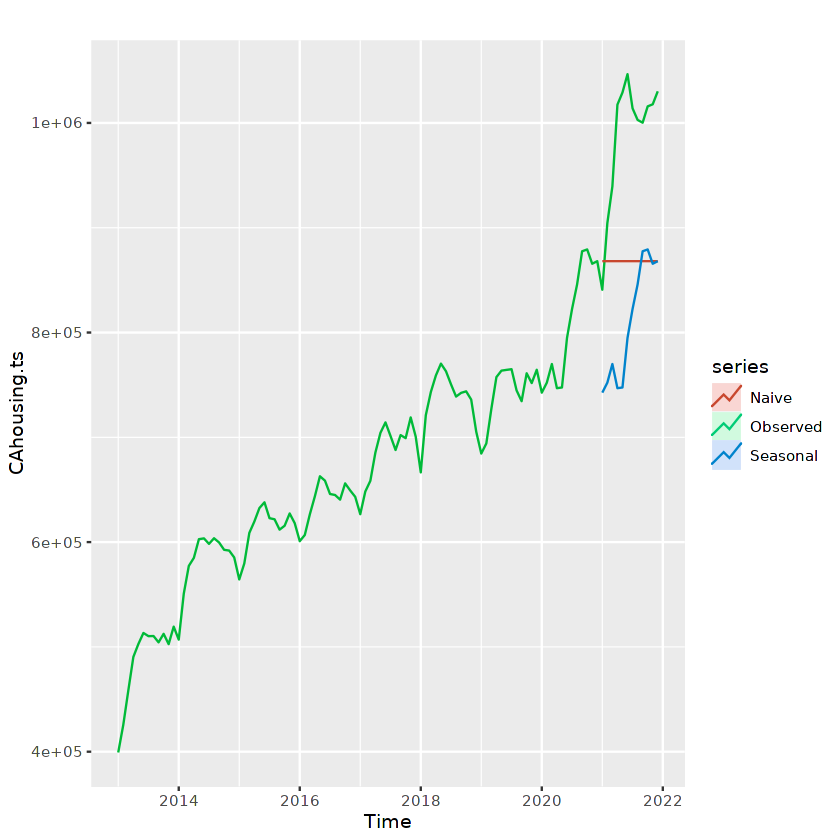


	Ljung-Box test

data:  Residuals from Naive method
Q* = 48.883, df = 19, p-value = 0.000191

Model df: 0.   Total lags used: 19



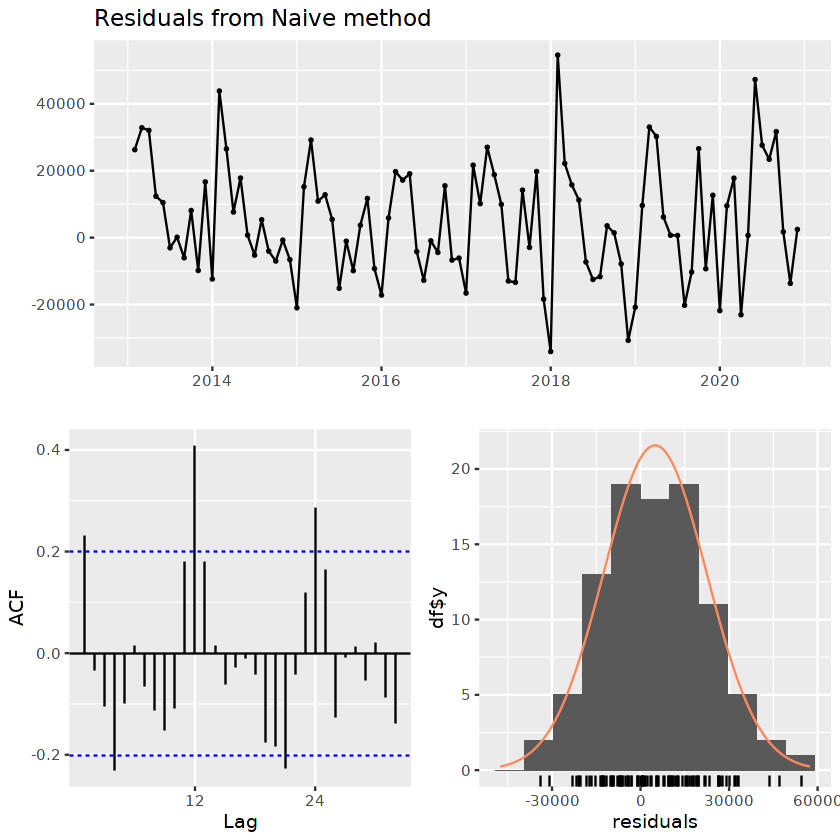


	Ljung-Box test

data:  Residuals from Seasonal naive method
Q* = 220.46, df = 19, p-value < 2.2e-16

Model df: 0.   Total lags used: 19



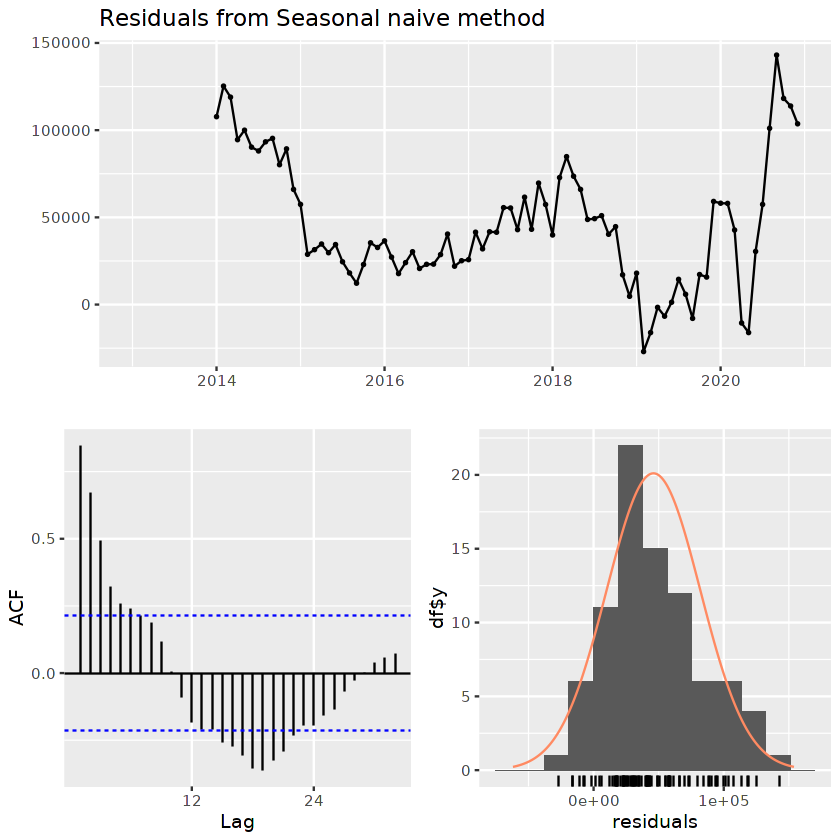

In [67]:
CA_naive = naive(CAhousing.train.ts, h = frequency(CAhousing.train.ts))

CA_seasonal = snaive(CAhousing.train.ts, h = frequency(CAhousing.train.ts))

autoplot(CAhousing.ts, series = "Observed") +
  autolayer(CA_naive, series = "Naive", PI = FALSE) +
  autolayer(CA_seasonal, series = "Seasonal", PI = FALSE)

accuracy(CA_naive, CAhousing.test.ts)
accuracy(CA_seasonal, CAhousing.test.ts)

checkresiduals(CA_naive)
checkresiduals(CA_seasonal)

Looking at RMSE and MAPE values, a naive forecast performs better than a seasonal naive forecast. This is because the seasonal naive forecast does not take the COVID spike into consideration. 

## Holt's Winter Model with Automatically Selected Components

ME         RMSE      MAE       MPE        MAPE      MASE     
Training set   1217.139  13068.62  10060.52  0.1336835  1.505589 0.2094128
Test set     102709.203 111440.16 102709.20 10.1531615 10.153161 2.1379240
             ACF1       Theil's U
Training set 0.08628852       NA 
Test set     0.55062384 3.038899

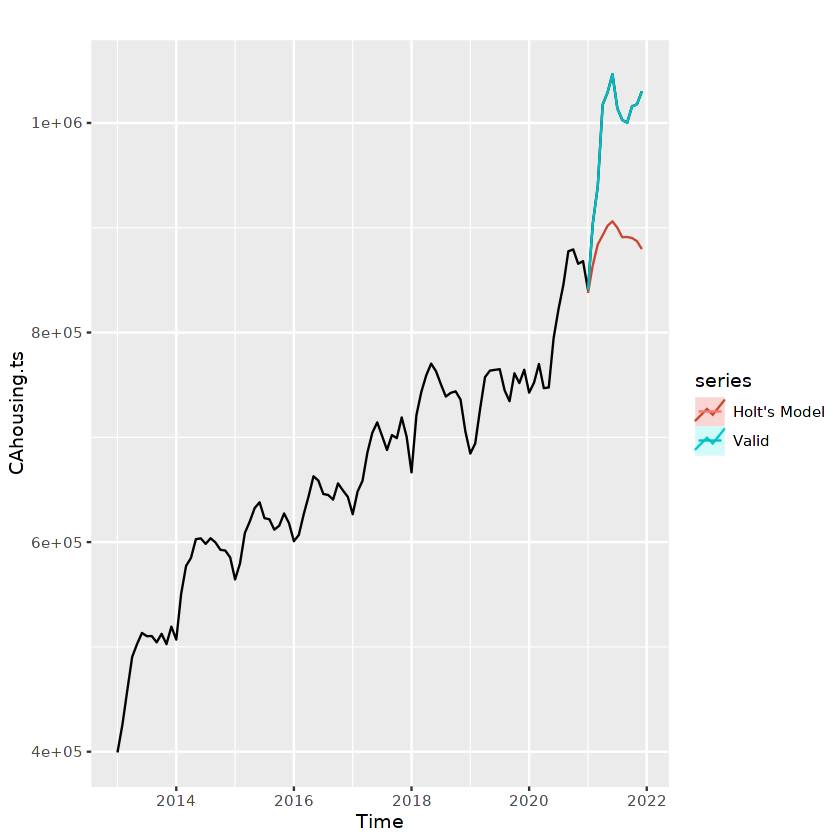


	Ljung-Box test

data:  Residuals from ETS(M,Ad,A)
Q* = 21.356, df = 3, p-value = 8.878e-05

Model df: 17.   Total lags used: 20



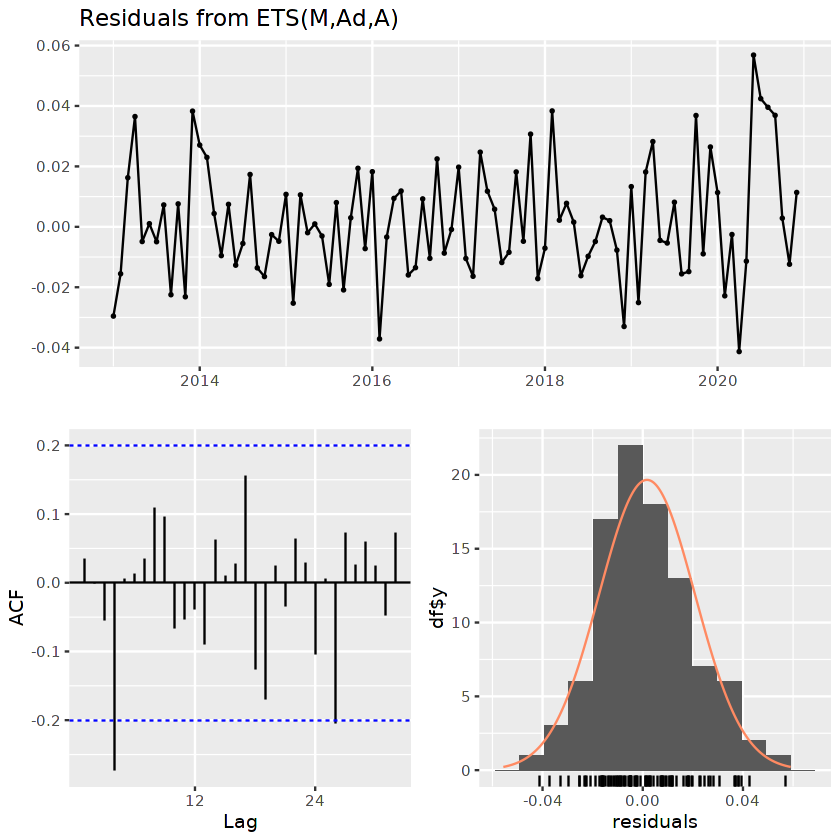

In [68]:
zzz = ets(CAhousing.train.ts, model="ZZZ")
zzz.pred = forecast(zzz, h = 12, level = 0)

autoplot(CAhousing.ts) +
  autolayer(zzz.pred, series = "Holt's Model") +
  autolayer(CAhousing.test.ts, series = "Valid")

accuracy(zzz.pred, CAhousing.test.ts)

checkresiduals(zzz)


In [69]:
zzz

ETS(M,Ad,A) 

Call:
 ets(y = CAhousing.train.ts, model = "ZZZ") 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 1e-04 
    gamma = 1e-04 
    phi   = 0.98 

  Initial states:
    l = 446450.7726 
    b = 7524.2505 
    s = -10936.45 -2543.911 1375.445 3272.738 3963.778 13911.75
           20958.1 17670.55 9639.182 1788.749 -16657.06 -42442.87

  sigma:  0.021

     AIC     AICc      BIC 
2285.026 2293.909 2331.184 

## ARIMA Model

ARMA[1] model after looking at the ACF and PACF graphs.


	Augmented Dickey-Fuller Test

data:  CAhousing.train.ts
Dickey-Fuller = -3.1661, Lag order = 4, p-value = 0.09784
alternative hypothesis: stationary


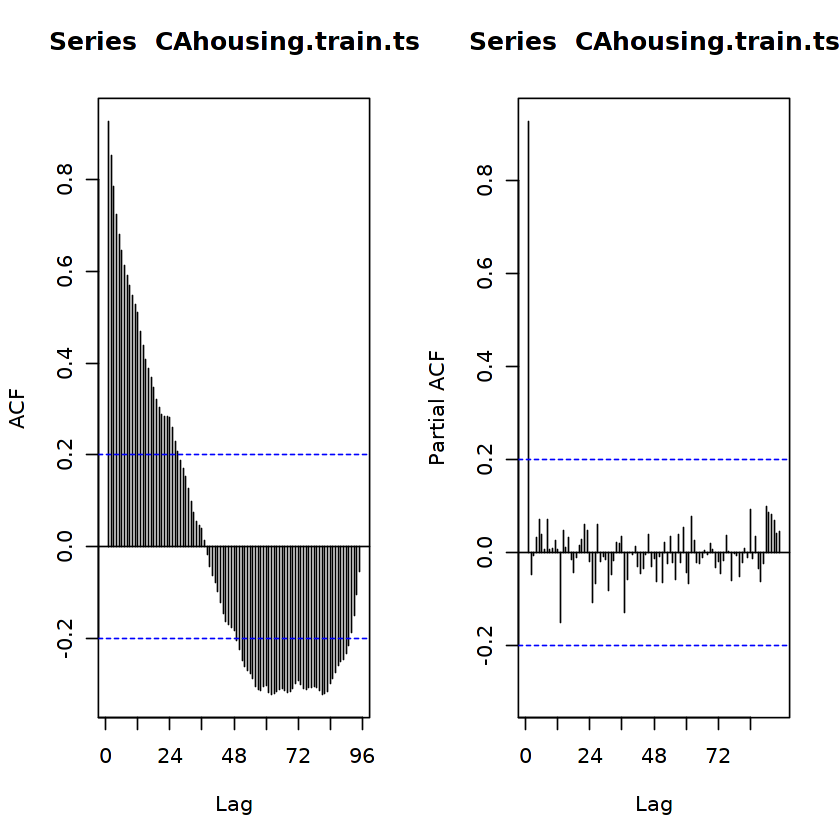

ME          RMSE     MAE      MPE         MAPE     MASE     
Training set   -49.66444 16322.68 11312.91 -0.05561955 1.610486 0.2354818
Test set     75558.97344 94269.09 76400.18  7.46863516 7.568679 1.5902935
             ACF1          Theil's U
Training set -0.0009570172       NA 
Test set      0.6362322262 2.609254

Series: CAhousing.train.ts 
ARIMA(1,1,0)(0,1,0)[12] 

Coefficients:
         ar1
      0.0367
s.e.  0.1099

sigma^2 = 311917812:  log likelihood = -928.93
AIC=1861.87   AICc=1862.02   BIC=1866.71

Training set error measures:
                    ME     RMSE      MAE         MPE     MAPE      MASE
Training set -49.66444 16322.68 11312.91 -0.05561955 1.610486 0.2354818
                      ACF1
Training set -0.0009570172

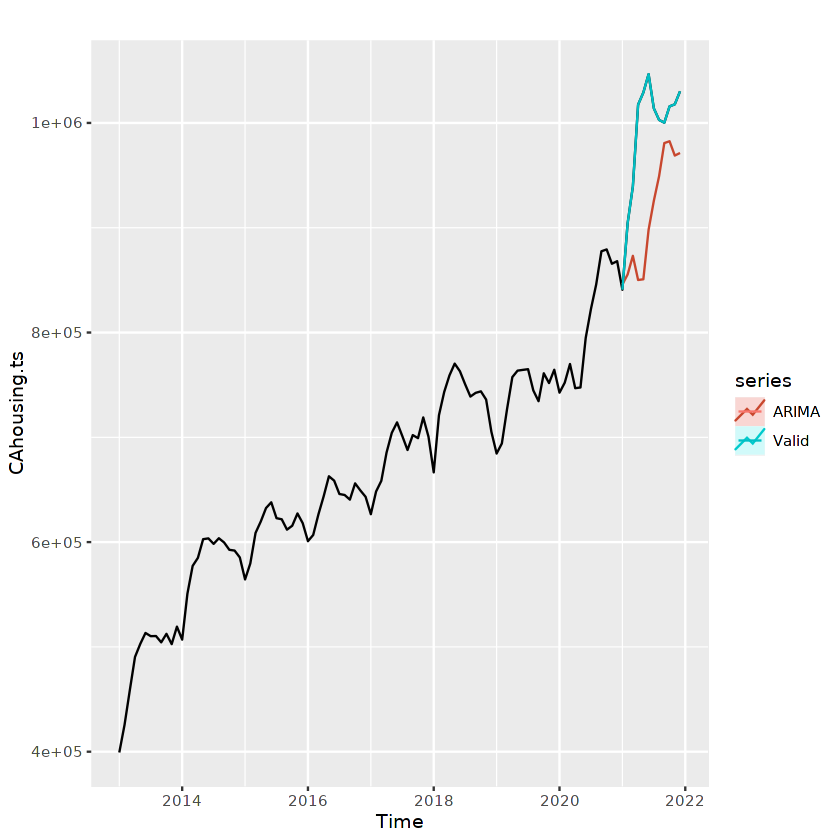


	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)(0,1,0)[12]
Q* = 40.682, df = 18, p-value = 0.001684

Model df: 1.   Total lags used: 19



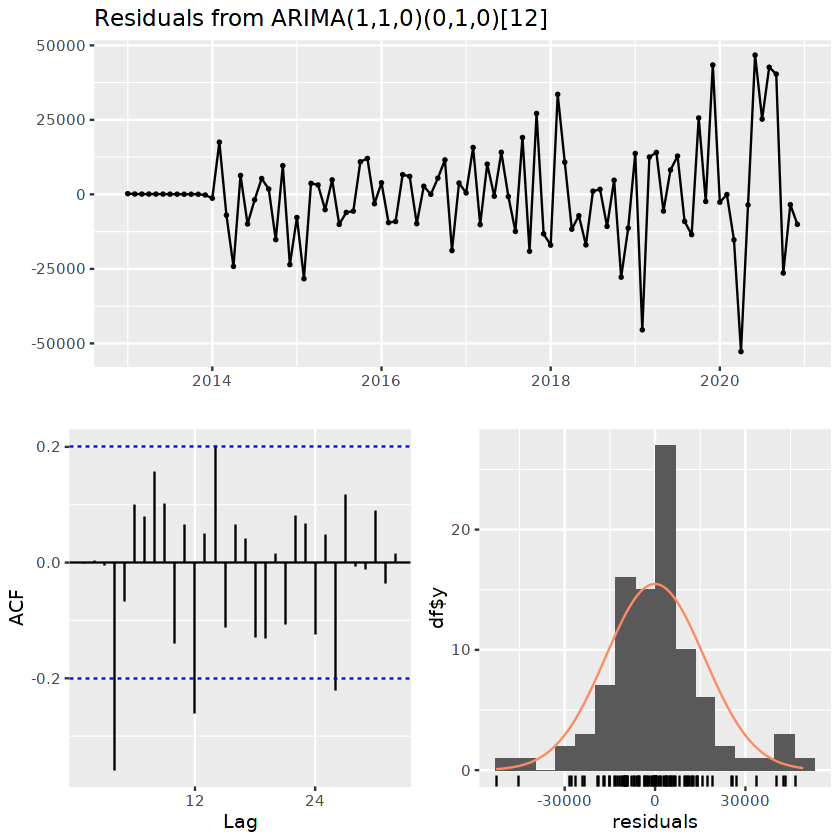

In [70]:
par(mfrow = c(1, 2))
Acf(CAhousing.train.ts, lag.max = 100)
Pacf(CAhousing.train.ts, lag.max = 100)
par(mfrow = c(1, 1))

adf.test(CAhousing.train.ts)

m1 = Arima(CAhousing.train.ts,
           order = c(1, 1, 0),
           seasonal = list(order = c(0, 1, 0), period = 12))

arima.pred = forecast(m1, h = 12, level = 0)

autoplot(CAhousing.ts) +
  autolayer(arima.pred, series = "ARIMA") +
  autolayer(CAhousing.test.ts, series = "Valid")

accuracy(arima.pred, CAhousing.test.ts)
summary(m1)

checkresiduals(m1)

MAPE values seem good but there are lags in ACF. Hence, we tried a different model with AR and MA being 1.


	Augmented Dickey-Fuller Test

data:  CAhousing.train.ts
Dickey-Fuller = -3.1661, Lag order = 4, p-value = 0.09784
alternative hypothesis: stationary


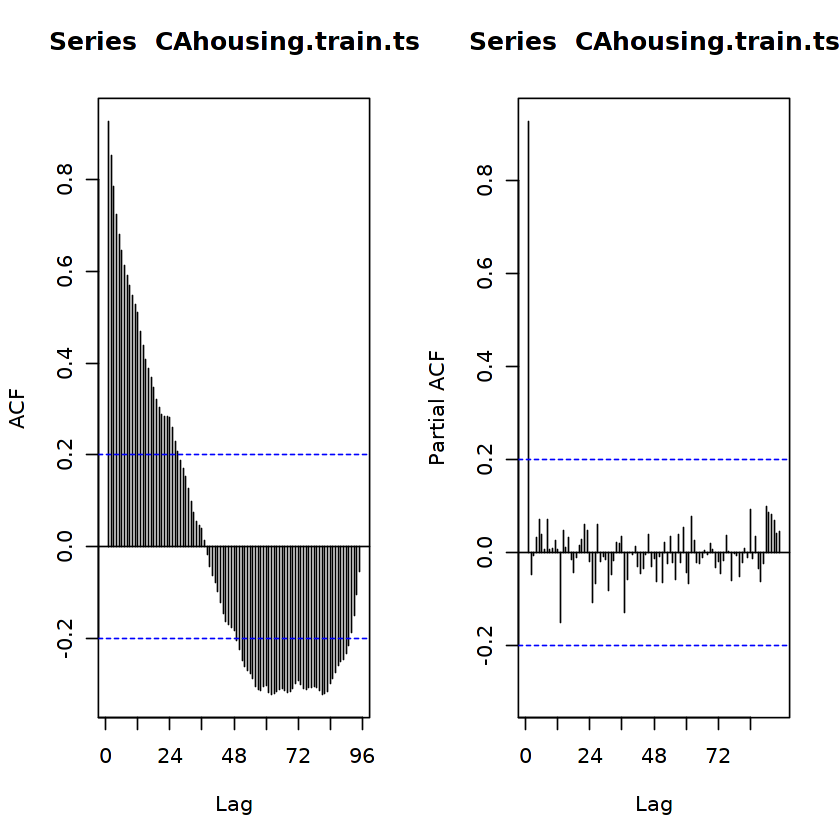

ME        RMSE     MAE      MPE       MAPE     MASE     
Training set  1096.315 13802.55 10482.97 0.1824449 1.583855 0.2182064
Test set     82233.529 90796.08 84134.14 8.1033065 8.329345 1.7512784
             ACF1          Theil's U
Training set -0.0001996956       NA 
Test set      0.5015297158 2.478218

Series: CAhousing.train.ts 
ARIMA(1,1,0)(1,0,1)[12] 

Coefficients:
         ar1    sar1     sma1
      0.1648  0.9937  -0.9070
s.e.  0.1025  0.0394   0.2849

sigma^2 = 198793573:  log likelihood = -1048.66
AIC=2105.32   AICc=2105.76   BIC=2115.53

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 1096.315 13802.55 10482.97 0.1824449 1.583855 0.2182064
                      ACF1
Training set -0.0001996956

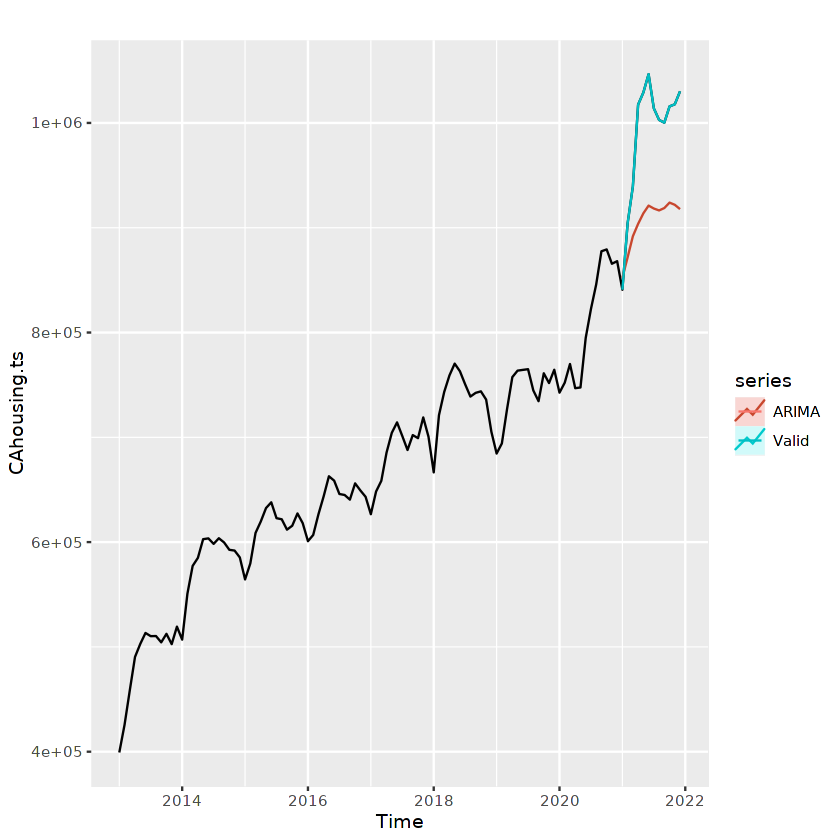


	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)(1,0,1)[12]
Q* = 19.002, df = 16, p-value = 0.2686

Model df: 3.   Total lags used: 19



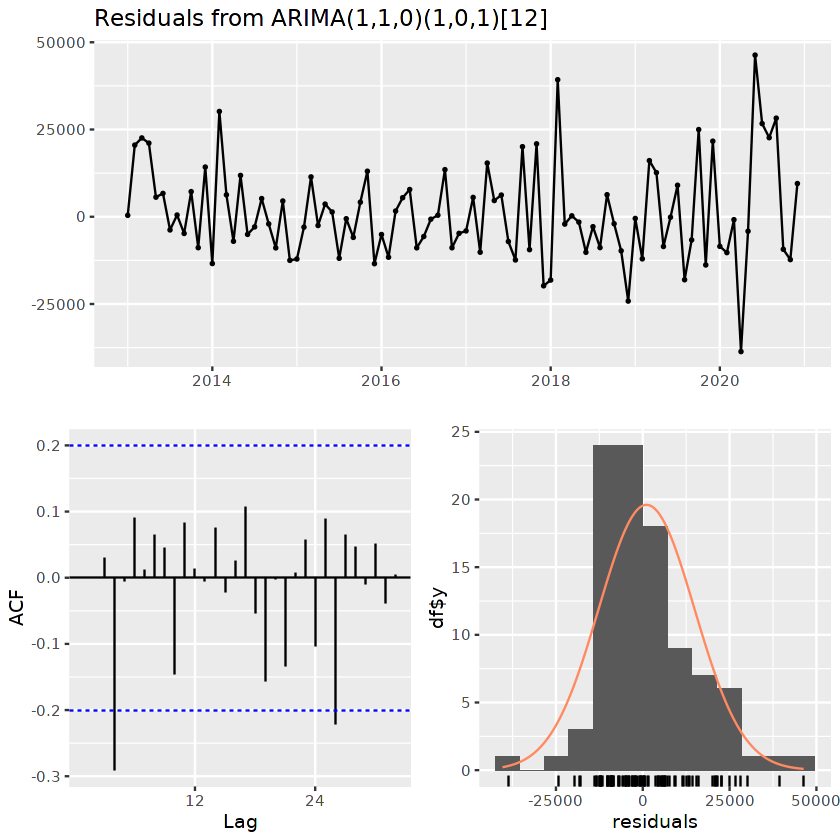

In [71]:
par(mfrow = c(1, 2))
Acf(CAhousing.train.ts, lag.max = 100)
Pacf(CAhousing.train.ts, lag.max = 100)
par(mfrow = c(1, 1))

adf.test(CAhousing.train.ts)

m1 = Arima(CAhousing.train.ts,
           order = c(1, 1, 0),
           seasonal = list(order = c(1, 0, 1), period = 12))

arima.pred = forecast(m1, h = 12, level = 0)

autoplot(CAhousing.ts) +
  autolayer(arima.pred, series = "ARIMA") +
  autolayer(CAhousing.test.ts, series = "Valid")

accuracy(arima.pred, CAhousing.test.ts)
summary(m1)

checkresiduals(m1)


	Augmented Dickey-Fuller Test

data:  CAhousing.train.ts
Dickey-Fuller = -3.1661, Lag order = 4, p-value = 0.09784
alternative hypothesis: stationary


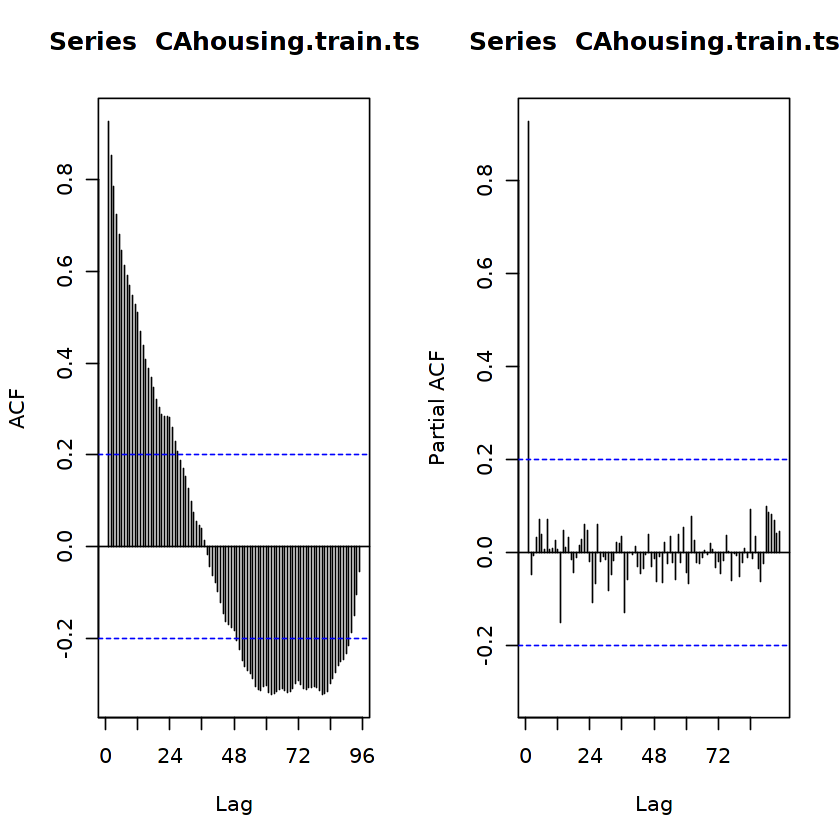

ME        RMSE     MAE      MPE       MAPE     MASE     
Training set  4087.503 16971.84 12954.67 0.6485477 1.992303 0.2696555
Test set     60439.993 87483.77 72249.95 6.0915842 7.496129 1.5039052
             ACF1        Theil's U
Training set -0.05441944       NA 
Test set      0.16289705 1.574887

Series: CAhousing.train.ts 
ARIMA(1,1,0)(1,0,1)[4] 

Coefficients:
         ar1     sar1     sma1
      0.2888  -0.0983  -0.0729
s.e.  0.0991   0.2739   0.2578

sigma^2 = 300567069:  log likelihood = -1060.63
AIC=2129.26   AICc=2129.71   BIC=2139.48

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 4087.503 16971.84 12954.67 0.6485477 1.992303 0.2696555
                    ACF1
Training set -0.05441944

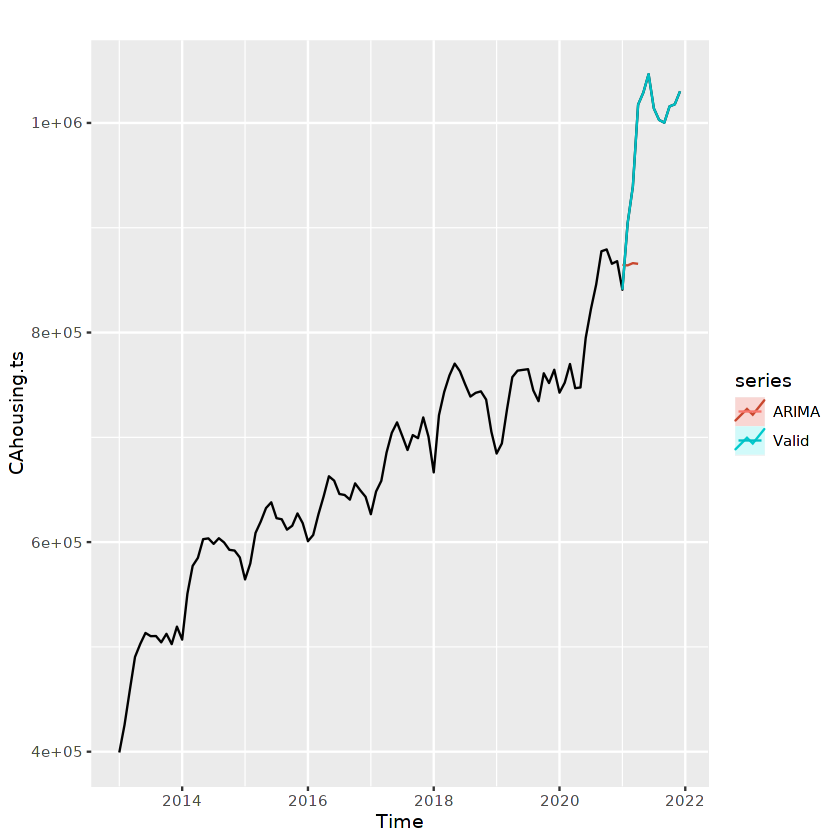


	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)(1,0,1)[4]
Q* = 26.689, df = 16, p-value = 0.04507

Model df: 3.   Total lags used: 19



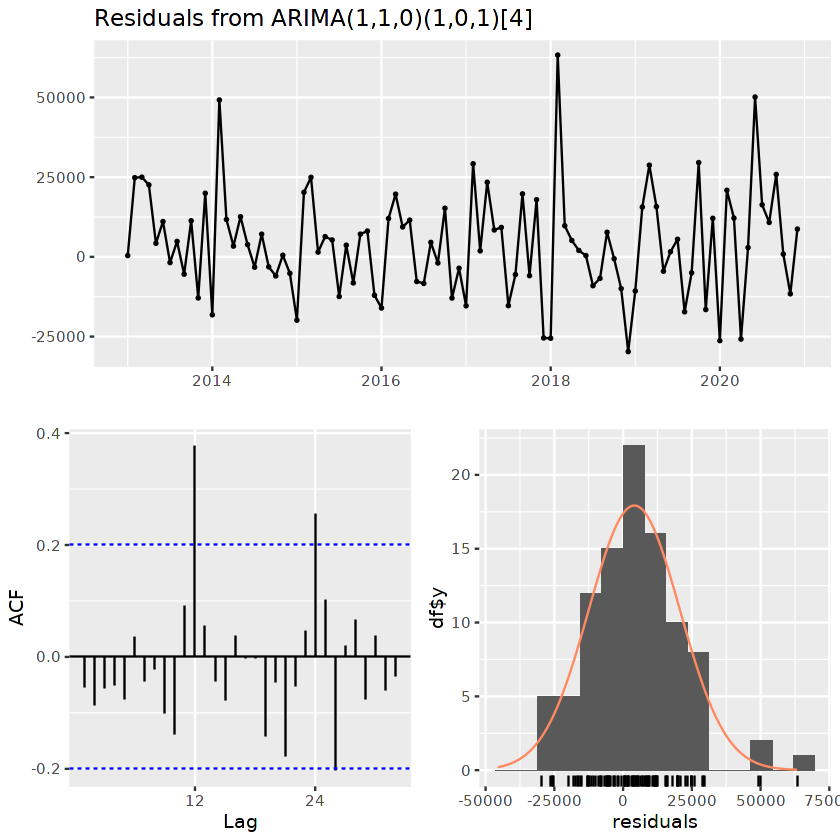

In [72]:
par(mfrow = c(1, 2))
Acf(CAhousing.train.ts, lag.max = 100)
Pacf(CAhousing.train.ts, lag.max = 100)
par(mfrow = c(1, 1))

adf.test(CAhousing.train.ts)

m1 = Arima(CAhousing.train.ts,
           order = c(1, 1, 0),
           seasonal = list(order = c(1, 0, 1), period = 4))

arima.pred = forecast(m1, h = 4, level = 0)

autoplot(CAhousing.ts) +
  autolayer(arima.pred, series = "ARIMA") +
  autolayer(CAhousing.test.ts, series = "Valid")

accuracy(arima.pred, CAhousing.test.ts)
summary(m1)

checkresiduals(m1)

Even though the last model has the lowest MAPE values, there are more lags. 

## Neural Network Model

ME           RMSE      MAE        MPE         MAPE      MASE     
Training set    -71.48236  12350.68   9666.723 -0.04565972  1.407328 0.2012158
Test set     100315.29207 114090.92 105810.930  9.84222372 10.495814 2.2024874
             ACF1      Theil's U
Training set 0.2201951       NA 
Test set     0.5375945 3.099861

Warning message:
“Removed 12 rows containing missing values (`geom_line()`).”


ME          RMSE      MAE       MPE         MAPE      MASE     
Training set   -15.35517  14536.76  11812.75 -0.05034636  1.726185 0.2458861
Test set     97537.98308 110371.05 102261.44  9.58127810 10.143033 2.1286037
             ACF1      Theil's U
Training set 0.2268660       NA 
Test set     0.5364201 3.004982

Warning message:
“Removed 12 rows containing missing values (`geom_line()`).”


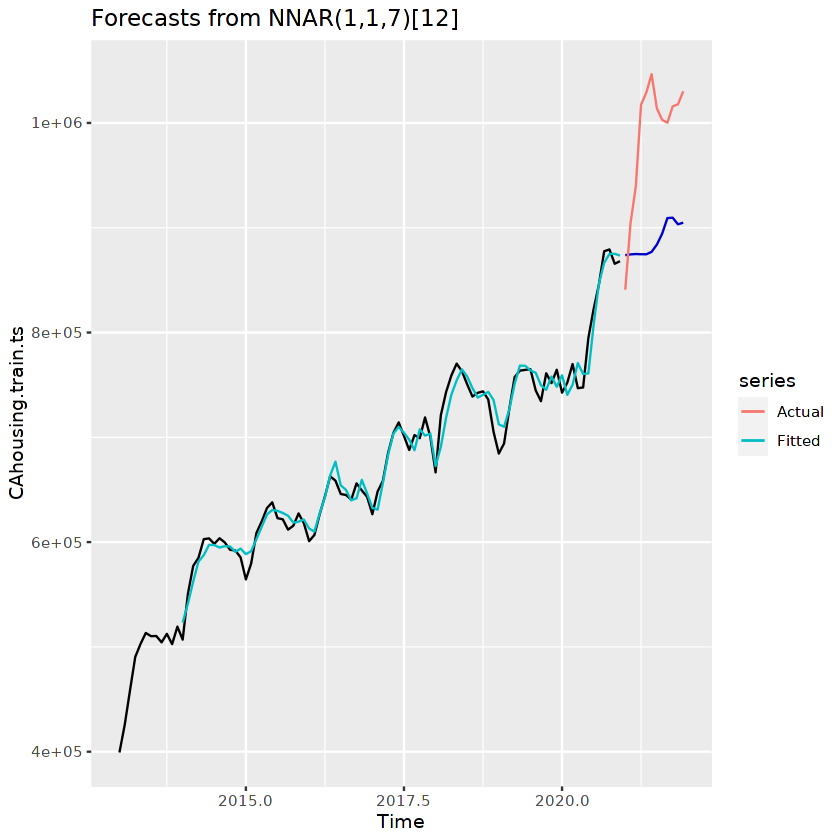

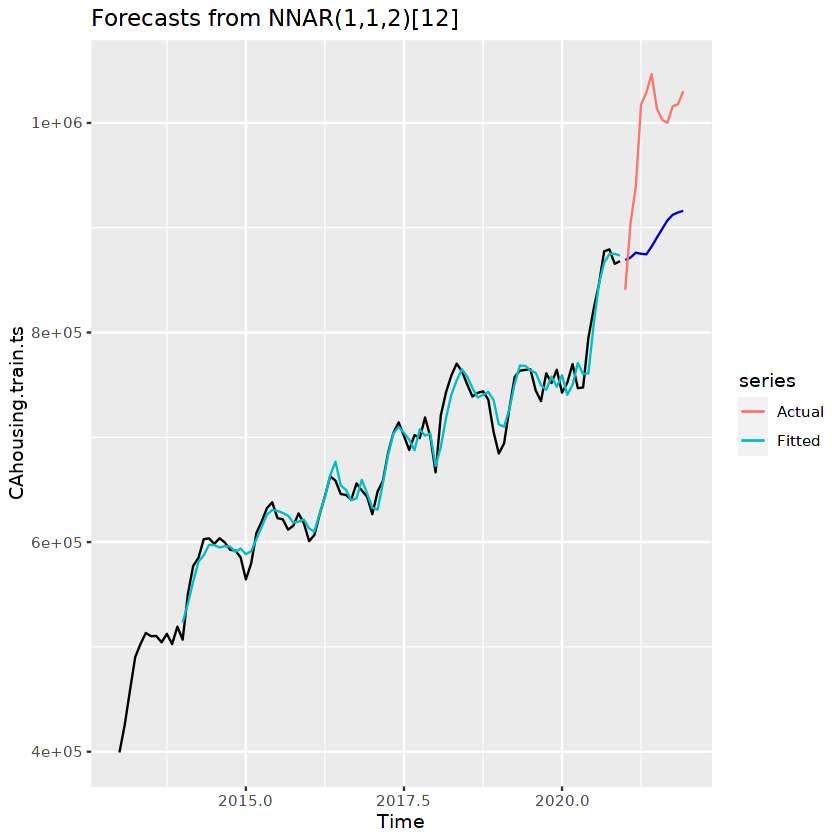

In [73]:
set.seed(201)

CAhousing.nnetar = nnetar(CAhousing.train.ts, repeats = 20, p = 1, P = 1, size = 7)
CAhousing.nnetar.pred = forecast(CAhousing.nnetar, h = 12)
accuracy(CAhousing.nnetar.pred, CAhousing.test.ts)

autoplot(CAhousing.nnetar.pred) +
  autolayer(CAhousing.nnetar$fitted, series = "Fitted") +
  autolayer(CAhousing.test.ts, series = "Actual")

CAhousing.nnetar.opt = nnetar(CAhousing.train.ts)
CAhousing.nnetar.pred.opt = forecast(CAhousing.nnetar.opt, h = 12)
accuracy(CAhousing.nnetar.pred.opt, CAhousing.test.ts)

autoplot(CAhousing.nnetar.pred.opt) +
  autolayer(CAhousing.nnetar$fitted, series = "Fitted") +
  autolayer(CAhousing.test.ts, series = "Actual")

Warning message in modeldf.default(object):
“Could not find appropriate degrees of freedom for this model.”


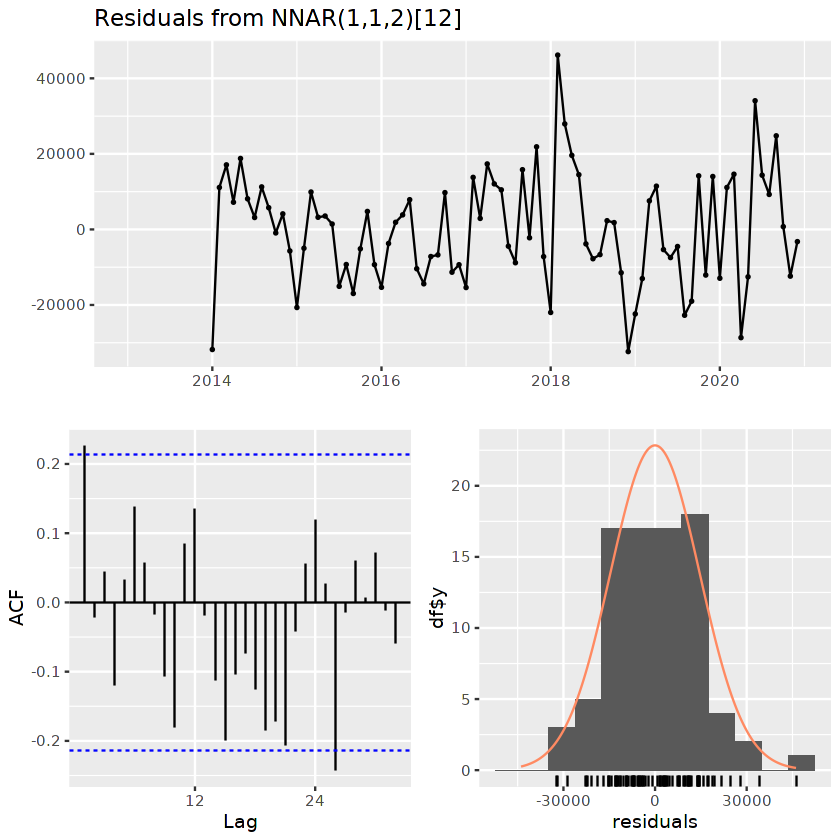

In [74]:
checkresiduals(CAhousing.nnetar.pred.opt)

## Linear Regression

- We looked at both S&P500 and GDP as external factors that would help in predicting housing prices. We first looked at S&P500.

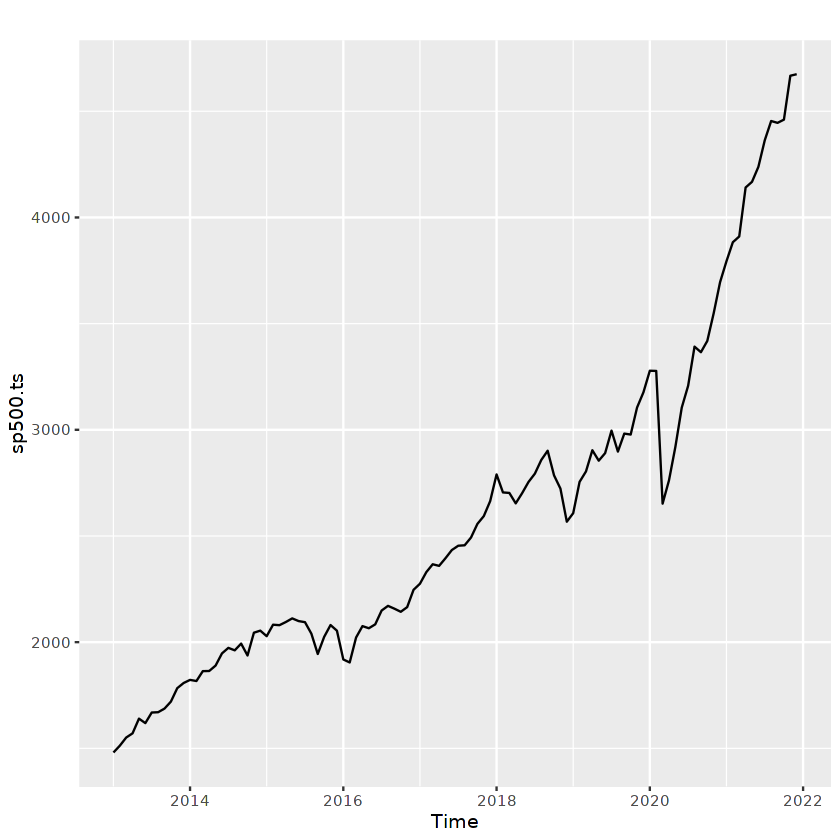

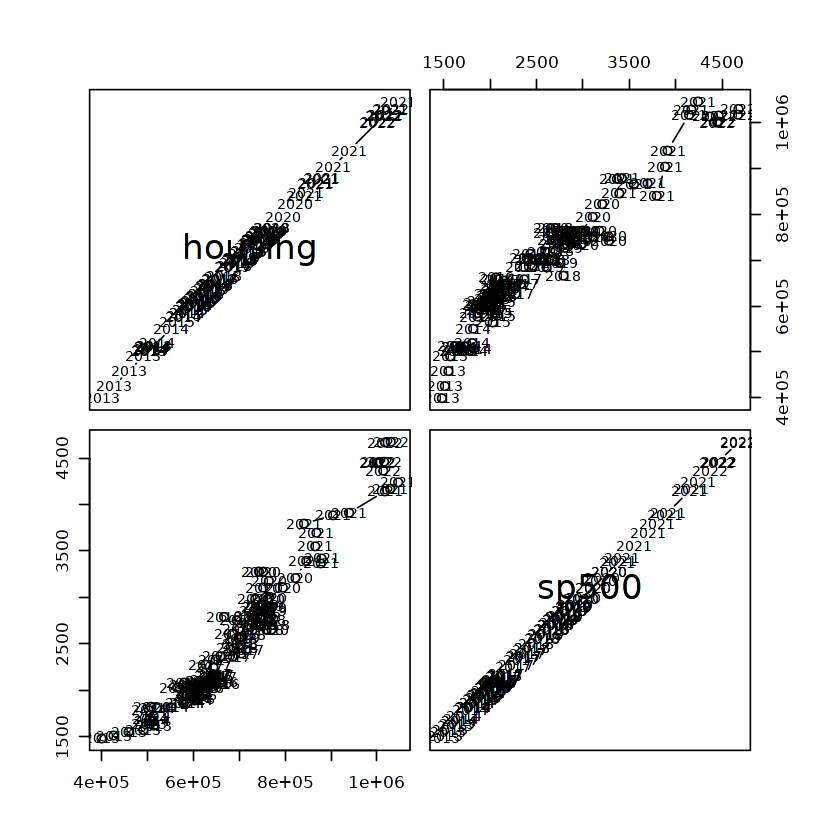

Jan     Feb     Mar     Apr     May     Jun     Jul     Aug     Sep    
2013  399224  425518  458377  490436  502805  513290  510243  510367  504349
2014  506942  550774  577303  584968  602790  603548  598312  603672  599642
2015  564382  579593  608772  619688  632510  637955  622832  621774  611887
2016  600896  606789  626524  643730  662811  658646  645903  644958  640533
2017  626634  648284  658461  685472  704282  714223  701269  687907  702111
2018  666527  721095  743278  759058  770304  763023  750526  738881  742417
2019  684518  694130  727192  757450  763624  764344  765000  744770  734491
2020  742625  752144  769929  746882  747554  794806  822421  845845  877533
2021  840839  904341  939418 1017456 1029022 1046524 1013922 1002895 1000225
     Oct     Nov     Dec    
2013  512461  502648  519313
2014  592646  591921  585351
2015  615609  627323  618074
2016  656028  649316  643212
2017  699194  718962  700584
2018  743860  736009  705311
2019  761078  751777  764445
2020  879277  865619  868081
2021 1015790 1017777 1030193

[1] 0.972745

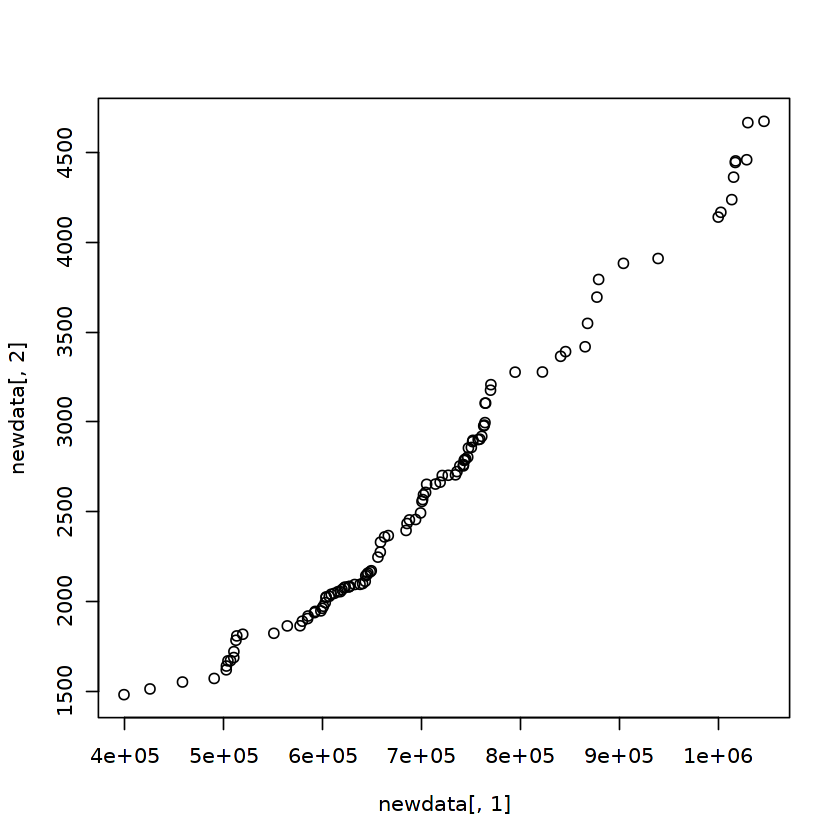


Call:
tslm(formula = CAhousing.ts ~ sp500.ts, data = newdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-103366  -23200    6477   20489   60359 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.411e+05  1.106e+04   21.80   <2e-16 ***
sp500.ts    1.766e+02  4.089e+00   43.19   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 33070 on 106 degrees of freedom
Multiple R-squared:  0.9462,	Adjusted R-squared:  0.9457 
F-statistic:  1865 on 1 and 106 DF,  p-value: < 2.2e-16


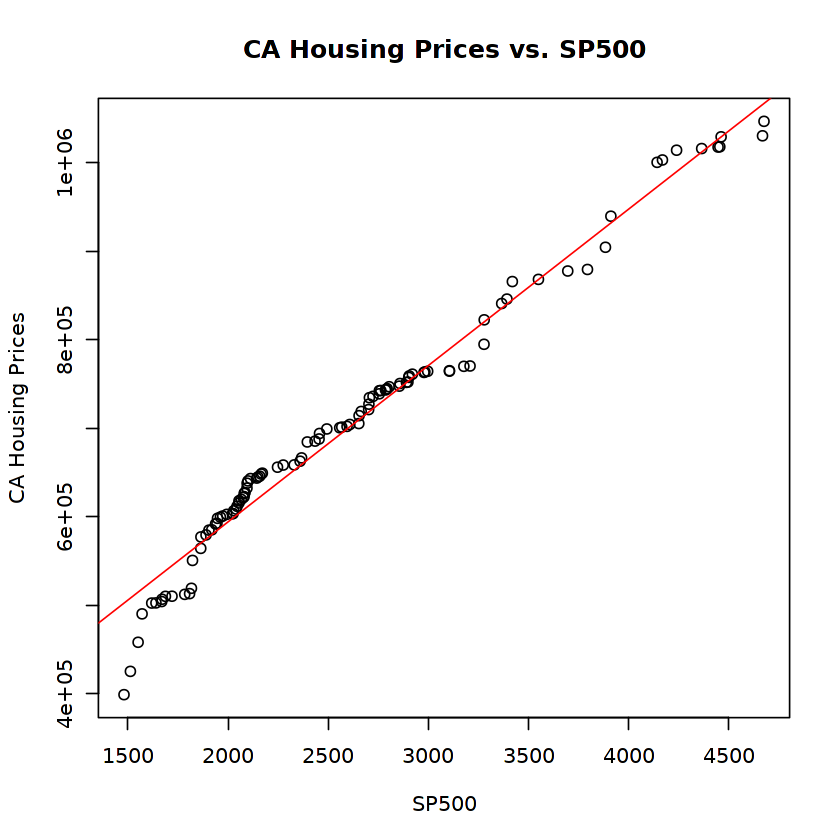

In [96]:

sp500 = read.csv("SP500new.csv")
sp500.ts = ts(sp500$Close, start = c(2013, 1), frequency = 12)

autoplot(sp500.ts)

sp500.train.ts = window(sp500.ts, end = c(2020, 12))
sp500.test.ts = window(sp500.ts, end = c(2020, 12))

newdata = ts.intersect(housing = CAhousing.ts, sp500 = sp500.ts)

pairs(newdata)

library(ggplot2)
qqplot(newdata[, 1], newdata[, 2])

newdata[, 1]

CAhousing.ts = newdata[, 'housing']
sp500.ts = newdata[, 'sp500']

cor(sp500.ts, CAhousing.ts) # correlation = 0.974

m2 = tslm(CAhousing.ts ~ sp500.ts, data = newdata)
qqplot(sp500.ts, CAhousing.ts, main = "CA Housing Prices vs. SP500",
     xlab = "SP500",
     ylab = "CA Housing Prices")
abline(m2, col = "red")
summary(m2)



### S&P 500

[1] 0.9700088


Call:
tslm(formula = CAhousing.ts1 ~ sp500.ts1, data = newdata1)

Residuals:
    Min      1Q  Median      3Q     Max 
-107806  -22764    8640   24627   56797 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.451e+05  1.149e+04   21.33   <2e-16 ***
sp500.ts1   1.732e+02  4.235e+00   40.89   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 33930 on 105 degrees of freedom
Multiple R-squared:  0.9409,	Adjusted R-squared:  0.9404 
F-statistic:  1672 on 1 and 105 DF,  p-value: < 2.2e-16


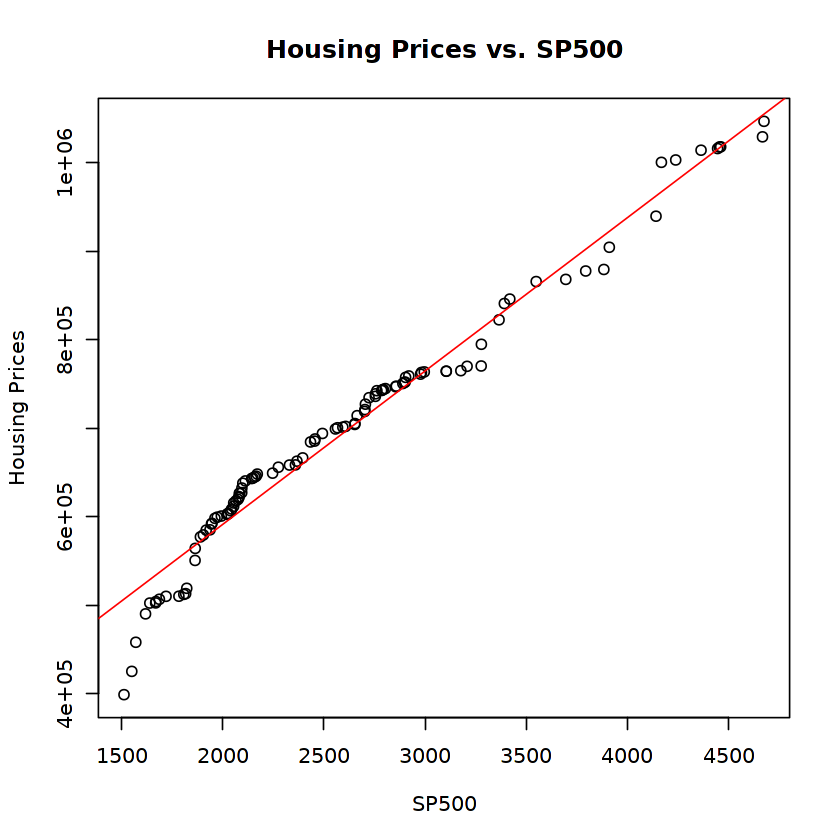

In [76]:
newdata1 = ts.intersect(housing = lag(CAhousing.ts, -1), sp500 = sp500.ts)
CAhousing.ts1 = newdata1[, 'housing']
sp500.ts1 = newdata1[, 'sp500']

cor(sp500.ts1, CAhousing.ts1) # correlation = 0.97

m4 = tslm(CAhousing.ts1 ~ sp500.ts1, data = newdata1)
qqplot(sp500.ts1, CAhousing.ts1, main = "Housing Prices vs. SP500",
     xlab = "SP500",
     ylab = "Housing Prices")
abline(m4, col = "red")
summary(m4)


### GDP

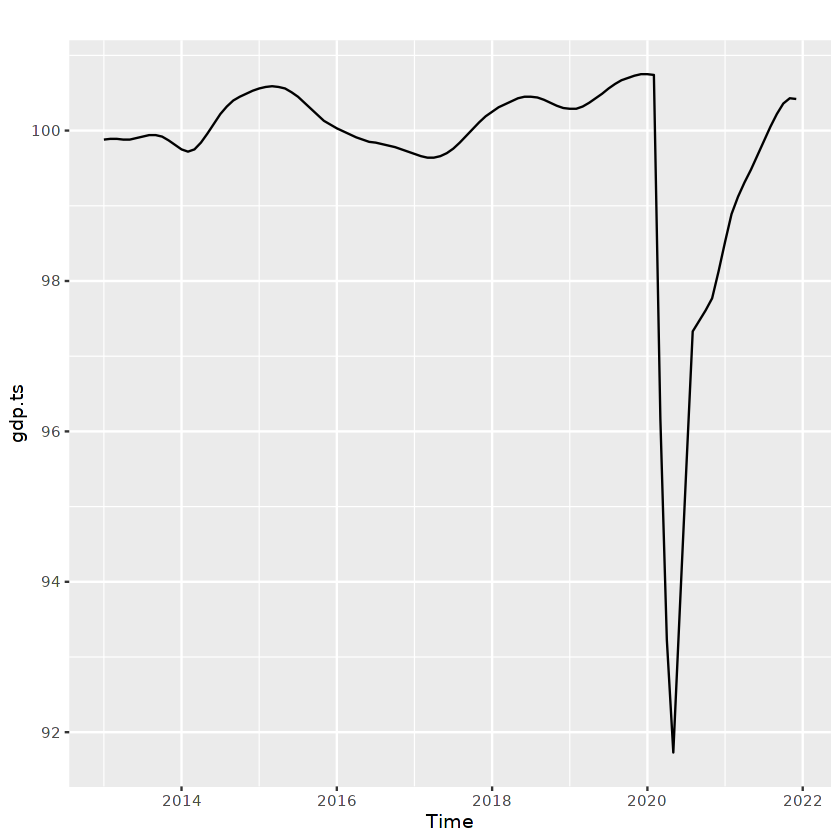

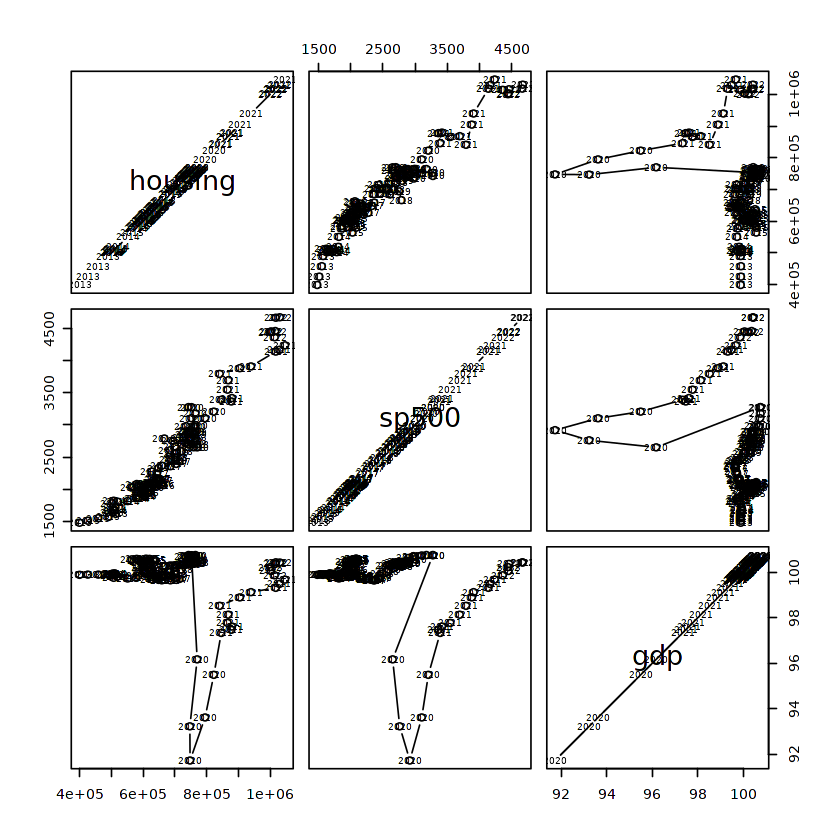

[1] -0.20149

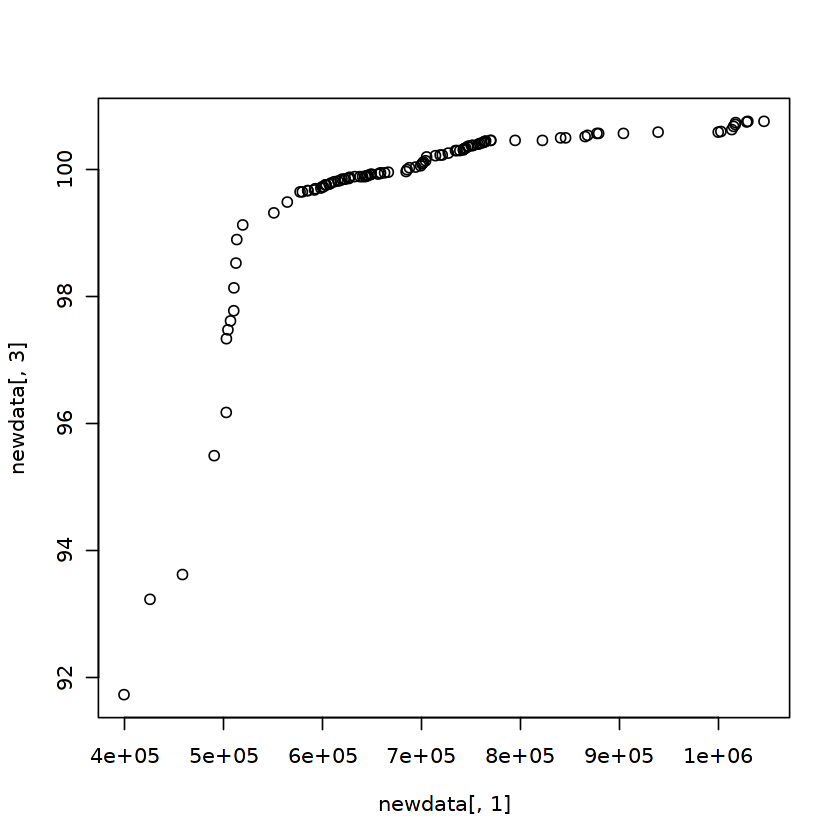


Call:
tslm(formula = CAhousing.ts ~ gdp.ts, data = newdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-296058  -85625  -22661   72181  347103 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  2663885     927995   2.871  0.00495 **
gdp.ts        -19710       9306  -2.118  0.03652 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 139700 on 106 degrees of freedom
Multiple R-squared:  0.0406,	Adjusted R-squared:  0.03155 
F-statistic: 4.486 on 1 and 106 DF,  p-value: 0.03652


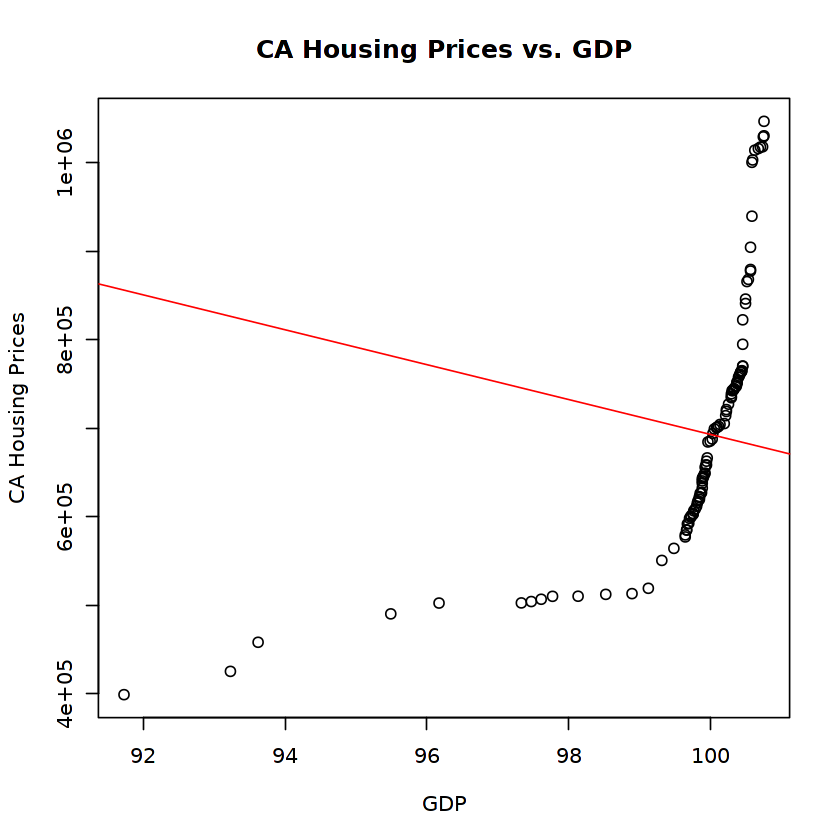

In [97]:
gdp = read.csv("GDP.csv")
gdp.ts = ts(gdp$GDP, start = c(2013, 1), frequency = 12)

autoplot(gdp.ts)

gdp.train.ts = window(gdp.ts, end = c(2020, 12))
gdp.test.ts = window(gdp.ts, end = c(2020, 12))

newdata = ts.intersect(housing = CAhousing.ts, sp500 = sp500.ts, gdp = gdp.ts)

pairs(newdata)

library(ggplot2)
qqplot(newdata[, 1], newdata[, 3])


CAhousing.ts = newdata[, 'housing']
sp500.ts = newdata[, 'sp500']
gdp.ts = newdata[, 'gdp']

cor(gdp.ts, CAhousing.ts) # correlation = -0.216

m3 = tslm(CAhousing.ts ~ gdp.ts, data = newdata)
qqplot(gdp.ts, CAhousing.ts, main = "CA Housing Prices vs. GDP",
     xlab = "GDP",
     ylab = "CA Housing Prices")
abline(m3, col = "red")
summary(m3)


## ARIMA with S&P 500


Call:
lm(formula = CAhousing.train.ts ~ trend + sp500.train.ts, na.action = NULL)

Residuals:
   Min     1Q Median     3Q    Max 
-95323 -16814   4782  18634  48846 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -4.619e+07  9.772e+06  -4.727 8.09e-06 ***
trend           2.313e+04  4.869e+03   4.750 7.37e-06 ***
sp500.train.ts  8.481e+01  2.139e+01   3.965 0.000144 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28870 on 93 degrees of freedom
Multiple R-squared:  0.9212,	Adjusted R-squared:  0.9195 
F-statistic: 543.5 on 2 and 93 DF,  p-value: < 2.2e-16


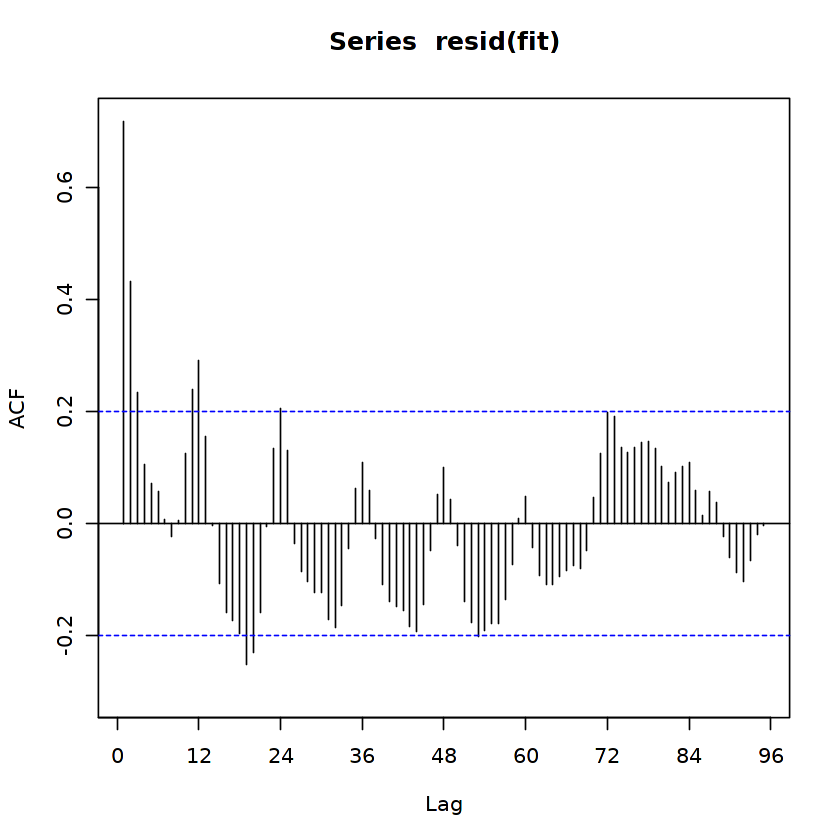

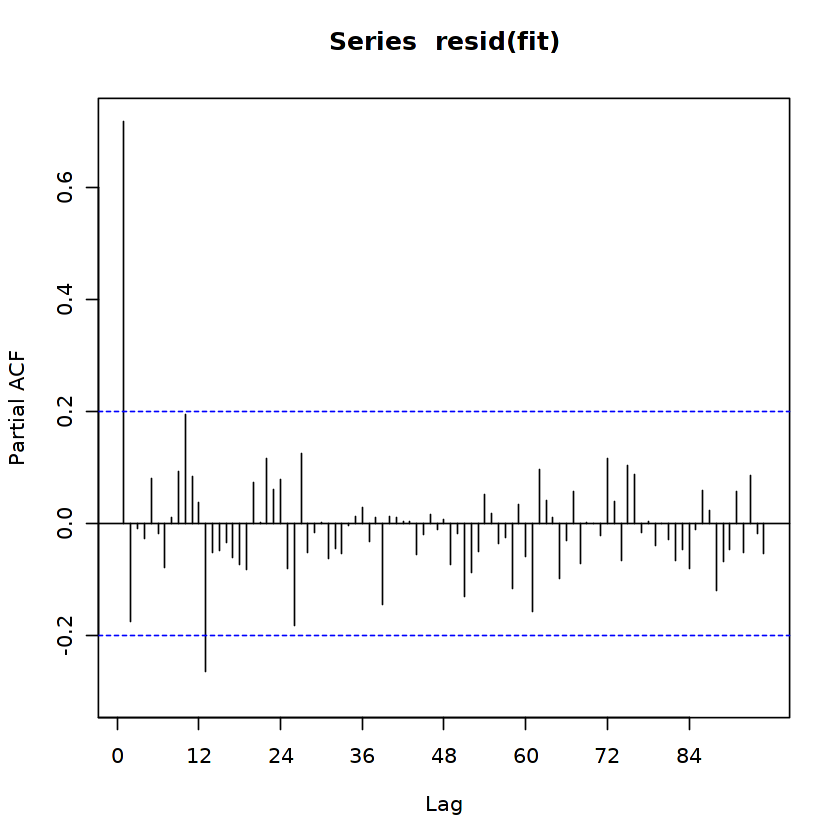

In [78]:
trend = time(CAhousing.train.ts)
summary(fit <- lm(CAhousing.train.ts ~ trend + sp500.train.ts, na.action = NULL))

Acf(resid(fit), lag.max = 100)
Pacf(resid(fit), 100)

In [79]:
sp500.train.lag1 = diff(sp500.train.ts, lag = 1)
CAhousing.train.lag1 = diff(CAhousing.train.ts, lag = 1)
CAhousing.test.lag1 = diff(CAhousing.test.ts, lag = 1)

ME         RMSE      MAE       MPE        MAPE      MASE     
Training set   2506.816  14693.18  11157.16  0.3944308  1.695601 0.2322398
Test set     134923.247 141528.03 134923.25 13.4308039 13.430804 2.8084693
             ACF1       Theil's U
Training set 0.06996971      NA  
Test set     0.50509729 3.87813


	Ljung-Box test

data:  Residuals from Regression with ARIMA(1,0,0)(1,0,1)[12] errors
Q* = 17.352, df = 16, p-value = 0.3632

Model df: 3.   Total lags used: 19



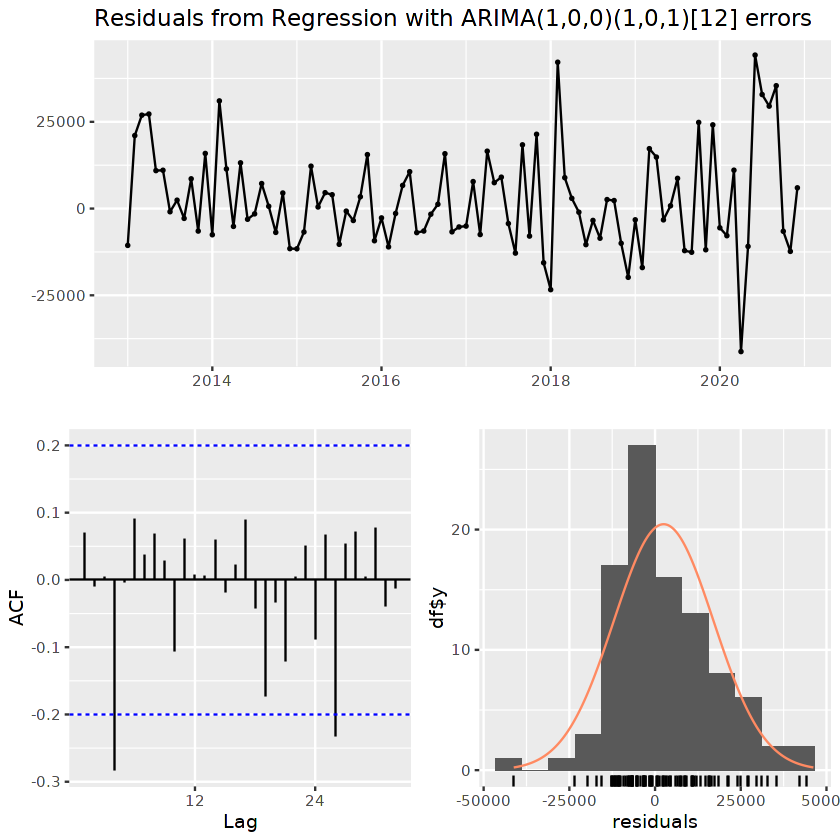

In [80]:
m5 = Arima(CAhousing.train.ts, order = c(1, 0, 0),
           seasonal = list(order = c(1, 0, 1), period = 12),
           xreg = cbind(sp500.train.ts))

arima.pred2 = forecast(m5, h = 12, level = 0,
                       xreg = cbind(sp500.train.ts))

accuracy(arima.pred2, CAhousing.test.ts)

checkresiduals(m5)


Call:
lm(formula = CAhousing.train.ts ~ trend + sp500.train.ts, na.action = NULL)

Residuals:
   Min     1Q Median     3Q    Max 
-95323 -16814   4782  18634  48846 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -4.619e+07  9.772e+06  -4.727 8.09e-06 ***
trend           2.313e+04  4.869e+03   4.750 7.37e-06 ***
sp500.train.ts  8.481e+01  2.139e+01   3.965 0.000144 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28870 on 93 degrees of freedom
Multiple R-squared:  0.9212,	Adjusted R-squared:  0.9195 
F-statistic: 543.5 on 2 and 93 DF,  p-value: < 2.2e-16


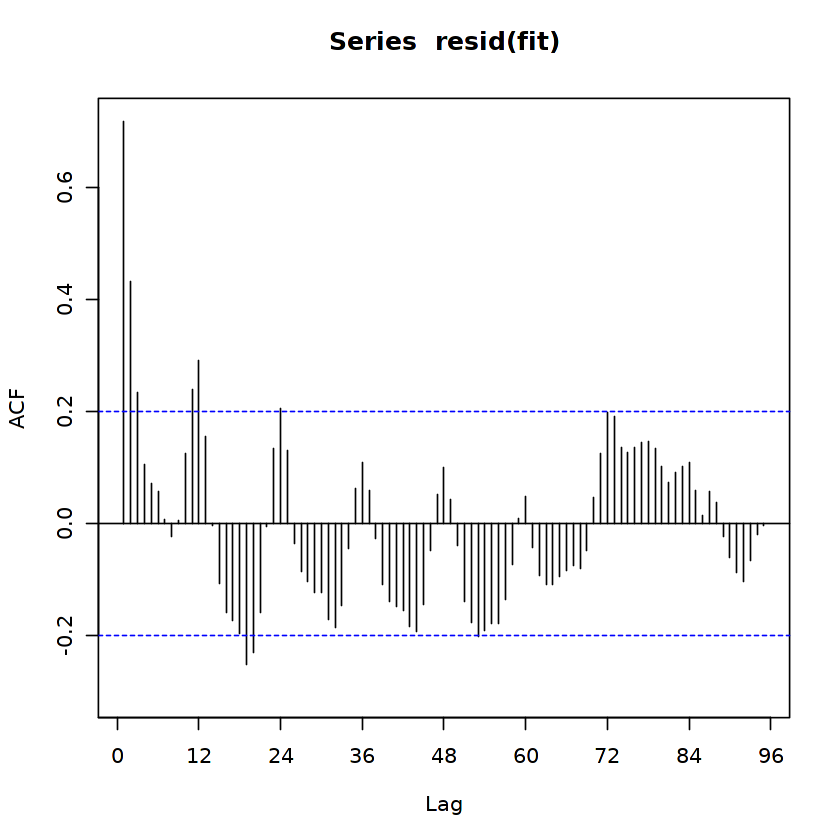

ME         RMSE      MAE       MPE        MAPE      MASE     
Training set   4114.016  16956.09  12934.43  0.6518058  1.990158 0.2692341
Test set     104961.051 120435.51 112093.61 10.2716653 11.119932 2.3332633
             ACF1        Theil's U
Training set -0.05660301       NA 
Test set      0.55612886 3.257352

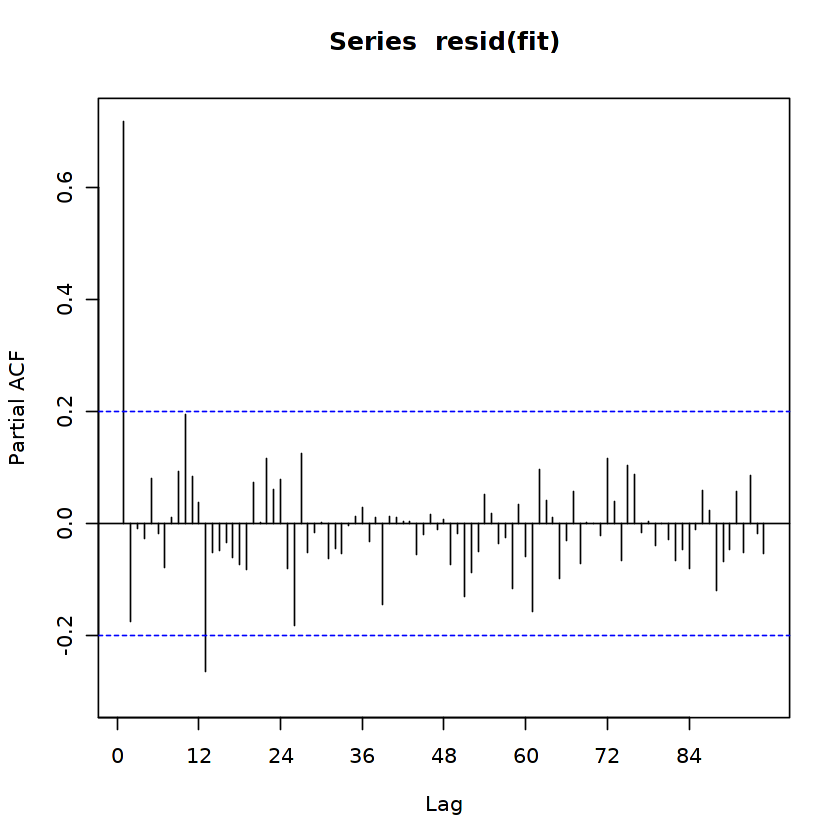

In [81]:
trend = time(CAhousing.train.ts)
summary(fit <- lm(CAhousing.train.ts ~ trend + sp500.train.ts, na.action = NULL))

Acf(resid(fit), lag.max = 100)
Pacf(resid(fit), 100)

m7 = Arima(CAhousing.train.ts, order = c(1, 1, 0),
           seasonal = list(order = c(1, 0, 1), period = 4),
           xreg = cbind(sp500.train.ts))

arima.pred3 = forecast(m7, h = 4, level = 0,
                       xreg = cbind(sp500.train.ts))

accuracy(arima.pred3, CAhousing.test.ts)


	Ljung-Box test

data:  Residuals from Regression with ARIMA(1,1,0)(1,0,1)[4] errors
Q* = 25.887, df = 16, p-value = 0.05563

Model df: 3.   Total lags used: 19



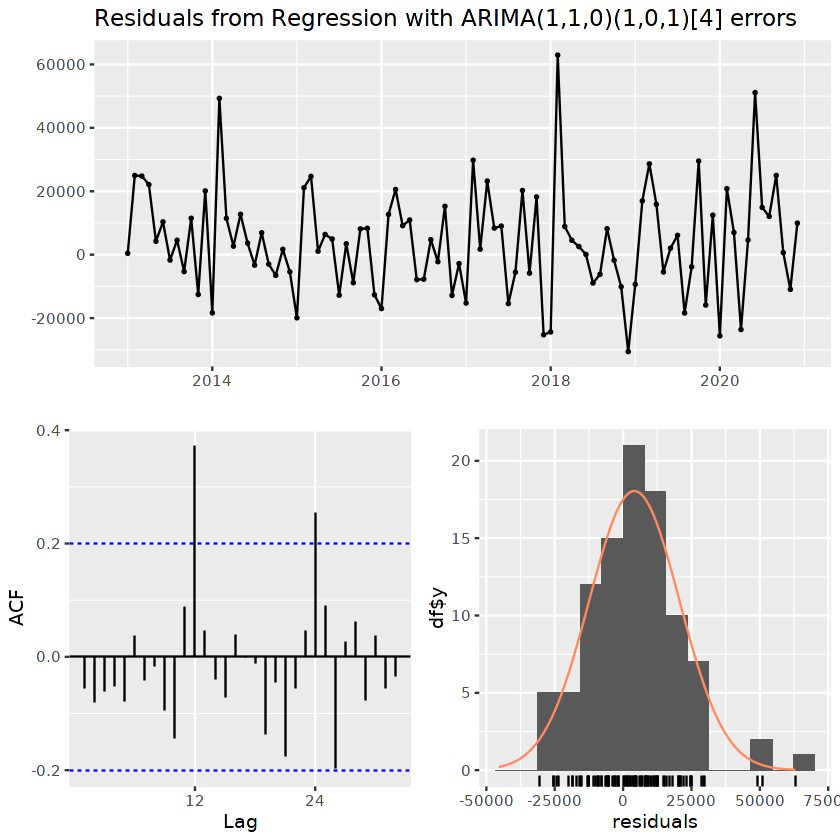

In [82]:
checkresiduals(m7)


Call:
lm(formula = CAhousing.train.ts ~ trend + sp500.train.ts, na.action = NULL)

Residuals:
   Min     1Q Median     3Q    Max 
-95323 -16814   4782  18634  48846 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -4.619e+07  9.772e+06  -4.727 8.09e-06 ***
trend           2.313e+04  4.869e+03   4.750 7.37e-06 ***
sp500.train.ts  8.481e+01  2.139e+01   3.965 0.000144 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28870 on 93 degrees of freedom
Multiple R-squared:  0.9212,	Adjusted R-squared:  0.9195 
F-statistic: 543.5 on 2 and 93 DF,  p-value: < 2.2e-16


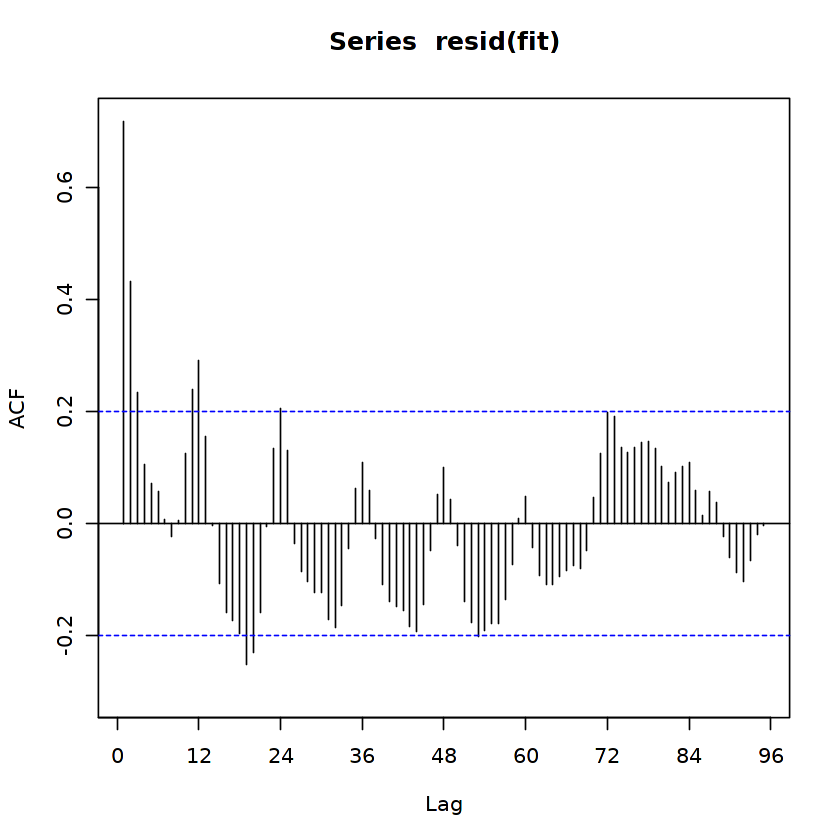

ME        RMSE     MAE      MPE       MAPE     MASE     
Training set  1068.927 13745.52 10433.89 0.1783866 1.576360 0.2171846
Test set     87182.642 95241.54 88198.25 8.6069701 8.727755 1.8358739
             ACF1         Theil's U
Training set 0.0003276928      NA  
Test set     0.5008889939 2.60274

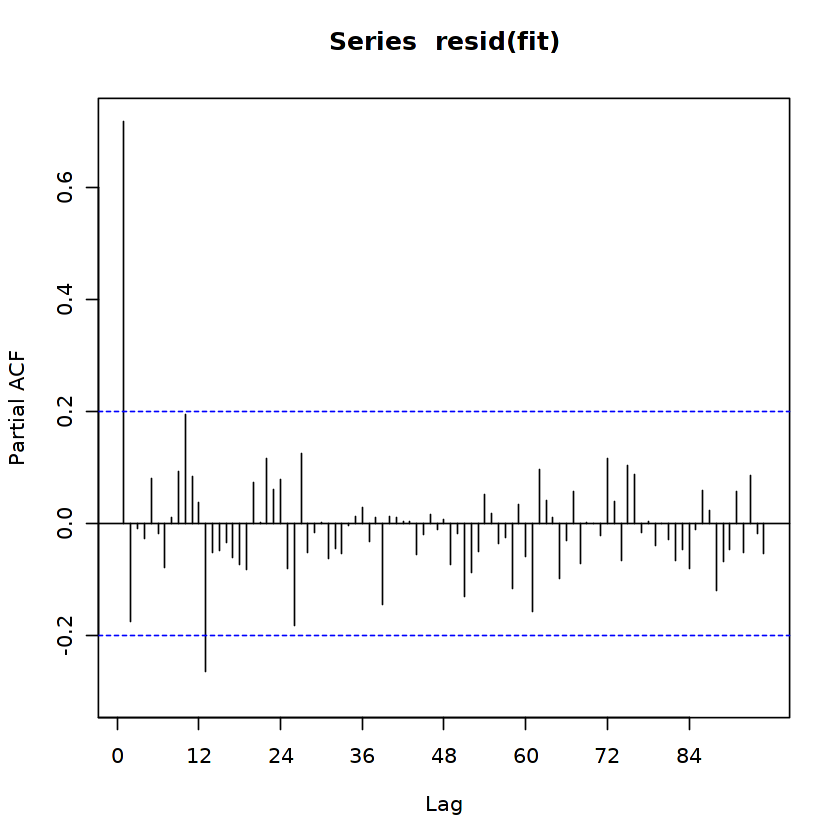

In [83]:
trend = time(CAhousing.train.ts)
summary(fit <- lm(CAhousing.train.ts ~ trend + sp500.train.ts, na.action = NULL))

Acf(resid(fit), lag.max = 100)
Pacf(resid(fit), 100)

m8 = Arima(CAhousing.train.ts, order = c(1, 1, 0),
           seasonal = list(order = c(1, 0, 1), period = 12),
           xreg = cbind(sp500.train.ts))

arima.pred3 = forecast(m8, h = 12, level = 0,
                       xreg = cbind(sp500.train.ts))

accuracy(arima.pred3, CAhousing.test.ts)


	Ljung-Box test

data:  Residuals from Regression with ARIMA(1,1,0)(1,0,1)[12] errors
Q* = 18.836, df = 16, p-value = 0.2772

Model df: 3.   Total lags used: 19



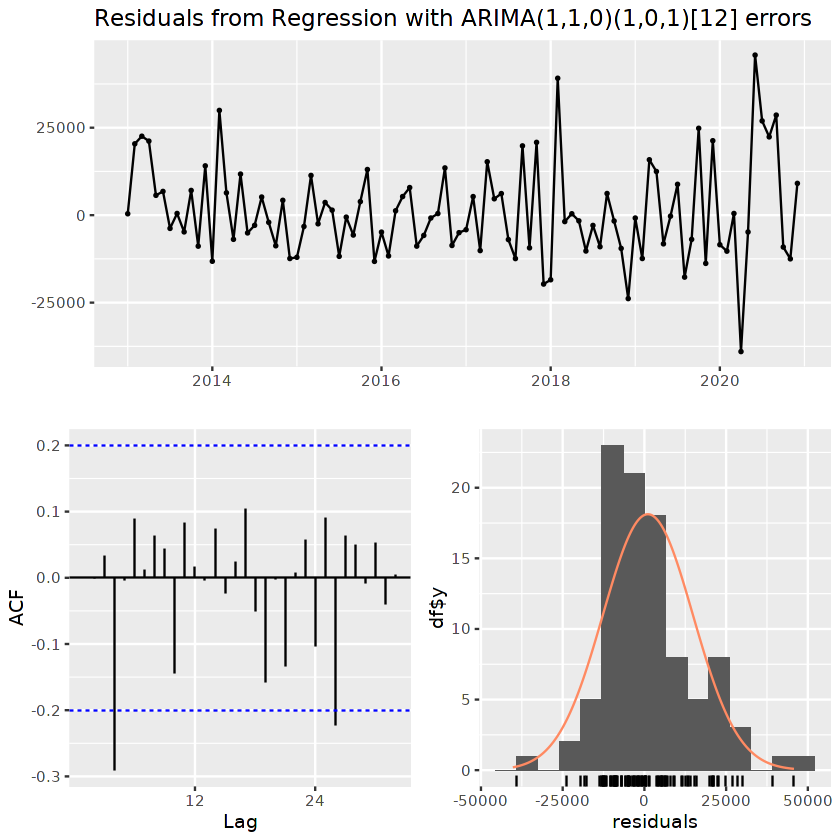

In [84]:
checkresiduals(m8)

## Best Model: ARIMA (1,1,0) x (1,0,1) 12

In [85]:
CA.final.model = Arima(CAhousing.ts,
           order = c(1, 1, 0),
           seasonal = list(order = c(1,0,1), period = 12))

CA.arima.pred.final = forecast(CA.final.model, h = 12, level = 0)

In [86]:
CA.arima.pred.final

         Point Forecast    Lo 0    Hi 0
Jan 2022        1014438 1014438 1014438
Feb 2022        1039240 1039240 1039240
Mar 2022        1061363 1061363 1061363
Apr 2022        1080498 1080498 1080498
May 2022        1091228 1091228 1091228
Jun 2022        1099143 1099143 1099143
Jul 2022        1092732 1092732 1092732
Aug 2022        1089867 1089867 1089867
Sep 2022        1091090 1091090 1091090
Oct 2022        1097229 1097229 1097229
Nov 2022        1095792 1095792 1095792
Dec 2022        1093220 1093220 1093220

In [87]:
CAhousing2022 = read.csv("CAhousing2022.csv")
CAhousing2022.ts = ts(CAhousing2022$Price, start = c(2022, 1), frequency = 12)

In [88]:
accuracy(CA.arima.pred.final, CAhousing2022.ts)

ME         RMSE     MAE      MPE        MAPE     MASE     
Training set   1724.831 15016.62 10940.84  0.2320599 1.557963 0.1699224
Test set     -12228.984 51045.56 40957.54 -1.3350476 3.881357 0.6361124
             ACF1        Theil's U
Training set -0.03098831       NA 
Test set      0.56471168 1.176608

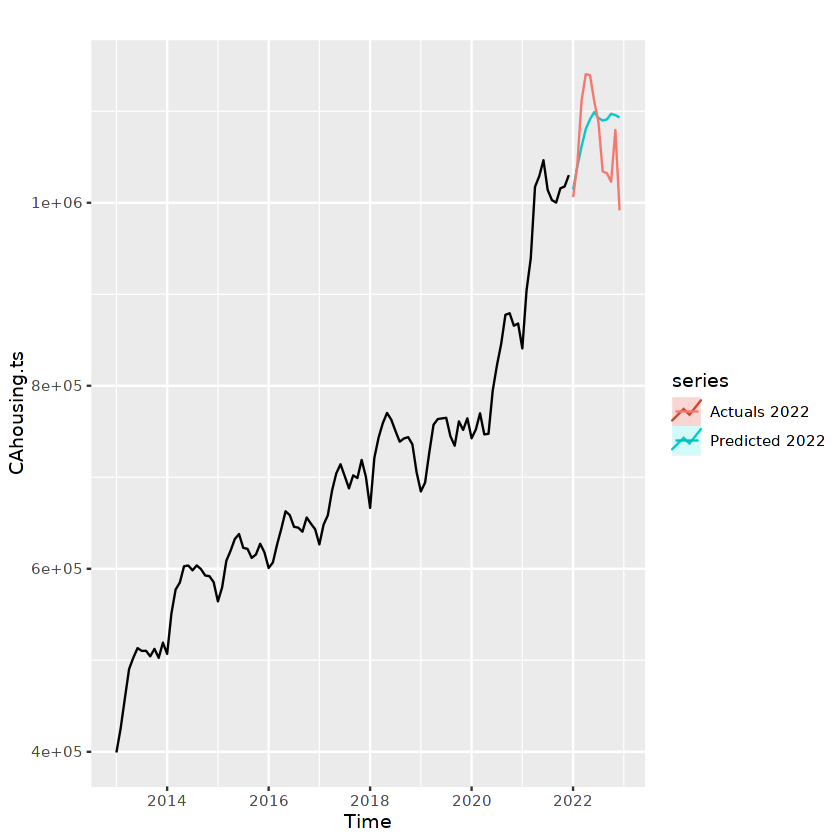

In [89]:
autoplot(CAhousing.ts) + 
autolayer(CA.arima.pred.final, series = "Predicted 2022") + 
autolayer(CAhousing2022.ts, series = "Actuals 2022")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c624a3cc-2029-4cb1-bb30-fe7f6b84decf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>